# Project 2: Ames Housing EDA Analysis

## Problem Statement

As part of the Ames real estate consulting agency, my team is tasked with creating a **regression based model to predict the housing price using the Ames Housing Dataset** to assist real estate agents with their day to day tasks. Currently, the real estate agents make use of their domain knowledge, search through the web to help them or rely on outdated spreadsheets containing the sale prices to provide estimated prices for their clients. This is time-consuming and cumbersome. With a model, the agents can make quick and effective decisions in creating sale prices for the houses in Ames. Also, this model can be also sold to home owners who wish to sell their homes.

## Executive Summary

* What is this project about?
* Who is your target audience?
* What did you learn from the dataset?
* What type of models were created?
* What was the best model?
* 

This project aims to create a linear regression based model to create prediction prices for the houses in Ames, Iowa state. This model will be used by real estate agents to help them with obtaining the price for their clients. 

 Housing sale price is right-skewed with most houses being sold between $14,000 - $15,000.
 This shows that houses contains a lot of outliers that were later removed in the data cleaning section 
 to help remove any noises.

 Most houses have excellent quality gas forced warm air furnace. Houses with Gas A 
 and have excellent heat quality tend to sell at a higher price compared to the other categories and and qualities.

 Most houses have a near flat or level type of contour and thos with kitchen quality of 'good' and 'excellent'
 tend to sell at a higher price compared to other types of ranks.

 Some of the top highest priced housing is North Ames, College Creek and Northridge Heights.


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Rename the columns](#Rename-Columns)
- [Checking for correlation of features between SalePrice](#Checking-for-correlation-of-features-between-SalePrice)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Remove Outliers](#Removing-the-outliers)
- [Merge DataFrames](#Merge-Dataframes)
- [Feature Engineering and Preprocessing](#Feature-Engineering-and-preprocessing)
- [Model Benchmarks](#Model-Benchmarks)
- [Importing and transforming the test dataframe](#Importing-and-transforming-the-test-dataframe)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [889]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [890]:
# Import graph style
plt.style.use('fivethirtyeight')

In [891]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [892]:
# Open the training set CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [893]:
# View first 10 rows
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [894]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Data Description

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

# Cleaning the dataset

In [895]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [896]:
dict_missing = pct_missing_value(train_df, ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
                                            'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
                                            'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
                                            'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
                                            'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

<AxesSubplot:title={'center':'Mising values for each feature'}, xlabel='Features', ylabel='%'>

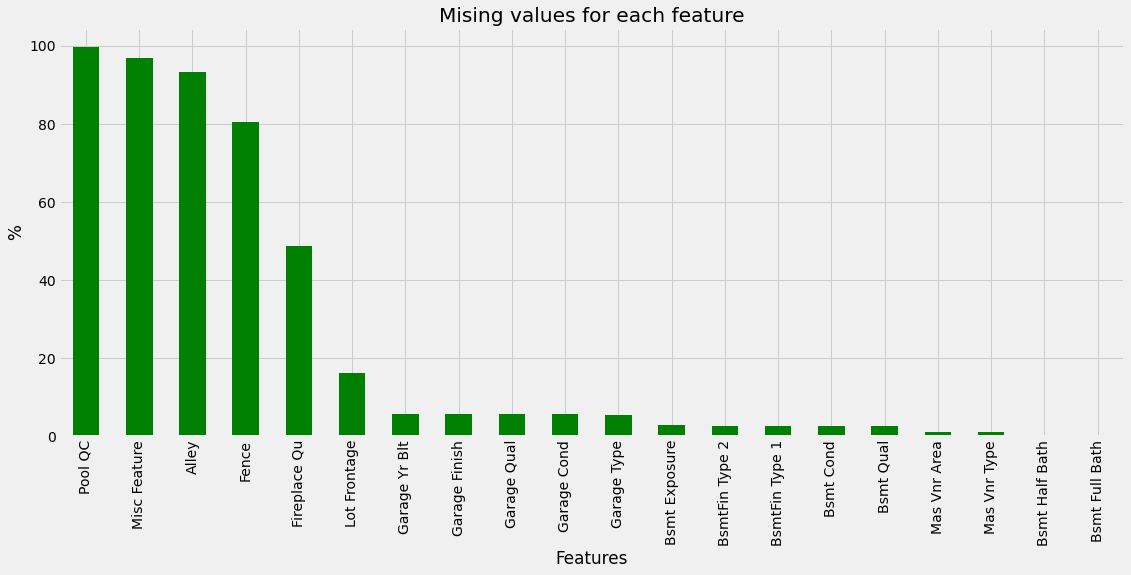

In [897]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17, 7), color='green',
                      title='Mising values for each feature', xlabel='Features', ylabel='%')

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features will be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'*. 

In [898]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [899]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [900]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames

train_df = train_df.drop(['Id', 'PID'], axis=1)
train_df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4           

### Selecting the numeric variables

In [901]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(
    ['Kitchen AbvGr', 'Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         289.0         533.0           0.0        192.0          725.0   
1         132.0         637.0           0.0        276.0          913.0   
2           0.0         731.0           0.0        326.0         1057.0   
3           0.0           0.0           0.0        384.0          384.0   
4           0.0           0.0           0.0        676.0          676.0   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  \
0             0.0          2          1              3              6   
1             0.0          2          1              4              8   
2             0.0          1          0              3              5   
3             0.0          2          1              3              7   
4             0.0          2          0              3              6   

   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
0           0         1976.0          2.0        475.0             0   
1           1         1997.0          2.0        559.0             0   
2           0         1953.0          1.0        246.0             0   
3           0         2007.0          2.0        400.0           100   
4           0         1957.0          2.0        484.0             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   Misc Val  Mo Sold  Yr Sold  SalePrice  
0         0        3     2010     130500  
1         0        4     2009     220000  
2         0        1     2010     109000  
3         0        4     2010     174000  
4         0        3     2010     138500

### Selecting the categorical variables

In [902]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   
2   CompShg      VinylSd      VinylSd         None         TA         Gd   
3   CompShg      VinylSd      VinylSd         None         TA         TA   
4   CompShg      Wd Sdng      Plywood         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   
2     CBlock        TA        TA            No            GLQ            Unf   
3      PConc        Gd        TA            No            Unf            Unf   
4      PConc        Fa        Gd            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Gd           Y      SBrkr           TA        Typ   
4    GasA         TA           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0          NaN      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2          NaN      Detchd           Unf          TA          TA           Y   
3          NaN     BuiltIn           Fin          TA          TA           Y   
4          NaN      Detchd           Unf          TA          TA           N   

  Sale Type  
0       WD   
1       WD   
2       WD   
3       WD   
4       WD

### Cleaning the train_df_cat

In [903]:
train_df_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   
2   CompShg      VinylSd      VinylSd         None         TA         Gd   
3   CompShg      VinylSd      VinylSd         None         TA         TA   
4   CompShg      Wd Sdng      Plywood         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   
2     CBlock        TA        TA            No            GLQ            Unf   
3      PConc        Gd        TA            No            Unf            Unf   
4      PConc        Fa        Gd            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Gd           Y      SBrkr           TA        Typ   
4    GasA         TA           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0          NaN      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2          NaN      Detchd           Unf          TA          TA           Y   
3          NaN     BuiltIn           Fin          TA          TA           Y   
4          NaN      Detchd           Unf          TA          TA           N   

  Sale Type  
0       WD   
1       WD   
2       WD   
3       WD   
4       WD

In [904]:
train_df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

For train_df_cat,

**Nominal variables:**
* MS SubClass (Type of subclass)
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Kitchen AbvGr
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [905]:
# Adding back MS SubClass, Kitchen AbvGr to train_df_Cat
train_df_cat.insert(0, 'MS SubClass', train_df['MS SubClass'])
train_df_cat.insert(30, 'Kitchen AbvGr', train_df['Kitchen AbvGr'])

In [906]:
train_df_cat

MS SubClass MS Zoning Street Lot Shape Land Contour Utilities  \
0              60        RL   Pave       IR1          Lvl    AllPub   
1              60        RL   Pave       IR1          Lvl    AllPub   
2              20        RL   Pave       Reg          Lvl    AllPub   
3              60        RL   Pave       Reg          Lvl    AllPub   
4              50        RL   Pave       IR1          Lvl    AllPub   
...           ...       ...    ...       ...          ...       ...   
2046           20        RL   Pave       IR1          HLS    AllPub   
2047           30        RL   Pave       IR1          Lvl    AllPub   
2048           50        RL   Pave       Reg          Bnk    AllPub   
2049           20        RL   Pave       Reg          Lvl    AllPub   
2050           60        RL   Pave       Reg          Lvl    AllPub   

     Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
0       CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam   
1       CulDSac        Gtl      SawyerW        Norm        Norm      1Fam   
2        Inside        Gtl        NAmes        Norm        Norm      1Fam   
3        Inside        Gtl       Timber        Norm        Norm      1Fam   
4        Inside        Gtl      SawyerW        Norm        Norm      1Fam   
...         ...        ...          ...         ...         ...       ...   
2046     Inside        Gtl       Timber        Norm        Norm      1Fam   
2047     Inside        Gtl      Edwards        Norm        Norm      1Fam   
2048     Inside        Gtl      Crawfor        Norm        Norm      1Fam   
2049     Corner        Gtl        NAmes        Norm        Norm      1Fam   
2050     Inside        Gtl      Gilbert        Norm        Norm      1Fam   

     House Style Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0         2Story      Gable   CompShg      HdBoard      Plywood      BrkFace   
1         2Story      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2         1Story      Gable   CompShg      VinylSd      VinylSd         None   
3         2Story      Gable   CompShg      VinylSd      VinylSd         None   
4         1.5Fin      Gable   CompShg      Wd Sdng      Plywood         None   
...          ...        ...       ...          ...          ...          ...   
2046      1Story      Gable   CompShg      VinylSd      VinylSd         None   
2047      1Story      Gable   CompShg      VinylSd      VinylSd         None   
2048      1.5Fin      Gable   CompShg      BrkFace        Stone         None   
2049      1Story      Gable   CompShg      Plywood      Plywood         None   
2050      2Story      Gable   CompShg      VinylSd      VinylSd         None   

     Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure  \
0            Gd         TA     CBlock        TA        TA            No   
1            Gd         TA      PConc        Gd        TA            No   
2            TA         Gd     CBlock        TA        TA            No   
3            TA         TA      PConc        Gd        TA            No   
4            TA         TA      PConc        Fa        Gd            No   
...         ...        ...        ...       ...       ...           ...   
2046         Gd         TA      PConc        Gd        TA            Av   
2047         TA         TA     CBlock        TA        TA            No   
2048         TA         TA     BrkTil        TA        TA            No   
2049         TA         TA     CBlock        TA        TA            No   
2050         TA         TA      PConc        TA        TA            No   

     BsmtFin Type 1 BsmtFin Type 2 Heating Heating QC Central Air Electrical  \
0               GLQ            Unf    GasA         Ex           Y      SBrkr   
1               GLQ            Unf    GasA         Ex           Y      SBrkr   
2               GLQ            Unf    GasA         TA           Y      SBrkr   
3               Unf            Unf    GasA    

In [907]:
# FROM here, only change the values for train_df
# Need to map the values MS SubClass to their categories
train_df['MS SubClass'] = train_df['MS SubClass'].map({
    20:'1-STORY 1946 & NEWER ALL STYLES',
    30:'1-STORY 1945 & OLDER',
    40:'1-STORY W/FINISHED ATTIC ALL AGES',
    45:'-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

In [908]:
train_df['MS SubClass']

0                  2-STORY 1946 & NEWER
1                  2-STORY 1946 & NEWER
2       1-STORY 1946 & NEWER ALL STYLES
3                  2-STORY 1946 & NEWER
4         1-1/2 STORY FINISHED ALL AGES
                     ...               
2046    1-STORY 1946 & NEWER ALL STYLES
2047               1-STORY 1945 & OLDER
2048      1-1/2 STORY FINISHED ALL AGES
2049    1-STORY 1946 & NEWER ALL STYLES
2050               2-STORY 1946 & NEWER
Name: MS SubClass, Length: 2051, dtype: object

In [909]:
# Converting the values to lower case and added underscores to replace the space later for one hot encoding
train_df['MS SubClass'] = train_df['MS SubClass'].map(lambda x:x.lower().replace(' ', '_').replace('-',''))

In [910]:
train_df_cat['MS SubClass']

0       60
1       60
2       20
3       60
4       50
        ..
2046    20
2047    30
2048    50
2049    20
2050    60
Name: MS SubClass, Length: 2051, dtype: int64

In [911]:
train_df_null_pct = ((train_df.isnull().sum() / len(train_df)).sort_values(ascending=False) * 100).head(11)
train_df_null_pct

Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Finish      5.558264
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Qual          2.681619
Bsmt Cond          2.681619
dtype: float64

In [912]:
cat_null = train_df_null_pct.index.tolist()
cat_null

['Fireplace Qu',
 'Lot Frontage',
 'Garage Finish',
 'Garage Yr Blt',
 'Garage Cond',
 'Garage Qual',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Bsmt Qual',
 'Bsmt Cond']

<AxesSubplot:title={'center':'Null values for each variable as a percentage'}, xlabel='Variables', ylabel='% format'>

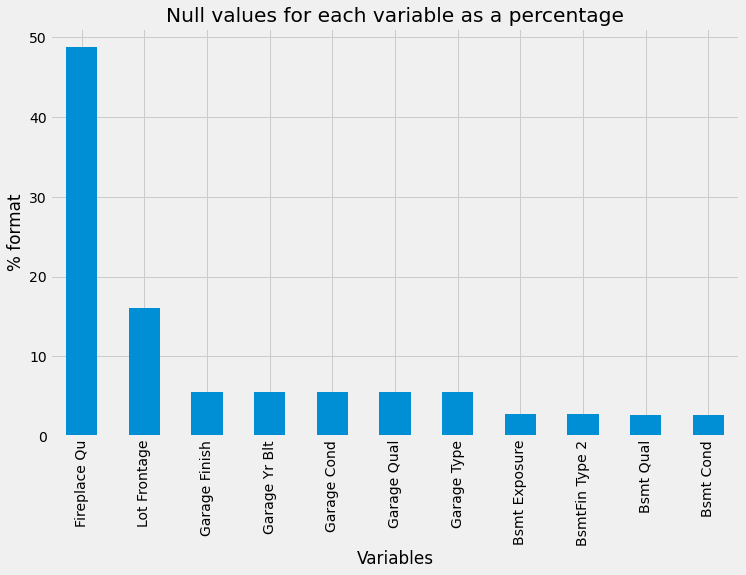

In [913]:
train_df_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [914]:
# Mode of the columns with null values
# mode_values = train_df_cat[cat_null].mode()
# mode_values

# Don't fill the NA values for categorical values as they're part of the category

In [915]:
# Fill the null values with the mode of each column
# train_df_cat = train_df_cat.fillna(agg_dict(train_df_cat,mode_values))
# train_df_cat.isnull().sum().sort_values(ascending=False)

# Don't fill the NA values for categorical values as they're part of the category

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [916]:
# Nominal variables
train_df_nom= train_df[[
    'MS SubClass',
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]].copy()

train_df_nom.head()

MS SubClass MS Zoning Street Land Contour Lot Config  \
0             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3             2story_1946_&_newer        RL   Pave          Lvl     Inside   
4    11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating  \
0   CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1   CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3   CompShg      VinylSd      VinylSd         None      PConc    GasA   
4   CompShg      Wd Sdng      Plywood         None      PConc    GasA   

  Central Air Garage Type Sale Type  
0           Y      Attchd       WD   
1           Y      Attchd       WD   
2           Y      Detchd       WD   
3           Y     BuiltIn       WD   
4           Y      Detchd       WD

In [917]:
# Oridinal variables 
train_df_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_nom.columns]].copy()
train_df_ord.head()

Lot Shape Utilities Land Slope Exter Qual Exter Cond Bsmt Qual Bsmt Cond  \
0       IR1    AllPub        Gtl         Gd         TA        TA        TA   
1       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2       Reg    AllPub        Gtl         TA         Gd        TA        TA   
3       Reg    AllPub        Gtl         TA         TA        Gd        TA   
4       IR1    AllPub        Gtl         TA         TA        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating QC Electrical  \
0            No            GLQ            Unf         Ex      SBrkr   
1            No            GLQ            Unf         Ex      SBrkr   
2            No            GLQ            Unf         TA      SBrkr   
3            No            Unf            Unf         Gd      SBrkr   
4            No            Unf            Unf         TA      SBrkr   

   Kitchen AbvGr Kitchen Qual Functional Fireplace Qu Garage Finish  \
0              1           Gd        Typ          NaN           RFn   
1              1           Gd        Typ           TA           RFn   
2              1           Gd        Typ          NaN           Unf   
3              1           TA        Typ          NaN           Fin   
4              1           TA        Typ          NaN           Unf   

  Garage Qual Garage Cond Paved Drive  
0          TA          TA           Y  
1          TA          TA           Y  
2          TA          TA           Y  
3          TA          TA           Y  
4          TA          TA           N

### Cleaning the train_df_num

<AxesSubplot:title={'center':"Numeric Dataframe Columns with 0's in them"}>

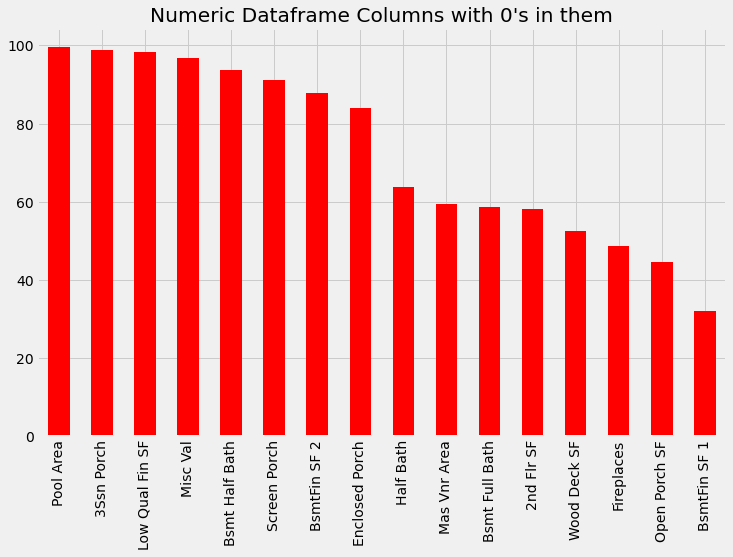

In [918]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df.isin([0]).sum() / len(train_df)) * 100).sort_values(ascending=False)).iloc[:16]

train_df_with_0.sort_values(ascending=False).plot(kind='bar',
                                                  figsize=(11, 7), title='Numeric Dataframe Columns with 0\'s in them', color='red')

In [919]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
dtype: float64

In [920]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

Pool Area  3Ssn Porch  Low Qual Fin SF  Misc Val  Bsmt Half Bath  \
0          0           0                0         0             0.0   
1          0           0                0         0             0.0   
2          0           0                0         0             0.0   
3          0           0                0         0             0.0   
4          0           0                0         0             0.0   

   Screen Porch  BsmtFin SF 2  Enclosed Porch  Half Bath  Mas Vnr Area  \
0             0           0.0               0          1         289.0   
1             0           0.0               0          1         132.0   
2             0           0.0               0          0           0.0   
3             0           0.0               0          1           0.0   
4             0           0.0               0          0           0.0   

   Bsmt Full Bath  2nd Flr SF  Wood Deck SF  Fireplaces  Open Porch SF  \
0             0.0         754             0           0             44   
1             1.0        1209             0           1             74   
2             1.0           0             0           0             52   
3             0.0         700           100           0              0   
4             0.0         614             0           0             59   

   BsmtFin SF 1  SalePrice  
0         533.0     130500  
1         637.0     220000  
2         731.0     109000  
3           0.0     174000  
4           0.0     138500

In [921]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

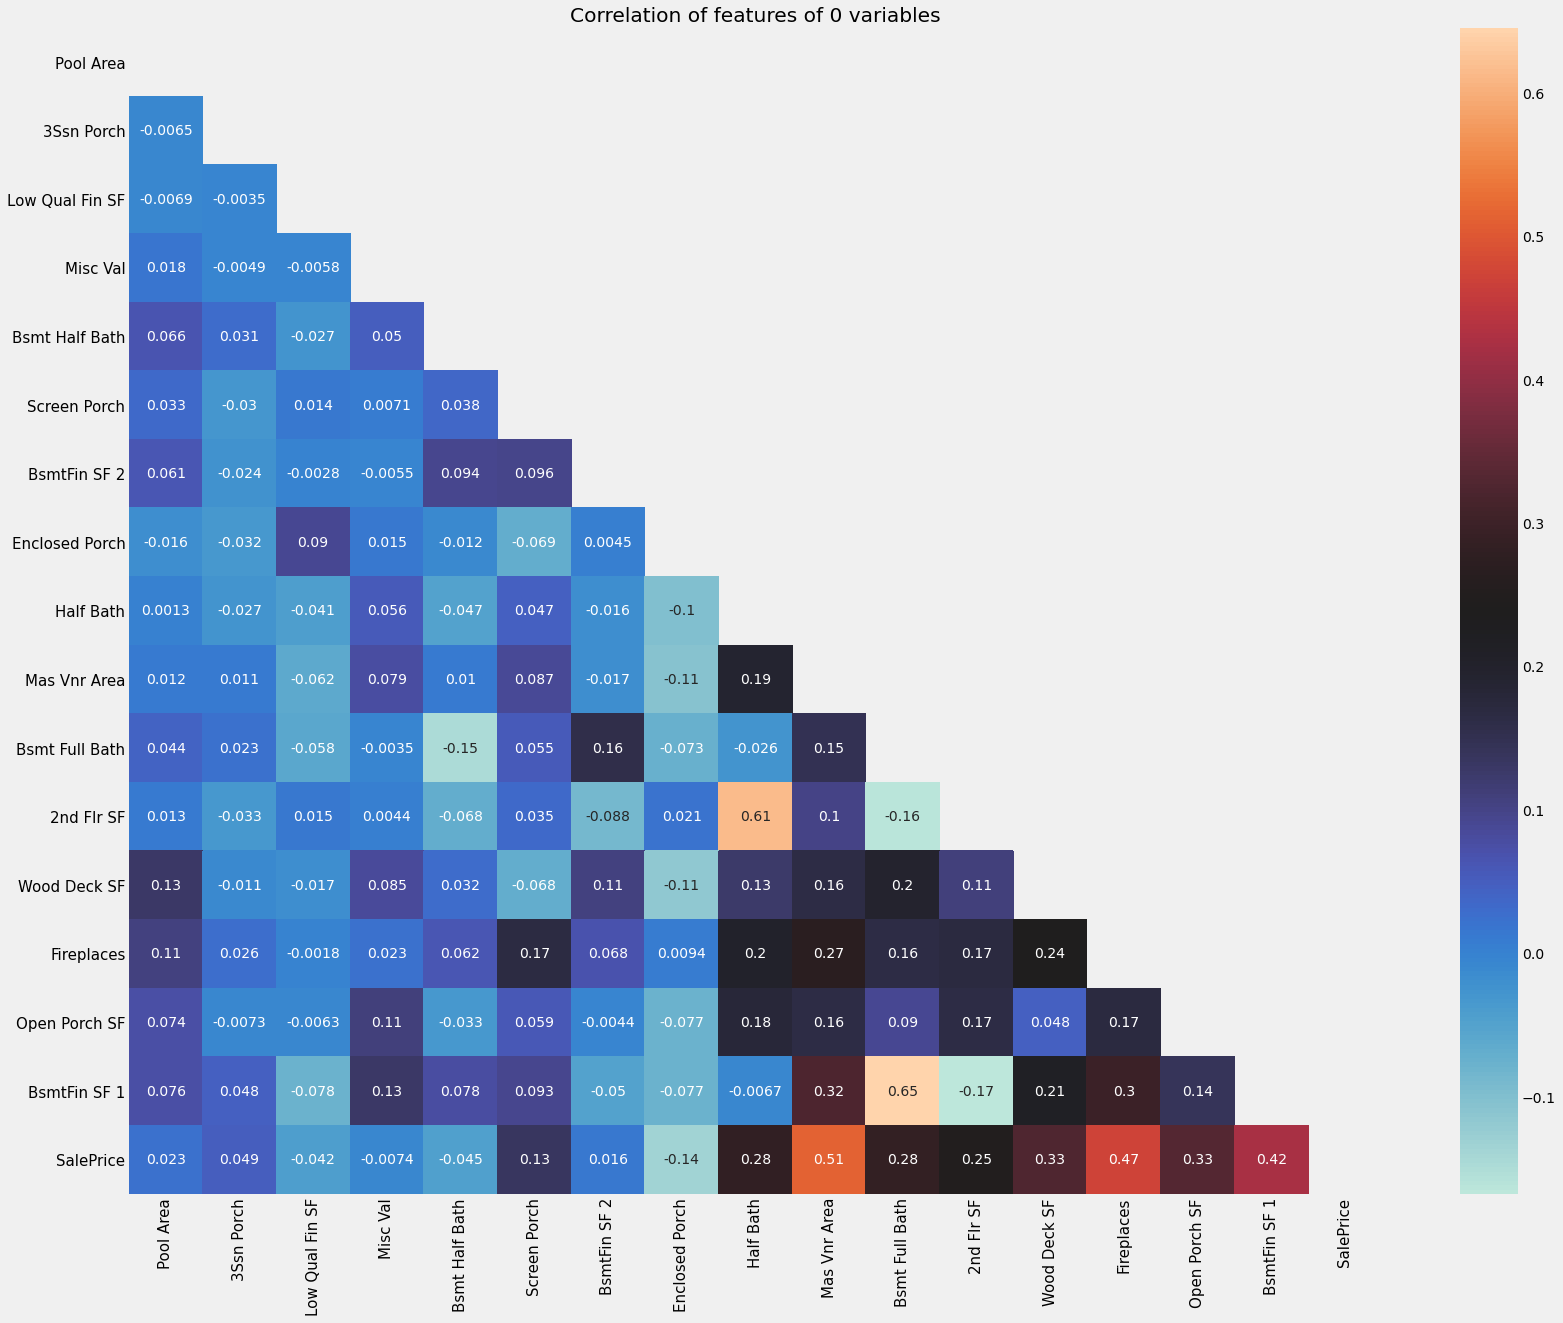

In [922]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [923]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

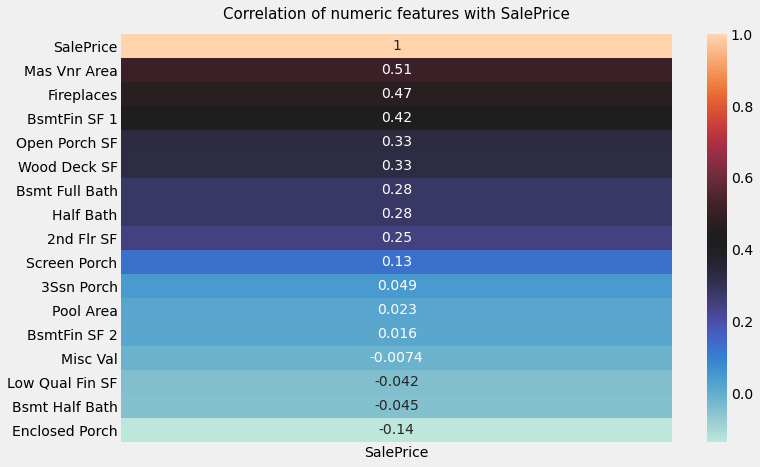

In [924]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [925]:
train_df_with_0.columns

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'SalePrice'],
      dtype='object')

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023) (Almost all houses do not have pools, will **drop pool related features**)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074) (Almost all houses do not have Miscellaneous features)
* Bsmt Half Bath (93.7%, -0.045) 
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [926]:
# Drop the numeric columns with the most 0's and with the least correlation against price
train_df = train_df.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0             2story_1946_&_newer        RL           NaN     13517   Pave   
1             2story_1946_&_newer        RL          43.0     11492   Pave   
2  1story_1946_&_newer_all_styles        RL          68.0      7922   Pave   
3             2story_1946_&_newer        RL          73.0      9802   Pave   
4    11/2_story_finished_all_ages        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
0          725.0    GasA         Ex           Y      SBrkr         725   
1          913.0    GasA         Ex           Y      SBrkr         913   
2         1057.0    GasA         TA           Y      SBrkr        1057   
3          384.0    GasA         Gd           Y      SBrkr         744   
4          676.0    GasA         TA           Y      SBrkr         831   

   2nd Flr SF  Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  \
0         754         1479             0.0          2          1   
1        1209         2122             1.0          2          1   
2           0         1057             1.0          1          0   
3         700         1444             0.0          2          1   
4         614         1445             0.0          2          0   

   Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   
2              3              1           Gd              5        Typ   
3              3              1           TA              7        Typ   
4              3              1           TA

In [927]:
train_df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0             2story_1946_&_newer        RL           NaN     13517   Pave   
1             2story_1946_&_newer        RL          43.0     11492   Pave   
2  1story_1946_&_newer_all_styles        RL          68.0      7922   Pave   
3             2story_1946_&_newer        RL          73.0      9802   Pave   
4    11/2_story_finished_all_ages        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
0          725.0    GasA         Ex           Y      SBrkr         725   
1          913.0    GasA         Ex           Y      SBrkr         913   
2         1057.0    GasA         TA           Y      SBrkr        1057   
3          384.0    GasA         Gd           Y      SBrkr         744   
4          676.0    GasA         TA           Y      SBrkr         831   

   2nd Flr SF  Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  \
0         754         1479             0.0          2          1   
1        1209         2122             1.0          2          1   
2           0         1057             1.0          1          0   
3         700         1444             0.0          2          1   
4         614         1445             0.0          2          0   

   Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   
2              3              1           Gd              5        Typ   
3              3              1           TA              7        Typ   
4              3              1           TA

In [928]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

Lot Frontage       9.705882
Garage Yr Blt      3.352941
Mas Vnr Area       0.647059
Bsmt Half Bath     0.058824
Bsmt Full Bath     0.058824
Total Bsmt SF      0.029412
Garage Cars        0.029412
Garage Area        0.029412
Bsmt Unf SF        0.029412
BsmtFin SF 2       0.029412
BsmtFin SF 1       0.029412
Year Remod/Add     0.000000
Year Built         0.000000
Lot Area           0.000000
1st Flr SF         0.000000
2nd Flr SF         0.000000
Low Qual Fin SF    0.000000
Gr Liv Area        0.000000
SalePrice          0.000000
Full Bath          0.000000
Yr Sold            0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
TotRms AbvGrd      0.000000
Fireplaces         0.000000
Wood Deck SF       0.000000
Open Porch SF      0.000000
Enclosed Porch     0.000000
3Ssn Porch         0.000000
Screen Porch       0.000000
Pool Area          0.000000
Misc Val           0.000000
Mo Sold            0.000000
MS SubClass        0.000000
dtype: float64

In [929]:
# Drop null values for Garage Area, BsmtFin SF1, Total Bsmt SF as the percentages are less than 5%
train_df.dropna(subset=['Garage Area', 'BsmtFin SF 1','Total Bsmt SF', 'Bsmt Full Bath'], inplace=True)

In [930]:
# Mean of train_df_num for the missing continuous values in the columns
mean_values = dict(round(train_df_num[['Lot Frontage','Mas Vnr Area']].mean(),2)) 
mean_values

{'Lot Frontage': 69.06, 'Mas Vnr Area': 99.7}

In [931]:
def agg_dict(dataframe,mode_value):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_value.keys()):
        new_dict[key] = mode_value.values.tolist().pop()[index]
    return new_dict

# agg_dict(mode_values)

In [932]:
train_df = train_df.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df.isnull().sum().sort_values(ascending=False)

Fireplace Qu      998
Garage Finish     113
Garage Qual       113
Garage Type       113
Garage Yr Blt     113
Garage Cond       113
Bsmt Exposure      56
BsmtFin Type 2     54
Bsmt Qual          53
BsmtFin Type 1     53
Bsmt Cond          53
Mas Vnr Type       22
Mas Vnr Area        0
Overall Qual        0
Exter Qual          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Overall Cond        0
SalePrice           0
House Style         0
Bldg Type           0
Exter Cond          0
Condition 1         0
Neighborhood        0
Land Slope          0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Street              0
Lot Area            0
Lot Frontage        0
MS Zoning           0
Condition 2         0
BsmtFin SF 1        0
Foundation          0
Kitchen AbvGr       0
Yr Sold             0
Mo Sold             0
Open Porch SF       0
Wood Deck SF        0
Paved Driv

In [933]:
# Houses without garage
num_garages = train_df[train_df.columns[train_df.columns.str.contains('Garage')]]
# num_garages
len(num_garages[num_garages['Garage Cars'] == 0]) / len(num_garages)

0.05517578125

Strange that houses without garages have a garage year built in them. Will drop them as they're less than 5%

In [934]:
# Drop rows with no Garage cars.
train_df = train_df.loc[train_df['Garage Cars'] > 0].copy()

In [935]:
# garage with a year 2207. Drop.
train_df[train_df['Garage Yr Blt'] == 2207]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1699  1story_1946_&_newer_all_styles        RL          68.0      8298   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1699       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1699        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1699             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1699      VinylSd      VinylSd          NaN          99.7         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  Total Bsmt SF Heating Heating QC  \
1699         583.0            Unf         1546.0    GasA         Ex   

     Central Air Electrical  1st Flr SF  2nd Flr SF  Gr Liv Area  \
1699           Y      SBrkr        1564           0         1564   

      Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
1699             0.0          2          0              2              1   

     Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu  \
1699           Ex              6        Typ           1           Gd   

     Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1699      Attchd         2207.0           RFn          2.0        502.0   

     Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
1699          TA          TA           Y           132              0   

      Mo Sold  Yr Sold Sale Type  SalePrice  
1699        9     2007       New     267300

In [936]:
# Drop garage with a year 2207.
train_df.drop(index=[1699], inplace=True)

In [937]:
# Converting 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF' to float64 as they're continous values
train_df[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']] = train_df[[
    'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']].astype('float64')
# train_df_num.head()

In [938]:
# Converting Bsmt Full Bath, Garage Cars, Garage Yr Blt, Garage Cars to int64 as they're discrete values
train_df[['Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] = train_df[[
    'Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] .astype('int64')
# train_df.head()

In [939]:
train_df

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
2046  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
2047             1story_1945_&_older        RL         69.06   12342.0   Pave   
2048    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
2049  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
2050             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
2046       IR1          HLS    AllPub     Inside        Gtl       Timber   
2047       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
2048       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
2049       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2050       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
2046        Norm        Norm      1Fam      1Story             8   
2047        Norm        Norm      1Fam      1Story             4   
2048        Norm        Norm      1Fam      1.5Fin             6   
2049        Norm        Norm      1Fam      1Story             4   
2050        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

In [940]:
# Nominal Variables
train_df_nom.head()

MS SubClass MS Zoning Street Land Contour Lot Config  \
0             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3             2story_1946_&_newer        RL   Pave          Lvl     Inside   
4    11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating  \
0   CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1   CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3   CompShg      VinylSd      VinylSd         None      PConc    GasA   
4   CompShg      Wd Sdng      Plywood         None      PConc    GasA   

  Central Air Garage Type Sale Type  
0           Y      Attchd       WD   
1           Y      Attchd       WD   
2           Y      Detchd       WD   
3           Y     BuiltIn       WD   
4           Y      Detchd       WD

In [941]:
# Numeric variables, consists of discrete and continuous variables 
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         289.0         533.0           0.0        192.0          725.0   
1         132.0         637.0           0.0        276.0          913.0   
2           0.0         731.0           0.0        326.0         1057.0   
3           0.0           0.0           0.0        384.0          384.0   
4           0.0           0.0           0.0        676.0          676.0   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  \
0             0.0          2          1              3              6   
1             0.0          2          1              4              8   
2             0.0          1          0              3              5   
3             0.0          2          1              3              7   
4             0.0          2          0              3              6   

   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
0           0         1976.0          2.0        475.0             0   
1           1         1997.0          2.0        559.0             0   
2           0         1953.0          1.0        246.0             0   
3           0         2007.0          2.0        400.0           100   
4           0         1957.0          2.0        484.0             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   Misc Val  Mo Sold  Yr Sold  SalePrice  
0         0        3     2010     130500  
1         0        4     2009     220000  
2         0        1     2010     109000  
3         0        4     2010     174000  
4         0        3     2010     138500

#### Checking the data types for each feature

In [942]:
# Numeric df
train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   Lot Frontage     1721 non-null   float64
 2   Lot Area         2051 non-null   int64  
 3   Year Built       2051 non-null   int64  
 4   Year Remod/Add   2051 non-null   int64  
 5   Mas Vnr Area     2029 non-null   float64
 6   BsmtFin SF 1     2050 non-null   float64
 7   BsmtFin SF 2     2050 non-null   float64
 8   Bsmt Unf SF      2050 non-null   float64
 9   Total Bsmt SF    2050 non-null   float64
 10  1st Flr SF       2051 non-null   int64  
 11  2nd Flr SF       2051 non-null   int64  
 12  Low Qual Fin SF  2051 non-null   int64  
 13  Gr Liv Area      2051 non-null   int64  
 14  Bsmt Full Bath   2049 non-null   float64
 15  Bsmt Half Bath   2049 non-null   float64
 16  Full Bath        2051 non-null   int64  
 17  Half Bath     

In [943]:
# Nominal variables
train_df_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2051 non-null   object
 1   MS Zoning     2051 non-null   object
 2   Street        2051 non-null   object
 3   Land Contour  2051 non-null   object
 4   Lot Config    2051 non-null   object
 5   Neighborhood  2051 non-null   object
 6   Condition 1   2051 non-null   object
 7   Condition 2   2051 non-null   object
 8   Bldg Type     2051 non-null   object
 9   House Style   2051 non-null   object
 10  Roof Style    2051 non-null   object
 11  Roof Matl     2051 non-null   object
 12  Exterior 1st  2051 non-null   object
 13  Exterior 2nd  2051 non-null   object
 14  Mas Vnr Type  2029 non-null   object
 15  Foundation    2051 non-null   object
 16  Heating       2051 non-null   object
 17  Central Air   2051 non-null   object
 18  Garage Type   1938 non-null   object
 19  Sale T

In [944]:
# Ordinal variables
train_df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Utilities       2051 non-null   object
 2   Land Slope      2051 non-null   object
 3   Exter Qual      2051 non-null   object
 4   Exter Cond      2051 non-null   object
 5   Bsmt Qual       1996 non-null   object
 6   Bsmt Cond       1996 non-null   object
 7   Bsmt Exposure   1993 non-null   object
 8   BsmtFin Type 1  1996 non-null   object
 9   BsmtFin Type 2  1995 non-null   object
 10  Heating QC      2051 non-null   object
 11  Electrical      2051 non-null   object
 12  Kitchen AbvGr   2051 non-null   int64 
 13  Kitchen Qual    2051 non-null   object
 14  Functional      2051 non-null   object
 15  Fireplace Qu    1051 non-null   object
 16  Garage Finish   1937 non-null   object
 17  Garage Qual     1937 non-null   object
 18  Garage C

## Rename Columns

### Changing the column names for train_df_num, train_df_cat_ord and train_df_cat_nom to lower case and adding the underscores

In [945]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
# add_underscore_char(train_df_num.columns, '2018_')

In [946]:
# Rename the columns
train_df.rename(columns=add_underscore_char(train_df.columns), inplace=True)
train_df.head()

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0             2story_1946_&_newer        RL         69.06   13517.0   Pave   
1             2story_1946_&_newer        RL         43.00   11492.0   Pave   
2  1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3             2story_1946_&_newer        RL         73.00    9802.0   Pave   
4    11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   total_bsmt_sf heating heating_qc central_air electrical  1st_flr_sf  \
0          725.0    GasA         Ex           Y      SBrkr       725.0   
1          913.0    GasA         Ex           Y      SBrkr       913.0   
2         1057.0    GasA         TA           Y      SBrkr      1057.0   
3          384.0    GasA         Gd           Y      SBrkr       744.0   
4          676.0    GasA         TA           Y      SBrkr       831.0   

   2nd_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  half_bath  \
0       754.0       1479.0               0          2          1   
1      1209.0       2122.0               1          2          1   
2         0.0       1057.0               1          1          0   
3       700.0       1444.0               0          2          1   
4       614.0       1445.0               0          2          0   

   bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   
2              3              1           Gd              5        Typ   
3              3              1           TA              7        Typ   
4              3              1           TA

# Removing the outliers

### Drop the outliers with square feet of over 4000 for Gr Liv Area

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

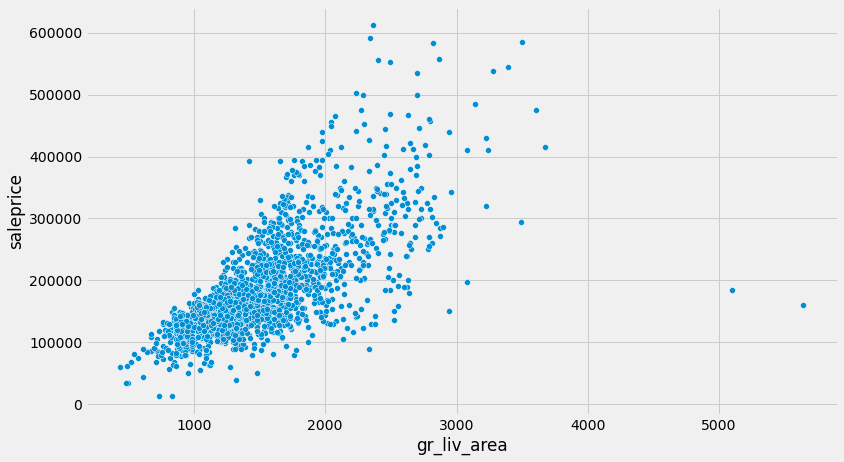

In [947]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='gr_liv_area', y='saleprice',data=train_df)

In [948]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['gr_liv_area'][train_df['gr_liv_area'] > 4000]

960     5642.0
1885    5095.0
Name: gr_liv_area, dtype: float64

In [949]:
# Drop the outliers for train_df_num, train_df_ord, train_df_nom
train_df = train_df.drop(index=[960,1885])
# train_df_num.head()

### Removing outliers that were above or below 3 standard deviations from their mean values for SalePrice

In [950]:
outlier_saleprice_pos = train_df['saleprice'].mean() + train_df['saleprice'].std() *3
outlier_saleprice_neg = train_df['saleprice'].mean() - train_df['saleprice'].std() *3

In [951]:
# Getting the outliers for sale price 
salesprice_outliers = train_df[(train_df['saleprice'] > outlier_saleprice_pos) | (train_df['saleprice'] < outlier_saleprice_neg)]
len(salesprice_outliers.index)

32

In [952]:
# Drop the outliers for train_df
train_df = train_df.drop(index=salesprice_outliers.index.tolist())

## Saving the cleaned dataframe to csv files

In [953]:
train_df.to_csv('../datasets/clean_train_df.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Creating a quick overview of each numeric feature.

## EDA on numeric dataframe

In [954]:
clean_train_df = pd.read_csv('../datasets/clean_train_df.csv')

In [955]:
clean_train_df.describe().T

count           mean           std      min        25%  \
lot_frontage    1900.0      69.023326     20.355957     21.0      60.00   
lot_area        1900.0   10030.787368   6572.575453   1300.0    7530.75   
overall_qual    1900.0       6.142105      1.337598      1.0       5.00   
overall_cond    1900.0       5.577895      1.065390      1.0       5.00   
year_built      1900.0    1972.908947     29.122783   1879.0    1955.00   
year_remod/add  1900.0    1984.482105     20.762815   1950.0    1965.00   
mas_vnr_area    1900.0      96.509632    162.849874      0.0       0.00   
bsmtfin_sf_1    1900.0     438.751579    425.219728      0.0       0.00   
total_bsmt_sf   1900.0    1052.425789    401.505893      0.0     802.50   
1st_flr_sf      1900.0    1157.695263    355.725566    438.0     885.75   
2nd_flr_sf      1900.0     330.377368    422.852685      0.0       0.00   
gr_liv_area     1900.0    1491.938947    456.582426    438.0    1144.00   
bsmt_full_bath  1900.0       0.427368      0.513625      0.0       0.00   
full_bath       1900.0       1.576316      0.540091      0.0       1.00   
half_bath       1900.0       0.375263      0.500362      0.0       0.00   
bedroom_abvgr   1900.0       2.834211      0.795186      0.0       2.00   
kitchen_abvgr   1900.0       1.033158      0.182012      1.0       1.00   
totrms_abvgrd   1900.0       6.395263      1.450274      3.0       5.00   
fireplaces      1900.0       0.606316      0.633256      0.0       0.00   
garage_yr_blt   1900.0    1978.144211     24.871534   1895.0    1961.00   
garage_cars     1900.0       1.861579      0.639492      1.0       1.00   
garage_area     1900.0     494.273684    180.577130    100.0     360.00   
wood_deck_sf    1900.0      95.181053    128.203165      0.0       0.00   
open_porch_sf   1900.0      46.942632     64.291614      0.0       0.00   
mo_sold         1900.0       6.217895      2.735851      1.0       4.00   
yr_sold         1900.0    2007.779474      1.313558   2006.0    2007.00   
saleprice       1900.0  180722.016842  68393.132772  12789.0  132500.00   

                      50%        75%       max  
lot_frontage        69.06      78.00     313.0  
lot_area          9522.50   11500.00  159000.0  
overall_qual         6.00       7.00      10.0  
overall_cond         5.00       6.00       9.0  
year_built        1976.00    2001.00    2010.0  
year_remod/add    1993.00    2004.00    2010.0  
mas_vnr_area         0.00     160.00    1600.0  
bsmtfin_sf_1       381.00     733.25    1880.0  
total_bsmt_sf     1004.00    1313.25    3206.0  
1st_flr_sf        1096.00    1392.75    2898.0  
2nd_flr_sf           0.00     700.25    1836.0  
gr_liv_area       1456.00    1721.00    3672.0  
bsmt_full_bath       0.00       1.00       2.0  
full_bath            2.00       2.00       4.0  
half_bath            0.00       1.00       2.0  
bedroom_abvgr        3.00       3.00       6.0  
kitchen_abvgr        1.00       1.00       3.0  
totrms_abvgrd        6.00       7.00      13.0  
fireplaces           1.00       1.00       4.0  
garage_yr_blt     1979.00    2002.00    2010.0  
garage_cars          2.00       2.00       5.0  
garage_area        483.00     576.00    1356.0  
wood_deck_sf         0.00     168.00    1424.0  
open_porch_sf       28.00      70.00     547.0  
mo_sold              6.00       8.00      12.0  
yr_sold           2008.00    2009.00    2010.0  
saleprice       165200.00  214125.00  421250.0

`mas_vnr_area`, `bsmt_full_bath`, `wood_deck_sf`, `2nd_flr_sf` attributes have a square feet of 0 for their median square feet. It seems most houses do not have these attributes.

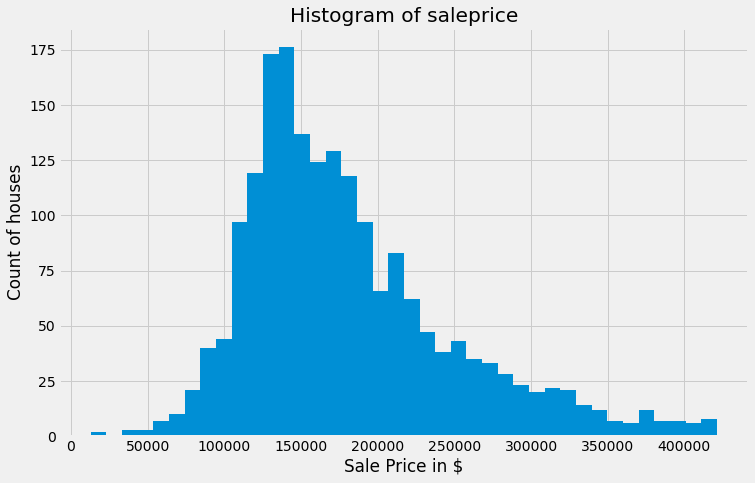

In [956]:
# Plotting the histogram of saleprice
plt.figure(figsize=(11,7))
clean_train_df['saleprice'].plot(kind='hist',bins=40)

plt.title('Histogram of saleprice')
plt.xlabel('Sale Price in $')
plt.ylabel('Count of houses');

As seen in the histogram, it's a heavy right-tailed histogram containing a lot of outliers. The decision to remove the outliers can be difficult as some of them may provide important information. I've decided to take a natural log-transformation of `saleprice` to transform it into a more normal distribution curve with less extreme values. This results in a log-linear model with linear explanatory variables.

In [1142]:
clean_train_df['saleprice'] = np.log(clean_train_df['saleprice'])
clean_train_df['saleprice']

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
1895    12.607366
1896    11.320554
1897    12.083905
1898    11.877569
1899    12.149502
Name: saleprice, Length: 1900, dtype: float64

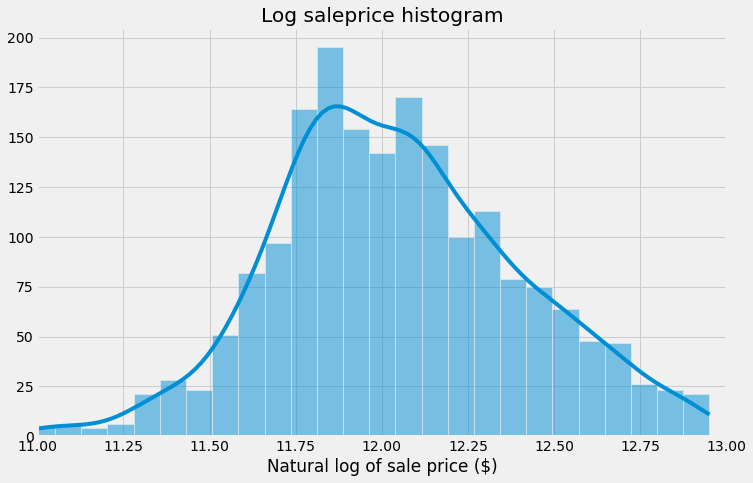

In [1148]:
plt.figure(figsize=(11,7))
sns.histplot(clean_train_df['saleprice'], kde=True)
plt.title('Log saleprice histogram')
plt.xlabel('Natural log of sale price ($)')
plt.ylabel('')
plt.xlim(11,13);

## Best land contour for a house

Text(0, 0.5, 'Land Contour')

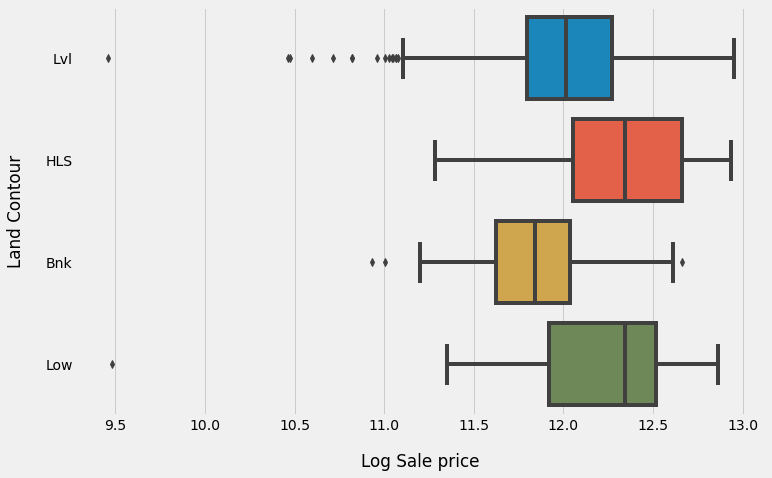

In [1176]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='land_contour', data=clean_train_df)
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Land Contour', labelpad=20)

Houses with `HLS`, Hillside with significant slopes from the side and have low land contours have a higher median price and a greater range of pricing.

## Best roof styles

Text(0, 0.5, 'Roof style')

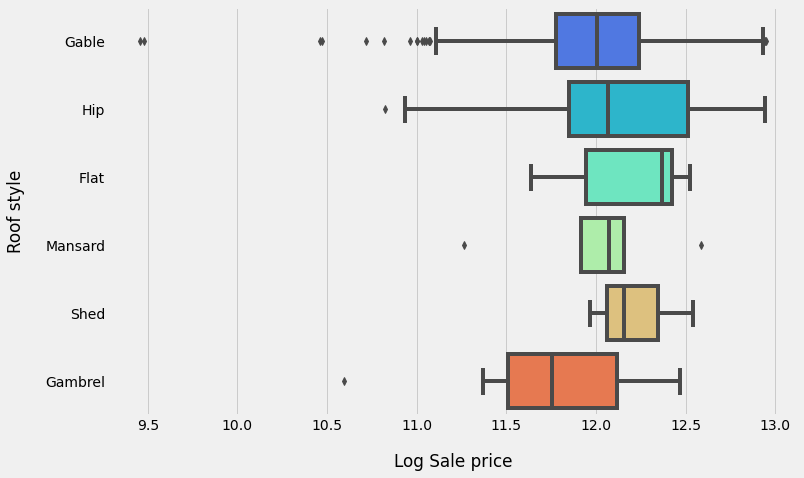

In [1177]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='roof_style', data=clean_train_df, palette='rainbow')
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Roof style', labelpad=20)

# clean_train_df['roof_style']

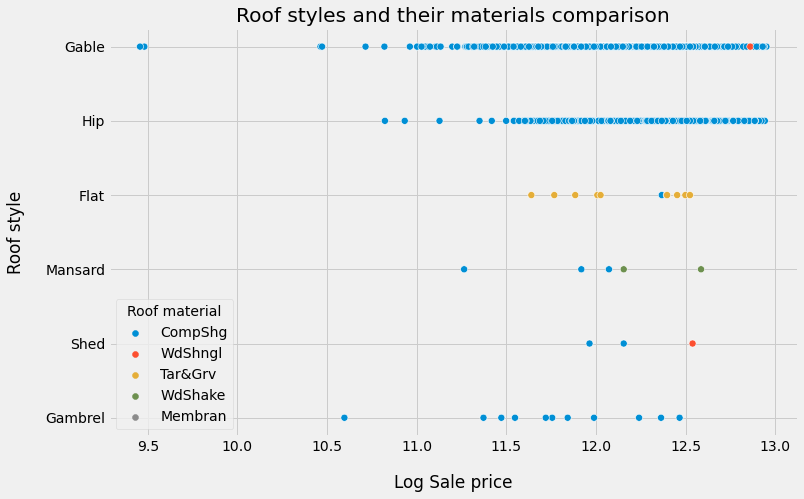

In [1196]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='saleprice', y='roof_style', data=clean_train_df, s=50, hue='roof_matl')
plt.title('Roof styles and their materials comparison')
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Roof style', labelpad=20)
plt.legend(title='Roof material')

Most roof style houses range price falling between 12.0 and 12.5. The `Gambrel` has the lowest median price. The most used type of `roof_style` is `Gable` and `Hip` and almost all of them are made of Standard (Composite) Shingle. For `Flat` type of roof style, they're mostly made of Gravel & Tar.

## Fireplaces and their qualities

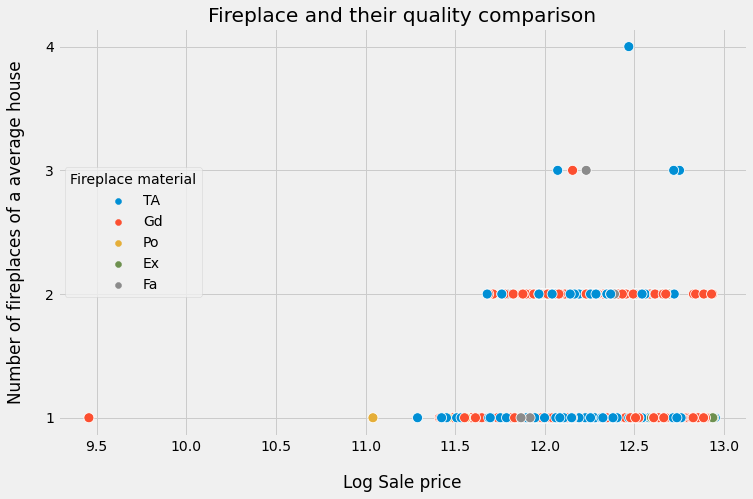

In [1216]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='saleprice', y='fireplaces', data=clean_train_df, hue='fireplace_qu', s=100)

plt.title('Fireplace and their quality comparison')

plt.xlabel('Log Sale price', labelpad=20)
plt.yticks(np.arange(1,5), [1,2,3,4])
plt.ylabel('Number of fireplaces of a average house', labelpad=20)

plt.legend(title='Fireplace material', loc='center left');

Text(0, 0.5, 'Fireplace quality')

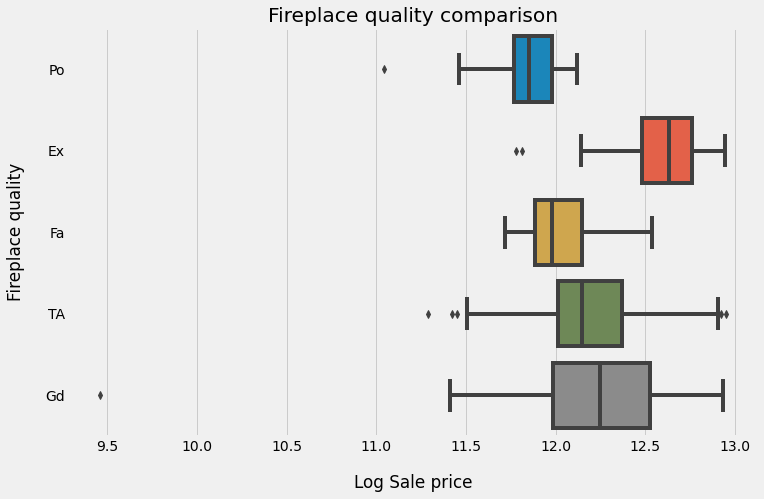

In [1226]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='fireplace_qu', data=clean_train_df, order=['Po', 'Ex', 'Fa', 'TA', 'Gd'])

plt.title('Fireplace quality comparison')

plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Fireplace quality', labelpad=20)

In [1220]:
clean_train_df.groupby('fireplace_qu').sum()['fireplaces']

fireplace_qu
Ex     28
Fa     70
Gd    553
Po     30
TA    471
Name: fireplaces, dtype: int64

Majority of the houses have at least 1 fireplace and their quality is either good or average. 

The more higher end their fireplace quality is 

In [958]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color)
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[1], ax=ax[i], kde=True)
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])
        
        plt.tight_layout(pad=2.0)

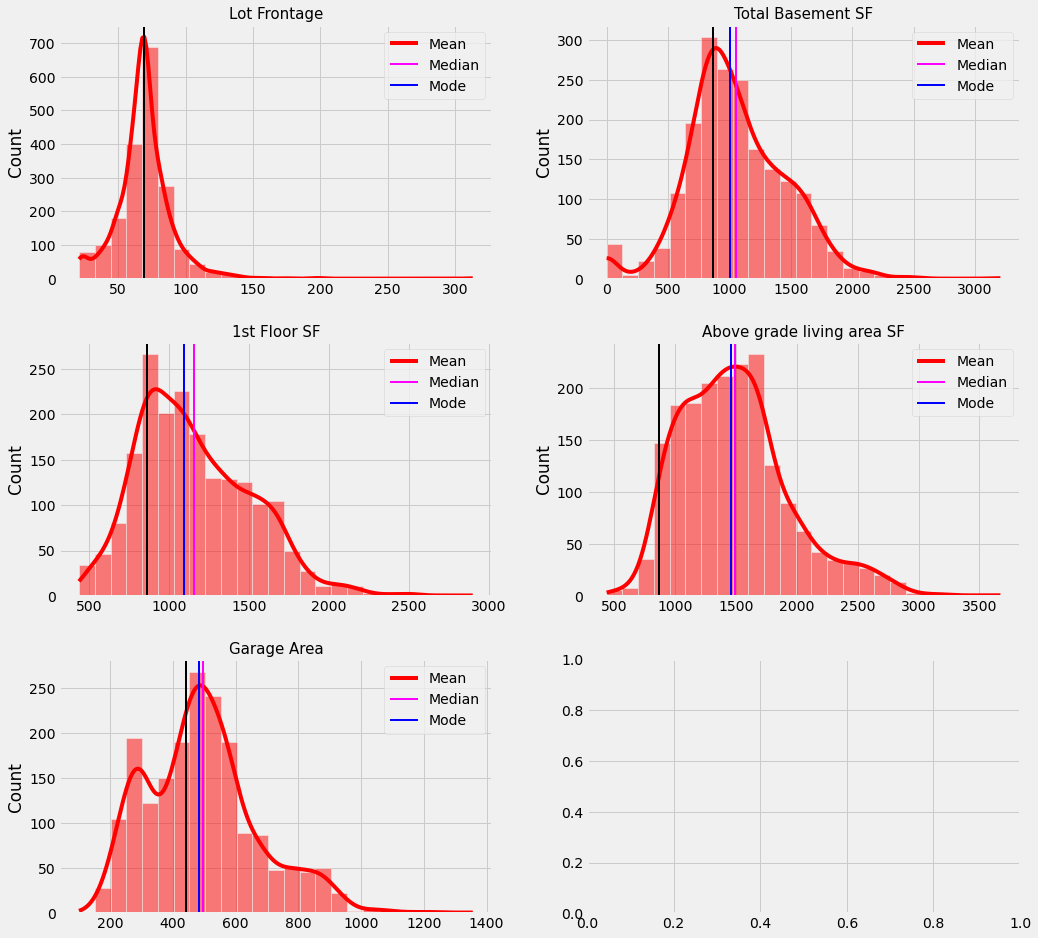

In [959]:
# Plotting the histograms for each numeric variable
subplot_histograms(clean_train_df, ['lot_frontage', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'garage_area'],
                   ['Lot Frontage', 'Total Basement SF', '1st Floor SF', 'Above grade living area SF', 'Garage Area'], bins=25)

<AxesSubplot:xlabel='garage_area', ylabel='Count'>

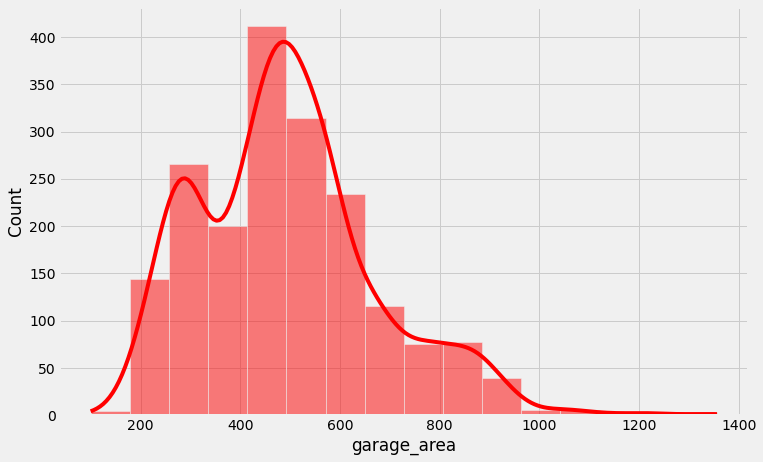

In [960]:
plt.figure(figsize=(11,7))
sns.histplot(data=clean_train_df['garage_area'], bins=16, kde=True, color='red')

## Plotting the boxplots

In [961]:
def subplot_boxplots(dataframe, list_of_columns, list_of_titles, xlabel=None, yticklabels=None, palette='coolwarm', sup_title='Boxplots'):
    plt.figure(figsize=(11, 7))
    # Set titles, labels, etc here for each subplot
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2))
    if len(list_of_columns) >= 2:
        figsize = (20, 14)
    else:
        figsize = (11, 7)
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize)
    ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)

    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns):
        # Plot in horizontal manner, with x-axis being the column values
        sns.boxplot(x=column, data=dataframe, orient='h',
                    color='red', width=0.5, ax=ax[i])
        # Set titles, labels, etc here for each subplot

        ax[i].set_title(list_of_titles[i], fontsize=20)
        # ax[i].set_xticks(fontsize=200)
        ax[i].set_xlabel('')
        #ax[i].set_xticks(ticks=[tick for tick in range(len(list_of_columns))])

        plt.tight_layout(pad=3.0)

<Figure size 792x504 with 0 Axes>

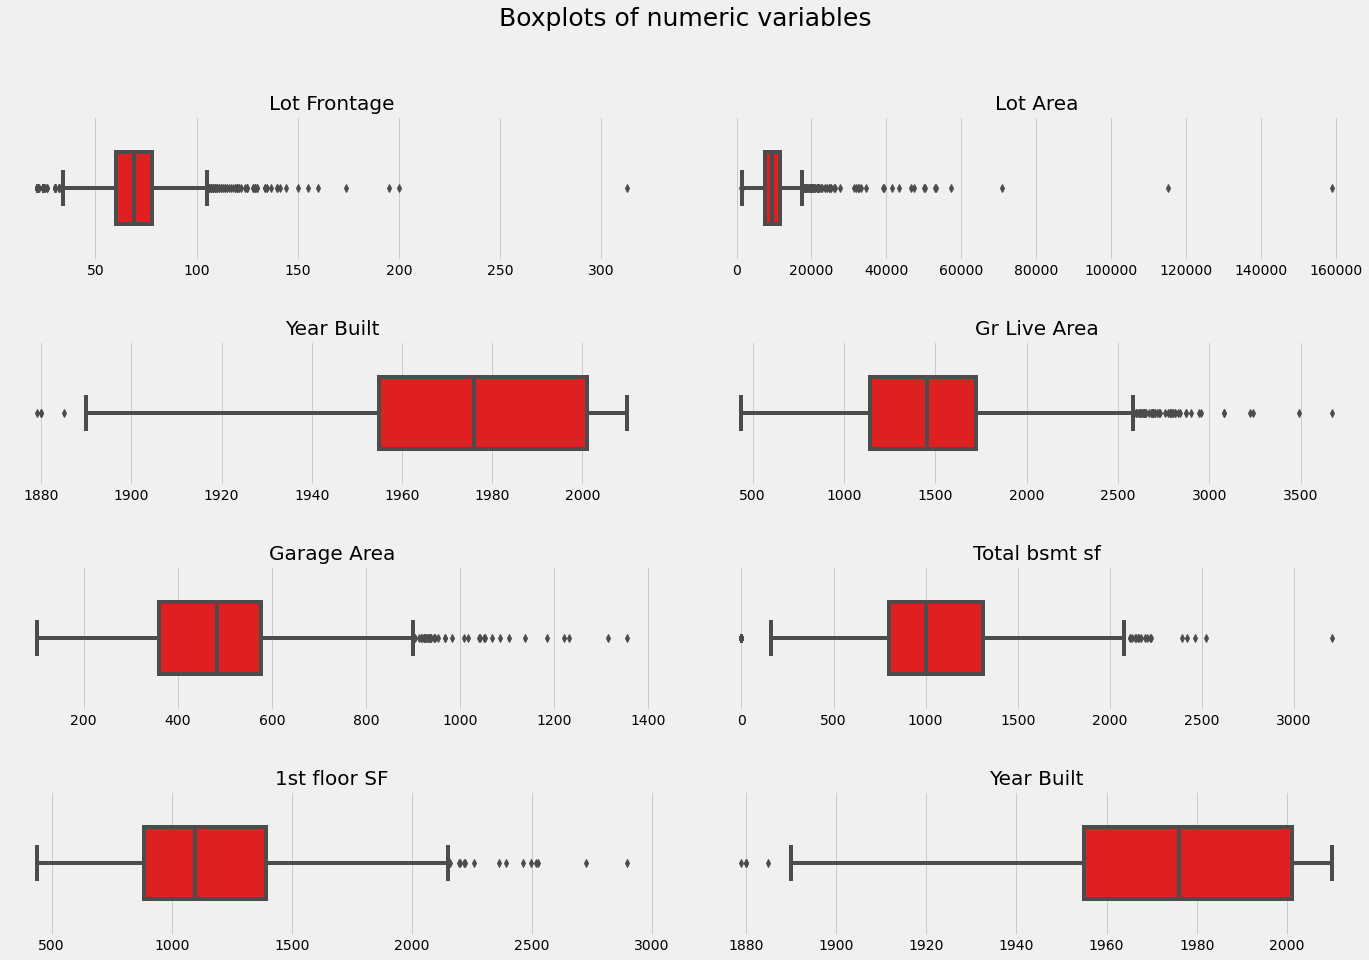

In [962]:
subplot_boxplots(clean_train_df, ['lot_frontage', 'lot_area', 'year_built', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', '1st_flr_sf', 'year_built'],
                 ['Lot Frontage', 'Lot Area', 'Year Built', 'Gr Live Area', 'Garage Area', 'Total bsmt sf', '1st floor SF', 'Year Built'], sup_title='Boxplots of numeric variables');

Interpretation

In [963]:
def single_boxplots(dataframe, list_of_cols, title='test', figsize=(10,7), c='red'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=dataframe[list_of_cols], orient='h', color=c, whis=1.5)
    
    plt.title(title, fontsize=20)
    plt.xlabel(list_of_cols[0] + ' values', labelpad=20)
#     plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]) # Ticks = np.arange(25,300,25)
#     plt.xlim(10,400)
#     plt.yticks(ticks=[i for i in range(len(list_of_cols))],labels=list_of_cols)
#     plt.ylabel('Lot Frontage')

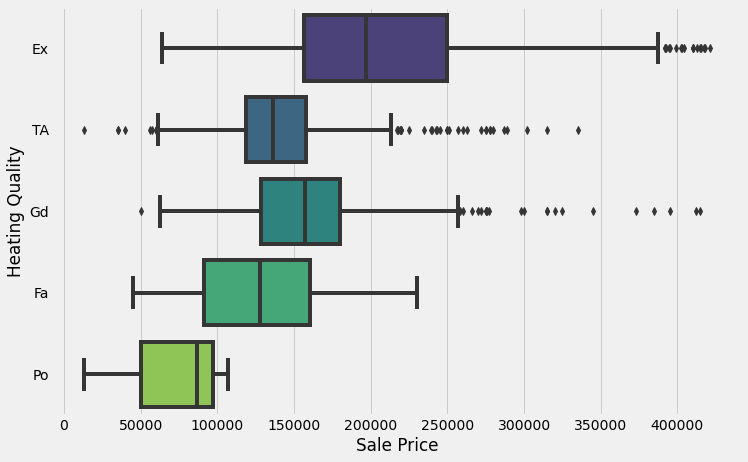

In [964]:
# Boxplot of saleprice and heating_qc variables
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='heating_qc',data=clean_train_df, palette='viridis')
plt.xlabel('Sale Price')
plt.ylabel('Heating Quality');

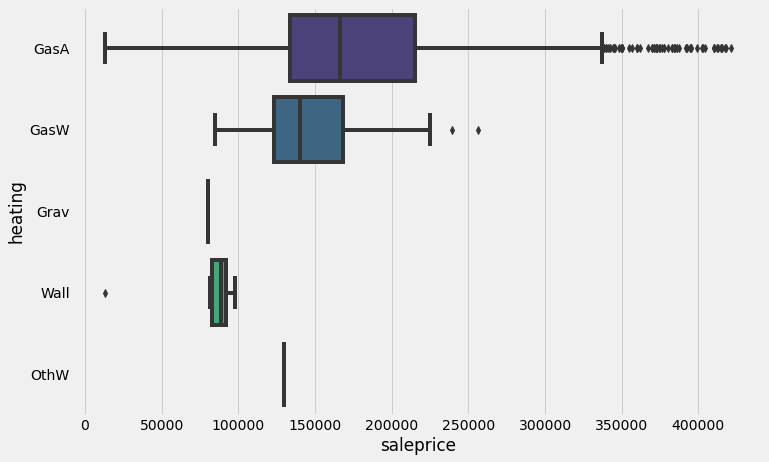

In [965]:
# Boxplot of saleprice and heating_qc variables
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='heating',data=clean_train_df, palette='viridis');

Most houses have an excellent quality gas forced warm air furnace. This shows that houses that have Gas A and have an excellent heat quality tend to sell at a high price compared to other categories and quality. 

In [966]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

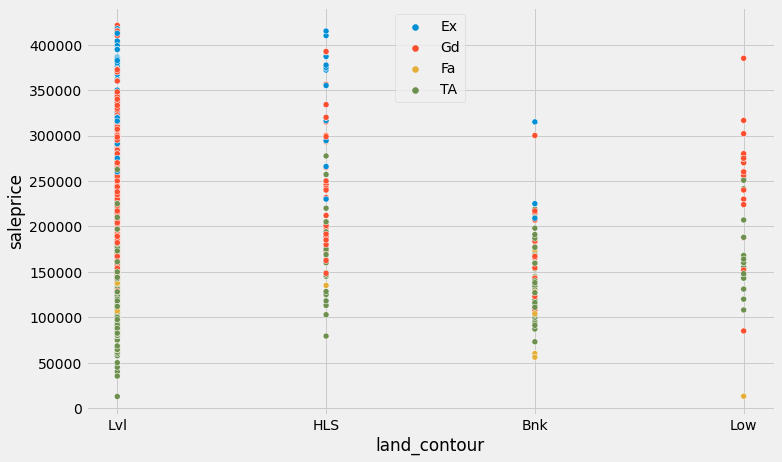

In [967]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='land_contour', y='saleprice',
                data=clean_train_df, hue='kitchen_qual', hue_order=['Ex', 'Gd', 'Fa', 'TA'])
plt.legend(loc='upper center');

Most houses have a near flat or level type of land contour and their sale price tends to become low when their typical/average and sale prices become high when their kitchen quality is Excelllent. This shows some positive correlation between saleprice and kitchen quality.

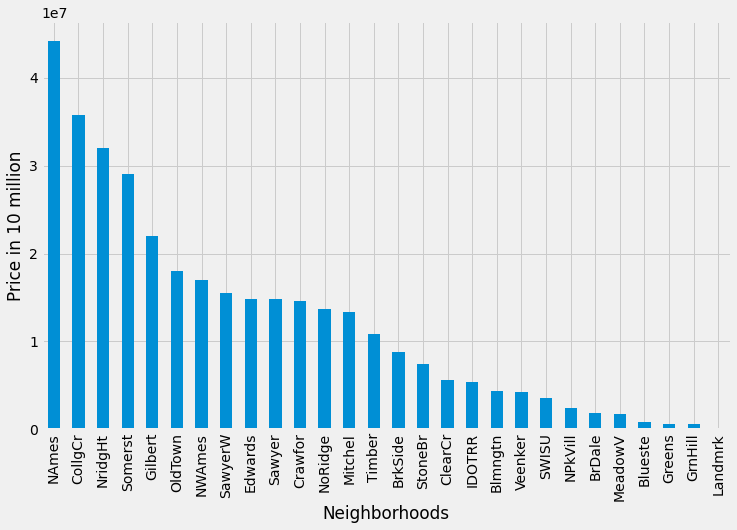

In [968]:
# Check the prices of the house for each neighborhood
clean_train_df.groupby('neighborhood').sum().sort_values('saleprice', ascending=False)['saleprice'].plot(kind='bar', figsize=(11,7))
plt.xlabel('Neighborhoods')
plt.ylabel('Price in 10 million');

Highest priced neighborhood is North Ames (Names) while Landmark has the lowest priced.

In [1133]:
clean_train_df.groupby('neighborhood').mean().sort_values('saleprice', ascending=False)[['lot_area', 'saleprice']].plot(kind='scatter')

KeyError: "['lot_area'] not in index"

### Correlation between the features

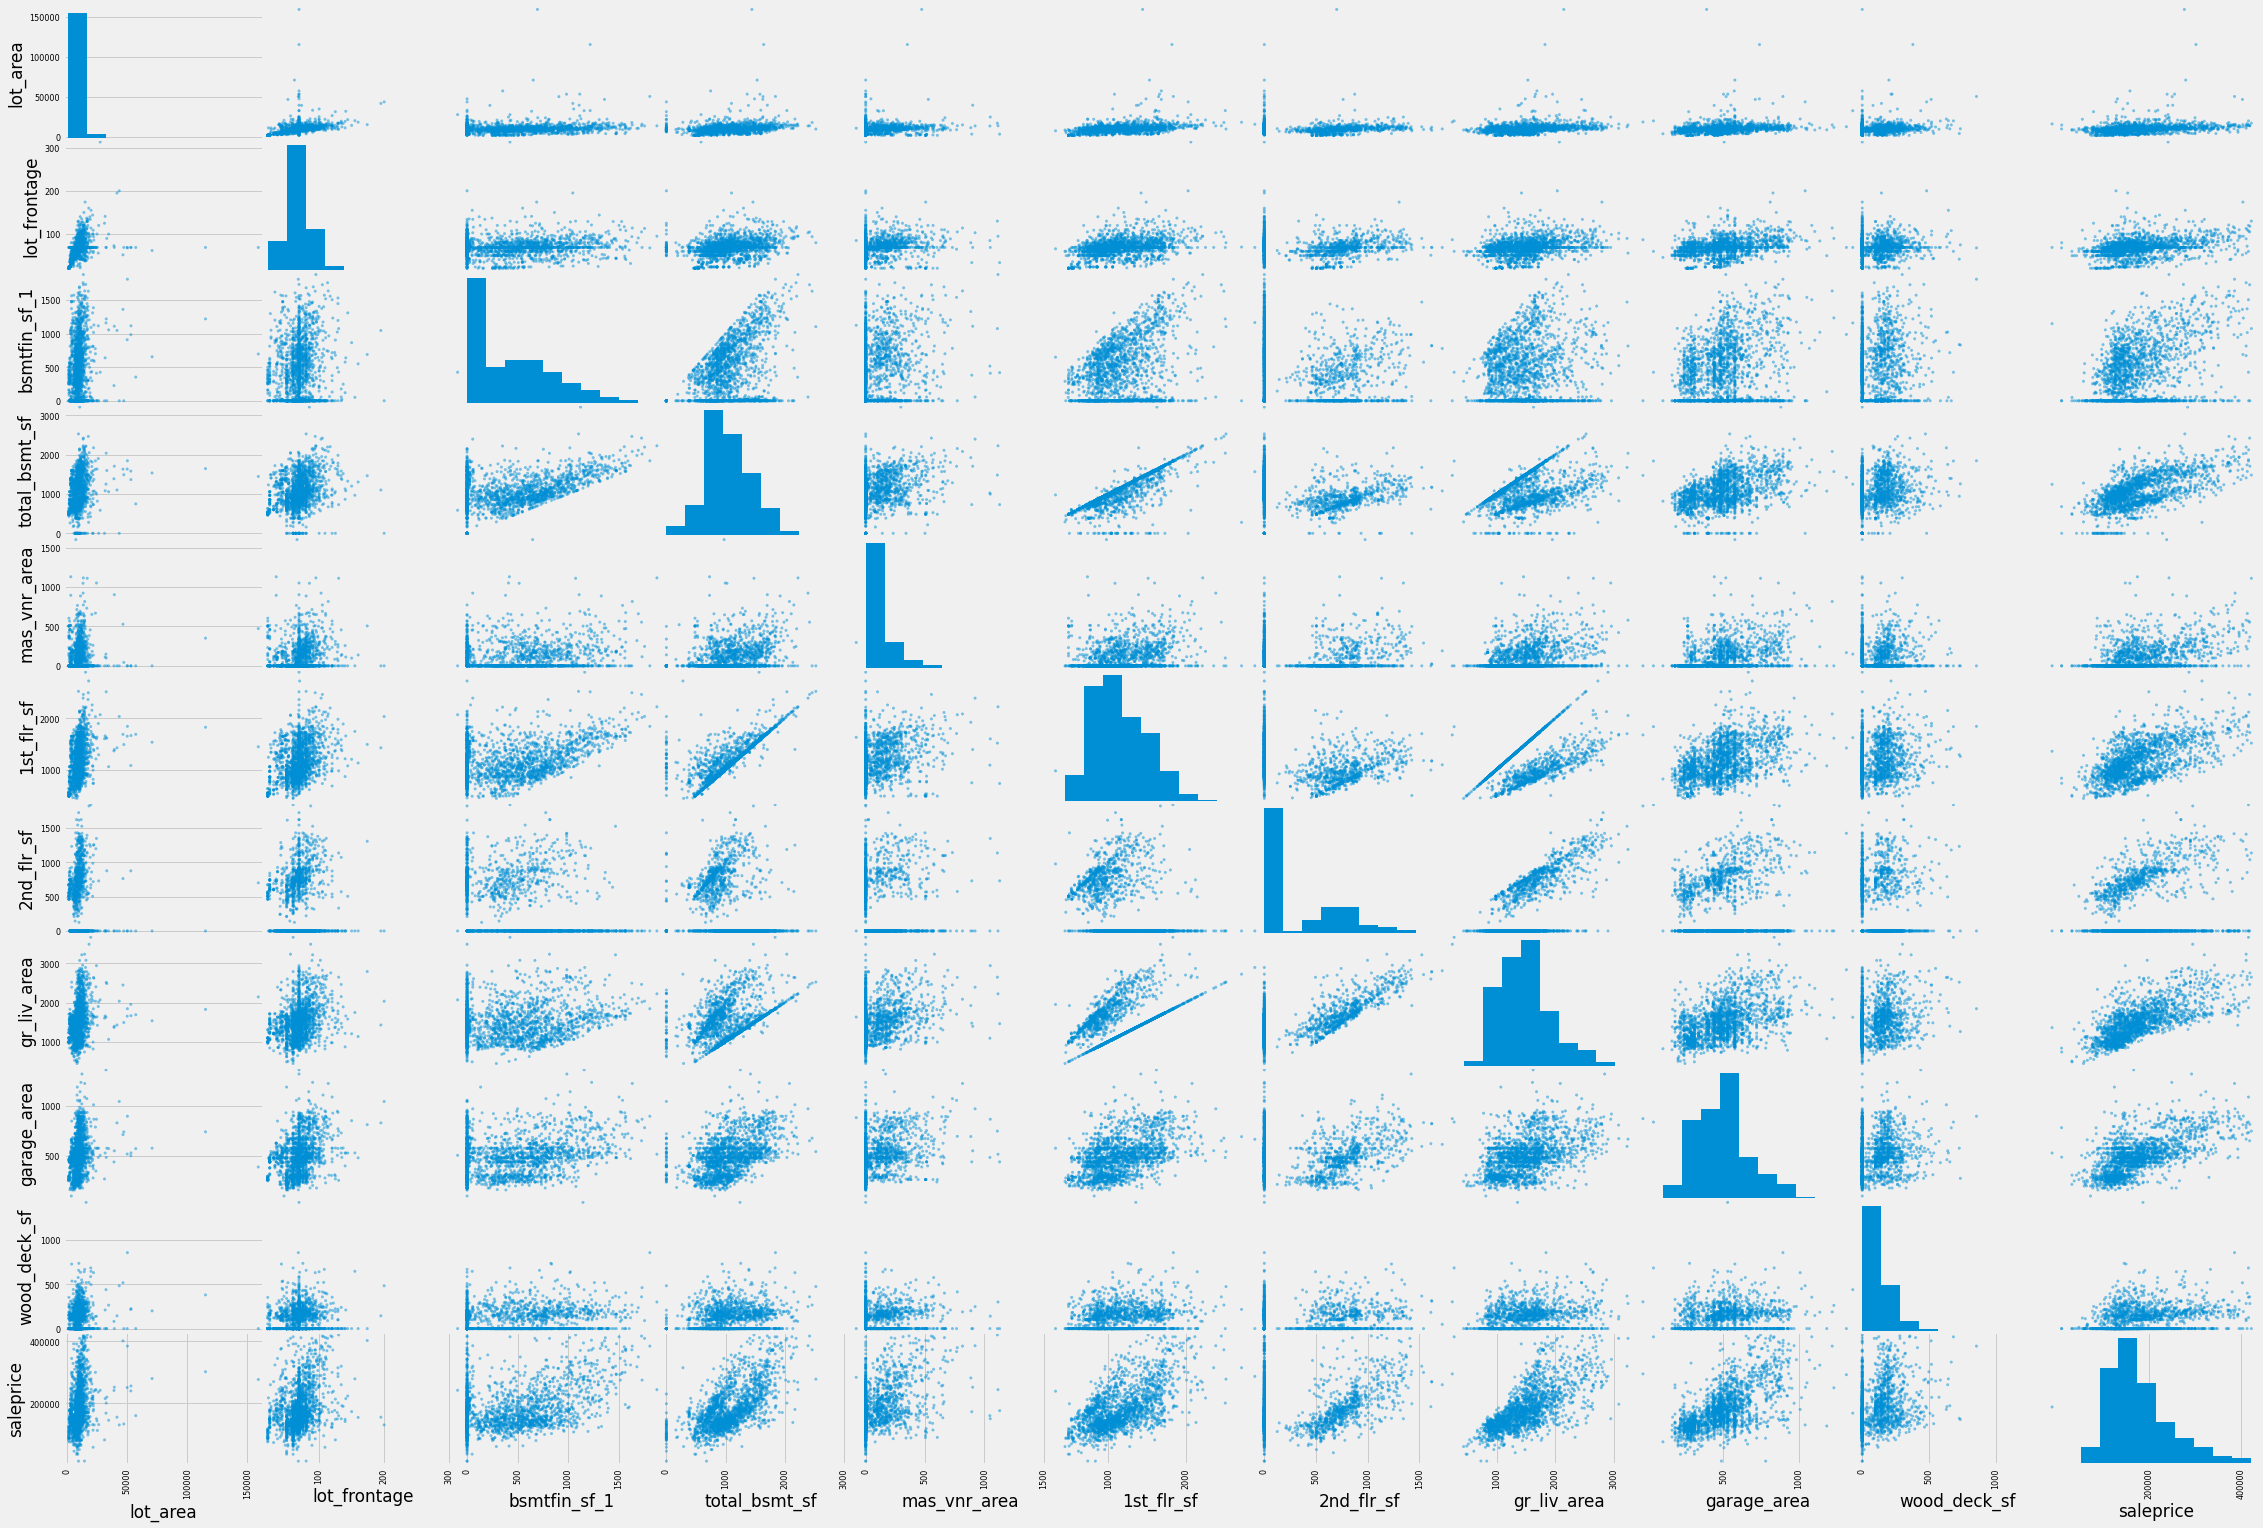

In [970]:
# Scatter matrix of notable variables
from pandas.plotting import scatter_matrix

attributes = [
    "lot_area",
    "lot_frontage",
    "bsmtfin_sf_1",
    "total_bsmt_sf",
    "mas_vnr_area",
    "1st_flr_sf",
    "2nd_flr_sf",
    "gr_liv_area",
    "garage_area",
    "wood_deck_sf",
    "saleprice"
]

scatter_matrix(clean_train_df[attributes], figsize=(35,25));

Some notable attributes that have decent to strong correlations with `saleprice` are:
* lot_area
* lot_frontage
* bsmtfin_sf_1
* total_bsmt_sf
* mas_vnr_area
* 1st_flr_sf
* 2nd_flr_sf 	
* gr_liv_area
* garage_area
* wood_deck_sf

## Feature engineering

In [971]:
# Obtain the House Age
clean_train_df['house_age']  =clean_train_df['yr_sold'] - clean_train_df['year_built']
clean_train_df

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
1895  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
1896             1story_1945_&_older        RL         69.06   12342.0   Pave   
1897    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
1898  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
1899             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
1895       IR1          HLS    AllPub     Inside        Gtl       Timber   
1896       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1897       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
1898       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1899       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
1895        Norm        Norm      1Fam      1Story             8   
1896        Norm        Norm      1Fam      1Story             4   
1897        Norm        Norm      1Fam      1.5Fin             6   
1898        Norm        Norm      1Fam      1Story             4   
1899        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1895             5        2007            2007      Gable   CompShg   
1896             5        1940            1950      Gable   CompShg   
1897             6        1928            1950      Gable   CompShg   
1898             5        1956            1956      Gable   CompShg   
1899             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

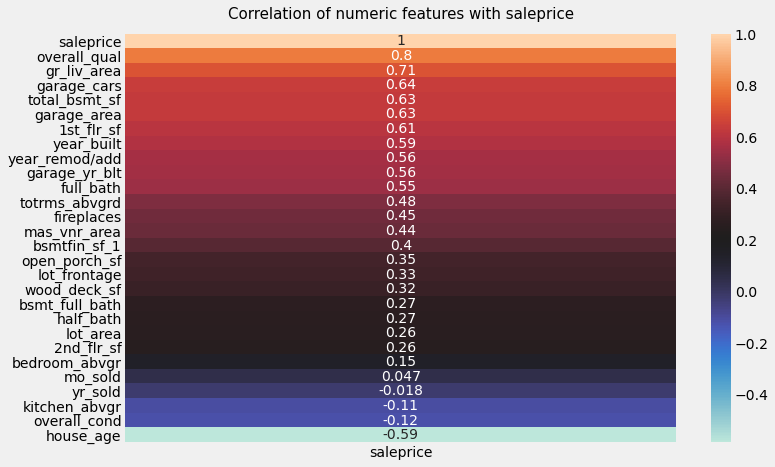

In [972]:
single_corr_heatmap(clean_train_df,['saleprice'])

In [973]:
# Create a function to combine relevant features together for feature engineering
def combine_features(dataframe, list_of_features):
    '''
    Function that combines 2 features
    '''
    feature_name = "*".join(list_of_features)
    f1, f2 = list_of_features
    dataframe[feature_name] = dataframe[f1] * dataframe[f2]
    return dataframe

In [974]:
# Combine both garage cars and garage_yr_blt 
combine_features(clean_train_df, ['garage_cars', 'garage_yr_blt'])

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
1895  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
1896             1story_1945_&_older        RL         69.06   12342.0   Pave   
1897    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
1898  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
1899             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
1895       IR1          HLS    AllPub     Inside        Gtl       Timber   
1896       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1897       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
1898       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1899       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
1895        Norm        Norm      1Fam      1Story             8   
1896        Norm        Norm      1Fam      1Story             4   
1897        Norm        Norm      1Fam      1.5Fin             6   
1898        Norm        Norm      1Fam      1Story             4   
1899        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1895             5        2007            2007      Gable   CompShg   
1896             5        1940            1950      Gable   CompShg   
1897             6        1928            1950      Gable   CompShg   
1898             5        1956            1956      Gable   CompShg   
1899             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

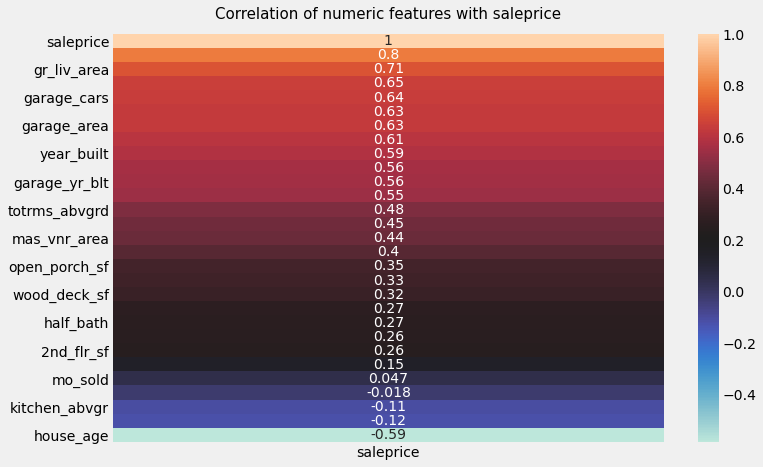

In [975]:
single_corr_heatmap(clean_train_df,['saleprice'])

`garage_cars*garage_yr_blt` have a better correlation compared to `garage_cars` and `garage_yr_blt`. Will drop both.

In [976]:
# Drop both garage_cars and garage_yr_blt
clean_train_df.drop(['garage_cars', 'garage_yr_blt'], axis=1, inplace=True)

In [977]:
# Try combining full_bath and half_bath
combine_features(clean_train_df, ['full_bath', 'half_bath'])

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
1895  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
1896             1story_1945_&_older        RL         69.06   12342.0   Pave   
1897    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
1898  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
1899             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
1895       IR1          HLS    AllPub     Inside        Gtl       Timber   
1896       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1897       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
1898       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1899       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
1895        Norm        Norm      1Fam      1Story             8   
1896        Norm        Norm      1Fam      1Story             4   
1897        Norm        Norm      1Fam      1.5Fin             6   
1898        Norm        Norm      1Fam      1Story             4   
1899        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1895             5        2007            2007      Gable   CompShg   
1896             5        1940            1950      Gable   CompShg   
1897             6        1928            1950      Gable   CompShg   
1898             5        1956            1956      Gable   CompShg   
1899             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

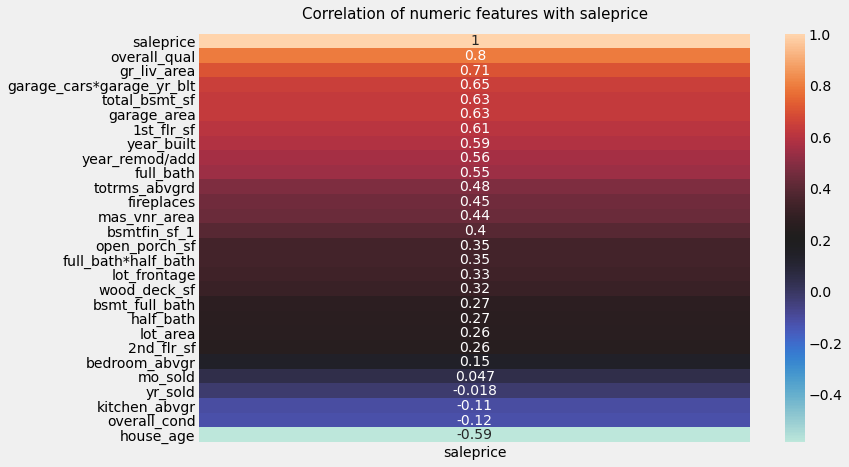

In [978]:
single_corr_heatmap(clean_train_df,['saleprice'])

Despite combining them, `full_bath*half_bath` still produce very little correlation. Will drop them

In [979]:
# Drop the 'full_bath*half_bath feature
clean_train_df.drop(['full_bath*half_bath'], axis=1, inplace=True)

In [980]:
# Combine bsmt_full_bath and full_bath
combine_features(clean_train_df, ['bsmt_full_bath', 'full_bath'])

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
1895  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
1896             1story_1945_&_older        RL         69.06   12342.0   Pave   
1897    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
1898  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
1899             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
1895       IR1          HLS    AllPub     Inside        Gtl       Timber   
1896       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1897       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
1898       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1899       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
1895        Norm        Norm      1Fam      1Story             8   
1896        Norm        Norm      1Fam      1Story             4   
1897        Norm        Norm      1Fam      1.5Fin             6   
1898        Norm        Norm      1Fam      1Story             4   
1899        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1895             5        2007            2007      Gable   CompShg   
1896             5        1940            1950      Gable   CompShg   
1897             6        1928            1950      Gable   CompShg   
1898             5        1956            1956      Gable   CompShg   
1899             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

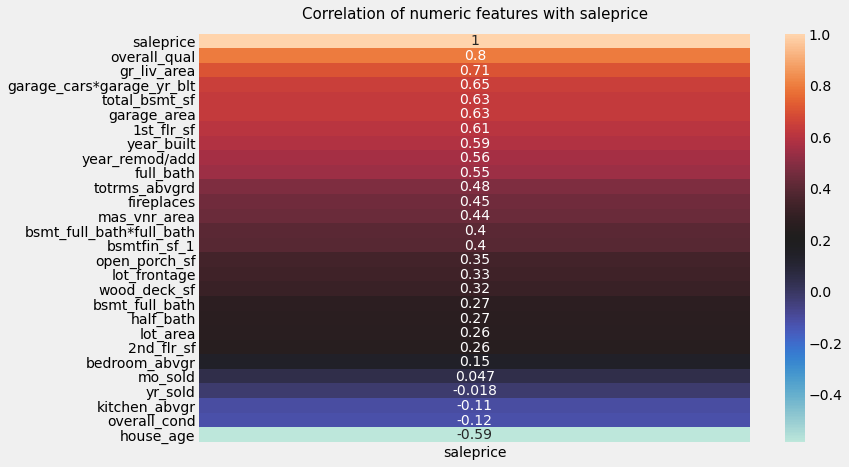

In [981]:
single_corr_heatmap(clean_train_df, ['saleprice'])

Combining the features don't seem to increase the correlation with `saleprice` as `full_bath` has the higher correlation. Will drop the combined feature

In [982]:
# Drop bsmt_full_bath*full_bath
clean_train_df.drop('bsmt_full_bath*full_bath', axis=1, inplace=True)

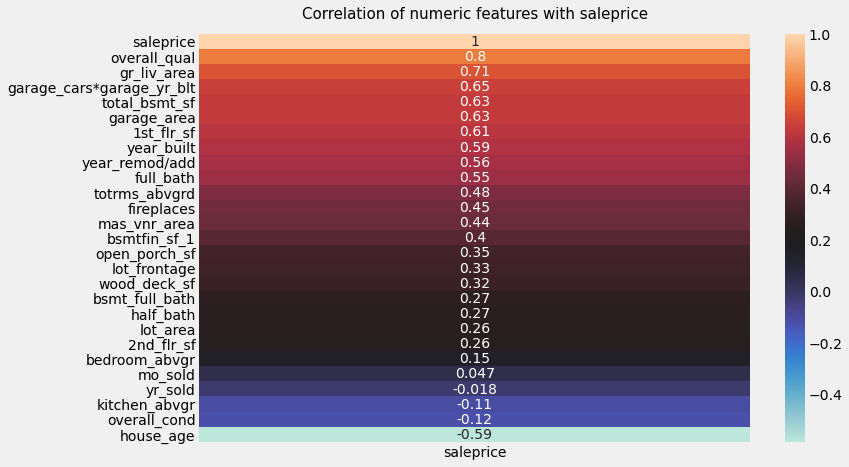

In [983]:
single_corr_heatmap(clean_train_df,['saleprice'])

In [984]:
# Combine both 1st_flr_sf and 2nd_flr_sf
combine_features(clean_train_df, ['1st_flr_sf', '2nd_flr_sf'])

ms_subclass ms_zoning  lot_frontage  lot_area street  \
0                2story_1946_&_newer        RL         69.06   13517.0   Pave   
1                2story_1946_&_newer        RL         43.00   11492.0   Pave   
2     1story_1946_&_newer_all_styles        RL         68.00    7922.0   Pave   
3                2story_1946_&_newer        RL         73.00    9802.0   Pave   
4       11/2_story_finished_all_ages        RL         82.00   14235.0   Pave   
...                              ...       ...           ...       ...    ...   
1895  1story_1946_&_newer_all_styles        RL         79.00   11449.0   Pave   
1896             1story_1945_&_older        RL         69.06   12342.0   Pave   
1897    11/2_story_finished_all_ages        RL         57.00    7558.0   Pave   
1898  1story_1946_&_newer_all_styles        RL         80.00   10400.0   Pave   
1899             2story_1946_&_newer        RL         60.00    7500.0   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3          Reg          Lvl    AllPub     Inside        Gtl       Timber   
4          IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
...        ...          ...       ...        ...        ...          ...   
1895       IR1          HLS    AllPub     Inside        Gtl       Timber   
1896       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1897       Reg          Bnk    AllPub     Inside        Gtl      Crawfor   
1898       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1899       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
0           RRAe        Norm      1Fam      2Story             6   
1           Norm        Norm      1Fam      2Story             7   
2           Norm        Norm      1Fam      1Story             5   
3           Norm        Norm      1Fam      2Story             5   
4           Norm        Norm      1Fam      1.5Fin             6   
...          ...         ...       ...         ...           ...   
1895        Norm        Norm      1Fam      1Story             8   
1896        Norm        Norm      1Fam      1Story             4   
1897        Norm        Norm      1Fam      1.5Fin             6   
1898        Norm        Norm      1Fam      1Story             4   
1899        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
0                8        1976            2005      Gable   CompShg   
1                5        1996            1997      Gable   CompShg   
2                7        1953            2007      Gable   CompShg   
3                5        2006            2007      Gable   CompShg   
4                8        1900            1993      Gable   CompShg   
...            ...         ...             ...        ...       ...   
1895             5        2007            2007      Gable   CompShg   
1896             5        1940            1950      Gable   CompShg   
1897             6        1928            1950      Gable   CompShg   
1898             5        1956            1956      Gable   CompShg   
1899             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
0         HdBoard      Plywood      BrkFace         289.0         Gd   
1         VinylSd      VinylSd      BrkFace         132.0         Gd   
2         VinylSd      VinylSd         None           0.0         TA   
3         VinylSd      VinylSd         None           0.0         TA   
4         Wd Sdng      Plywood         None           0.0         TA   
...           ...          ...       

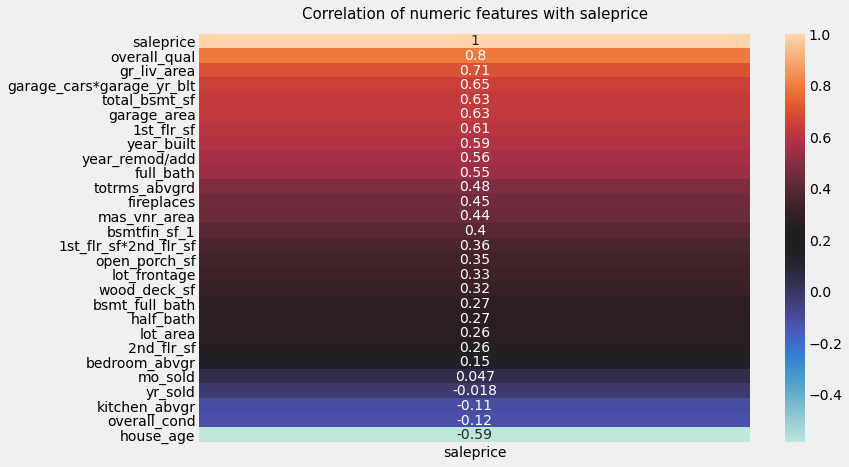

In [985]:
single_corr_heatmap(clean_train_df, ['saleprice'])

There does not seem to be a significant increase in correlation for `1st_flr_sf*2nd_flr_sf`. Will drop them

In [986]:
# Drop 1st_flr_sf*2nd_flr_sf
clean_train_df.drop('1st_flr_sf*2nd_flr_sf', axis=1, inplace=True)

## Drop features with poor correlation with `saleprice`

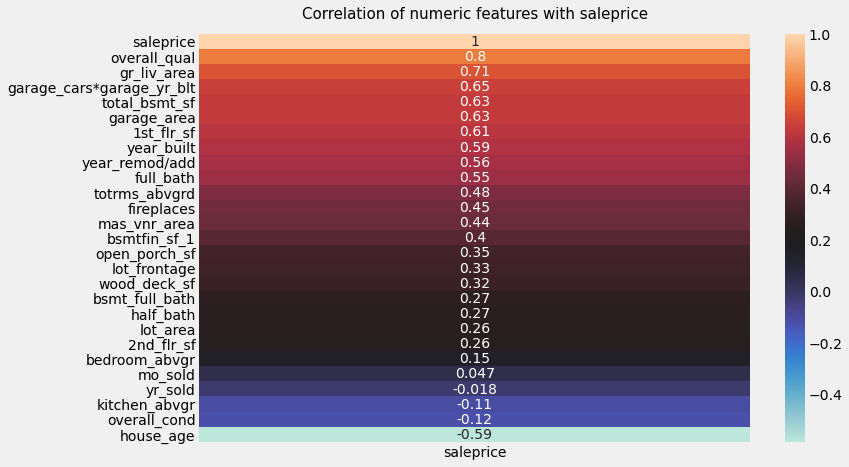

In [987]:
single_corr_heatmap(clean_train_df,['saleprice'])

Any features with **correlation of < 0.26 or  will be dropped.**

**'half_bath', 'lot_area', '2nd_flr_sf', 'bedroom_abvgr', 'mo_sold', 'yr_sold', 'kitchen_abvgr', 'overall_cond'  have very little correlation with the saleprice**.

Highest correlation features:
* gr_liv_area
* garage_area
* garage_cars
* total_bsmt_sf
* 1st_flr_sf

Lowest correlation features:
* half_bath
* lot_area
* 2nd_flr_sf
* bedroom_abvgr
* mo_sold
* yr_sold
* kitchen_abvgr
* overall_cond

In [988]:
# Drop poorly correlated features with saleprice
clean_train_df = clean_train_df.drop(
    ['half_bath', 'lot_area', '2nd_flr_sf', 'bedroom_abvgr', 'mo_sold', 'yr_sold', 'kitchen_abvgr', 'overall_cond'], axis=1)

## Checking for multi-colinarity between numeric features

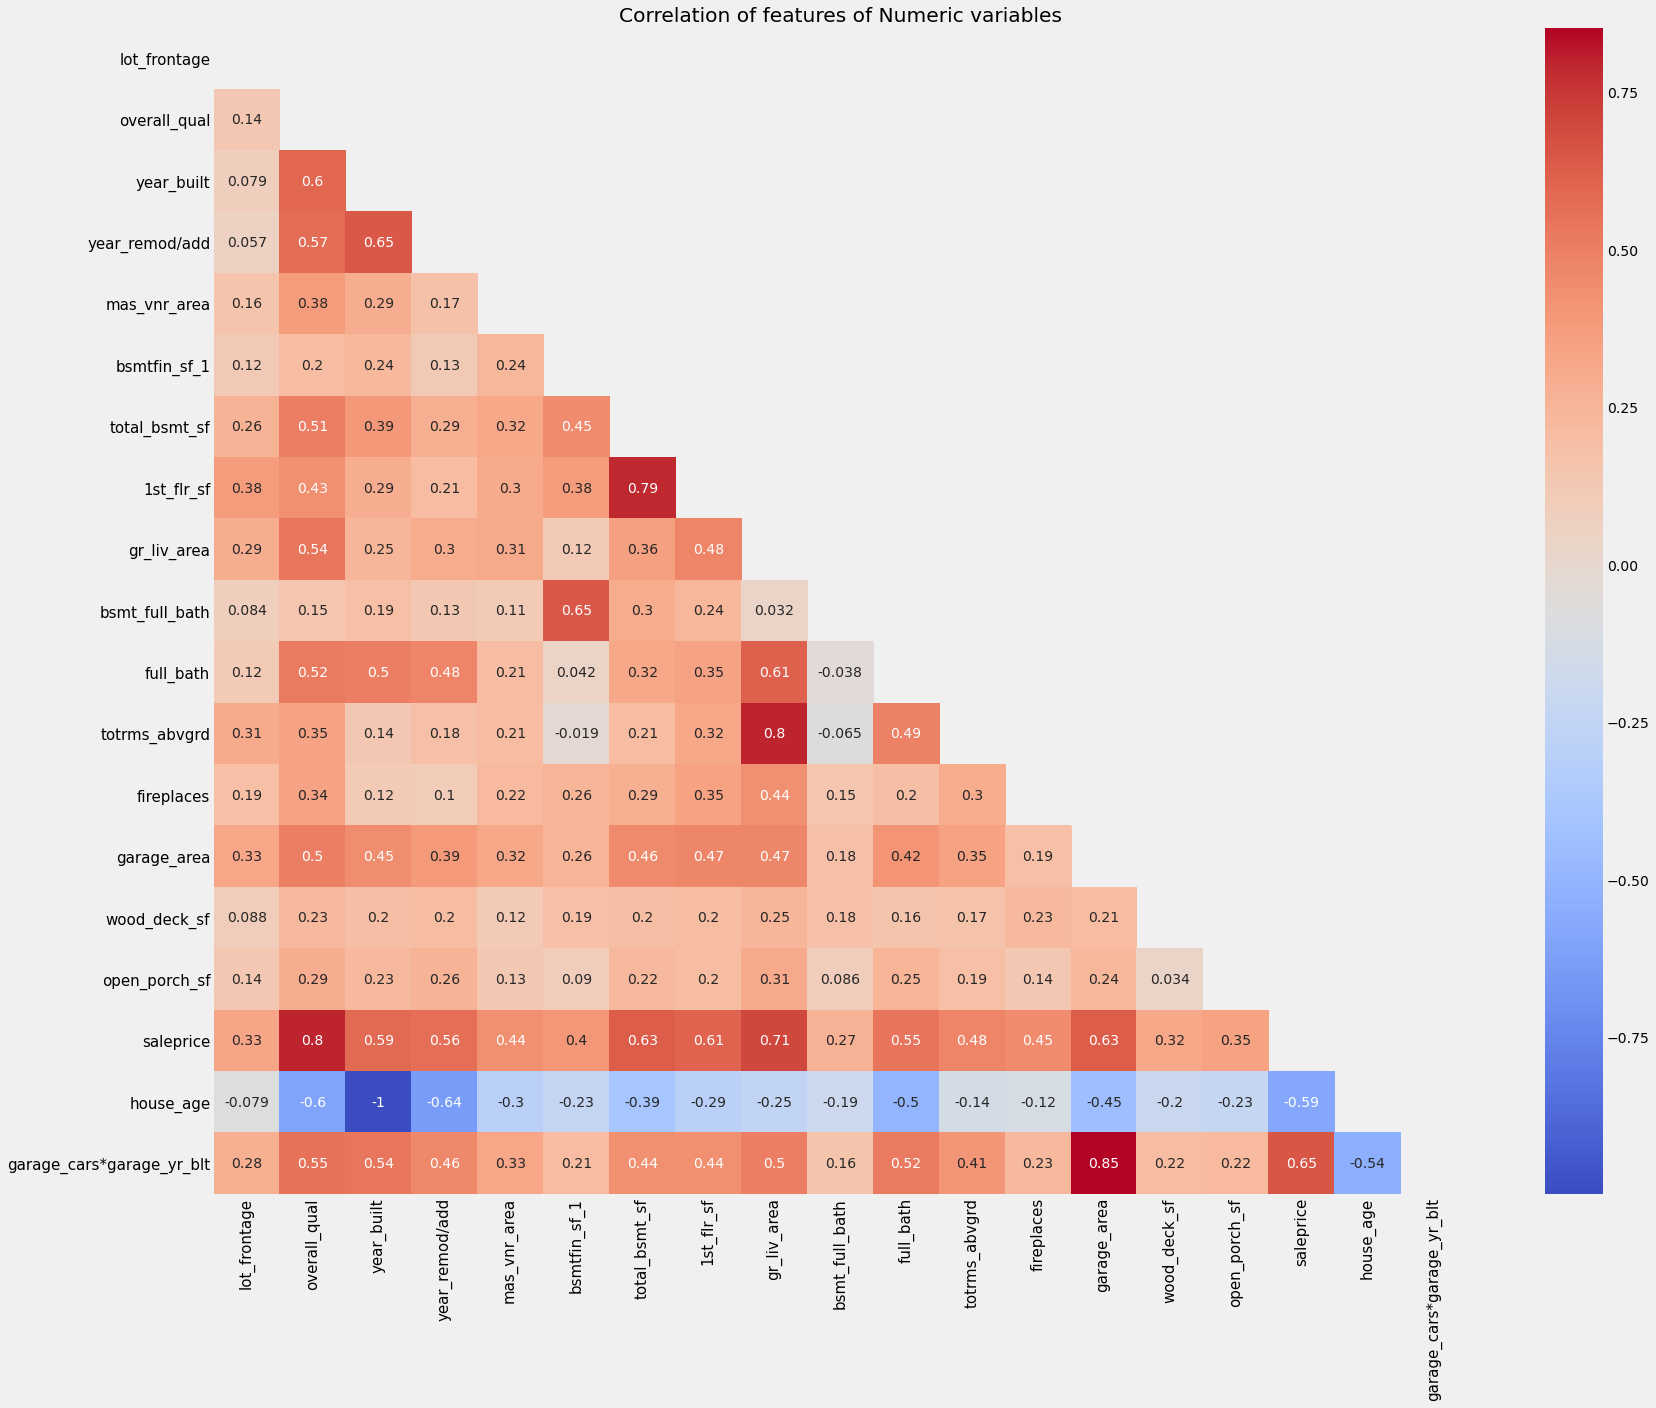

In [989]:
corr_heatmap(clean_train_df, 'Numeric', 'coolwarm')

The following features have strong mulit-corrlinearity between them: (Any 3 feature or more features with correlation > 0.5)
* overall_qual (7 features)
* year_built (3 features)
* gr_liv_area (2 features)
* garage_area (2 features)

Will drop `overall_qual`  and `year_built`

In [990]:
# Drop `overall_qual` and `year_built`
clean_train_df = clean_train_df.drop(['overall_qual', 'year_built'], axis=1)

## Heatmap Correlation of ordinal variables

In [991]:
# Rename the columns of the ordinal dataframe
train_df_ord = train_df_ord.rename(columns=add_underscore_char(train_df_ord))
train_df_ord

lot_shape utilities land_slope exter_qual exter_cond bsmt_qual bsmt_cond  \
0          IR1    AllPub        Gtl         Gd         TA        TA        TA   
1          IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2          Reg    AllPub        Gtl         TA         Gd        TA        TA   
3          Reg    AllPub        Gtl         TA         TA        Gd        TA   
4          IR1    AllPub        Gtl         TA         TA        Fa        Gd   
...        ...       ...        ...        ...        ...       ...       ...   
2046       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2047       IR1    AllPub        Gtl         TA         TA        TA        TA   
2048       Reg    AllPub        Gtl         TA         TA        TA        TA   
2049       Reg    AllPub        Gtl         TA         TA        TA        TA   
2050       Reg    AllPub        Gtl         TA         TA        TA        TA   

     bsmt_exposure bsmtfin_type_1 bsmtfin_type_2 heating_qc electrical  \
0               No            GLQ            Unf         Ex      SBrkr   
1               No            GLQ            Unf         Ex      SBrkr   
2               No            GLQ            Unf         TA      SBrkr   
3               No            Unf            Unf         Gd      SBrkr   
4               No            Unf            Unf         TA      SBrkr   
...            ...            ...            ...        ...        ...   
2046            Av            GLQ            Unf         Ex      SBrkr   
2047            No            BLQ            Unf         Ex      SBrkr   
2048            No            Unf            Unf         Gd      SBrkr   
2049            No            Rec            LwQ         TA      SBrkr   
2050            No            Unf            Unf         Gd      SBrkr   

      kitchen_abvgr kitchen_qual functional fireplace_qu garage_finish  \
0                 1           Gd        Typ          NaN           RFn   
1                 1           Gd        Typ           TA           RFn   
2                 1           Gd        Typ          NaN           Unf   
3                 1           TA        Typ          NaN           Fin   
4                 1           TA        Typ          NaN           Unf   
...             ...          ...        ...          ...           ...   
2046              1           Gd        Typ           Gd           Fin   
2047              1           TA        Typ          NaN           Unf   
2048              1           TA        Typ           TA           Unf   
2049              1           TA        Typ           Gd           Unf   
2050              1           Gd        Typ           TA           Fin   

     garage_qual garage_cond paved_drive  
0             TA          TA           Y  
1             TA          TA           Y  
2             TA          TA           Y  
3             TA          TA           Y  
4             TA          TA           N  
...          ...         ...         ...  
2046          TA          TA           Y  
2047          TA          TA           Y  
2048          Fa          Fa           Y  
2049          TA          TA           Y  
2050          TA          TA           Y  

[2051 rows x 20 columns]

In [992]:
# Drop kitchen_abvgr as it was already dropped previously
train_df_ord.drop('kitchen_abvgr', axis=1, inplace=True)

In [993]:
# Obtain the columns for ordinal dataframe
ord_columns = train_df_ord.columns

In [994]:
# Obtain the ordinal dataframe from the clean_train_df
clean_train_df_ord = clean_train_df[ord_columns].copy()
clean_train_df_ord.head()

lot_shape utilities land_slope exter_qual exter_cond bsmt_qual bsmt_cond  \
0       IR1    AllPub        Gtl         Gd         TA        TA        TA   
1       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2       Reg    AllPub        Gtl         TA         Gd        TA        TA   
3       Reg    AllPub        Gtl         TA         TA        Gd        TA   
4       IR1    AllPub        Gtl         TA         TA        Fa        Gd   

  bsmt_exposure bsmtfin_type_1 bsmtfin_type_2 heating_qc electrical  \
0            No            GLQ            Unf         Ex      SBrkr   
1            No            GLQ            Unf         Ex      SBrkr   
2            No            GLQ            Unf         TA      SBrkr   
3            No            Unf            Unf         Gd      SBrkr   
4            No            Unf            Unf         TA      SBrkr   

  kitchen_qual functional fireplace_qu garage_finish garage_qual garage_cond  \
0           Gd        Typ          NaN           RFn          TA          TA   
1           Gd        Typ           TA           RFn          TA          TA   
2           Gd        Typ          NaN           Unf          TA          TA   
3           TA        Typ          NaN           Fin          TA          TA   
4           TA        Typ          NaN           Unf          TA          TA   

  paved_drive  
0           Y  
1           Y  
2           Y  
3           Y  
4           N

In [995]:
# Replace the NaN values with None string for ordinal encoding
clean_train_df_ord.fillna('None', inplace=True)

In [996]:
# Add in the sale price
clean_train_df_ord['saleprice'] = train_df['saleprice']

Using the median price as the benchmark, I would want to see if the sale price increases, as the rank increases (Positive correlation) or decreases (Negative correlation). The ordinal variables which have poor correlation will be dropped. 

In [997]:
def subplot_cat_boxplots(dataframe, list_of_columns, list_of_titles, xlabel = None, yticklabels = None, palette='coolwarm', sup_title='Boxplots'):   
    plt.figure(figsize=(11,7))
    # Set titles, labels, etc here for each subplot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) >= 2:
        figsize=(32,32)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)   
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x='saleprice',y=column, data=dataframe, palette=palette, ax=ax[i])
        # Set titles, labels, etc here for each subplot
       
        ax[i].set_title(list_of_titles[i], fontsize=15)
        #ax[i].set_xticks(fontsize=200)
        #ax[i].set_xlabel('H')
        #ax[i].set_xticks(ticks=[tick for tick in range(len(list_of_columns))])
       
        plt.tight_layout(pad=3.0)

<Figure size 792x504 with 0 Axes>

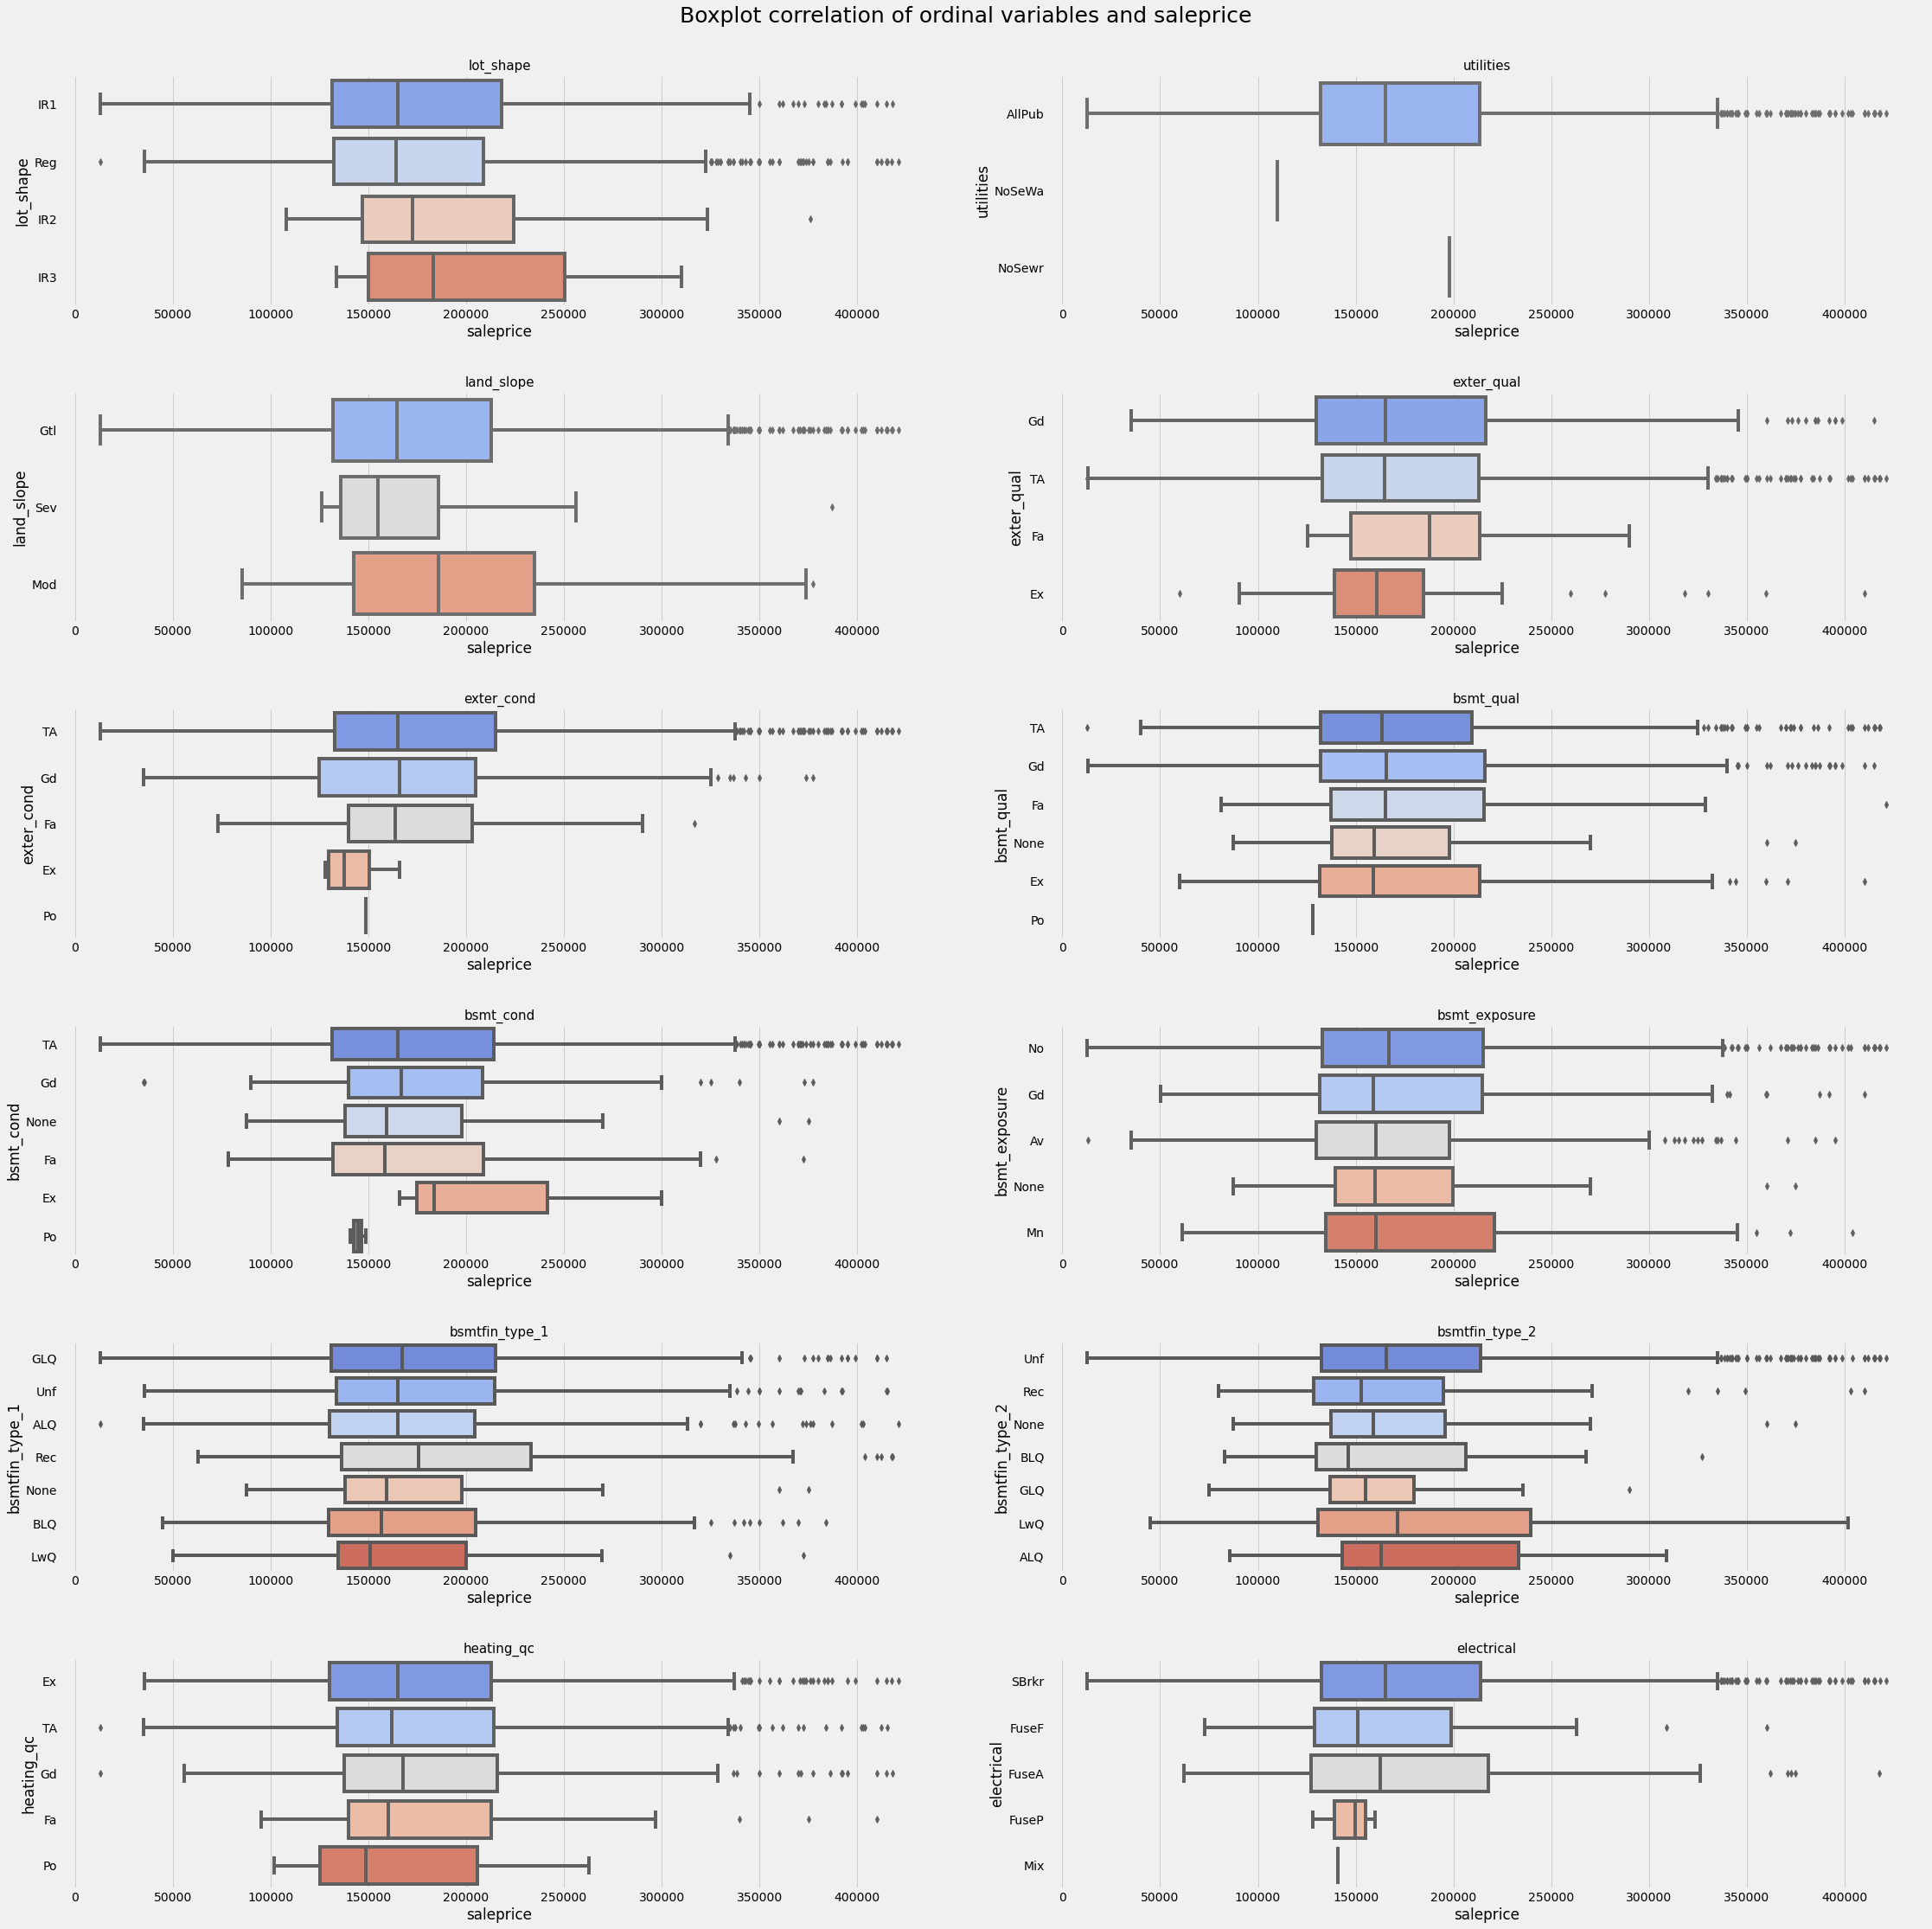

In [998]:
subplot_cat_boxplots(clean_train_df_ord, clean_train_df_ord.columns[:12], clean_train_df_ord.columns[:12], 
                     sup_title='Boxplot correlation of ordinal variables and saleprice')

<Figure size 792x504 with 0 Axes>

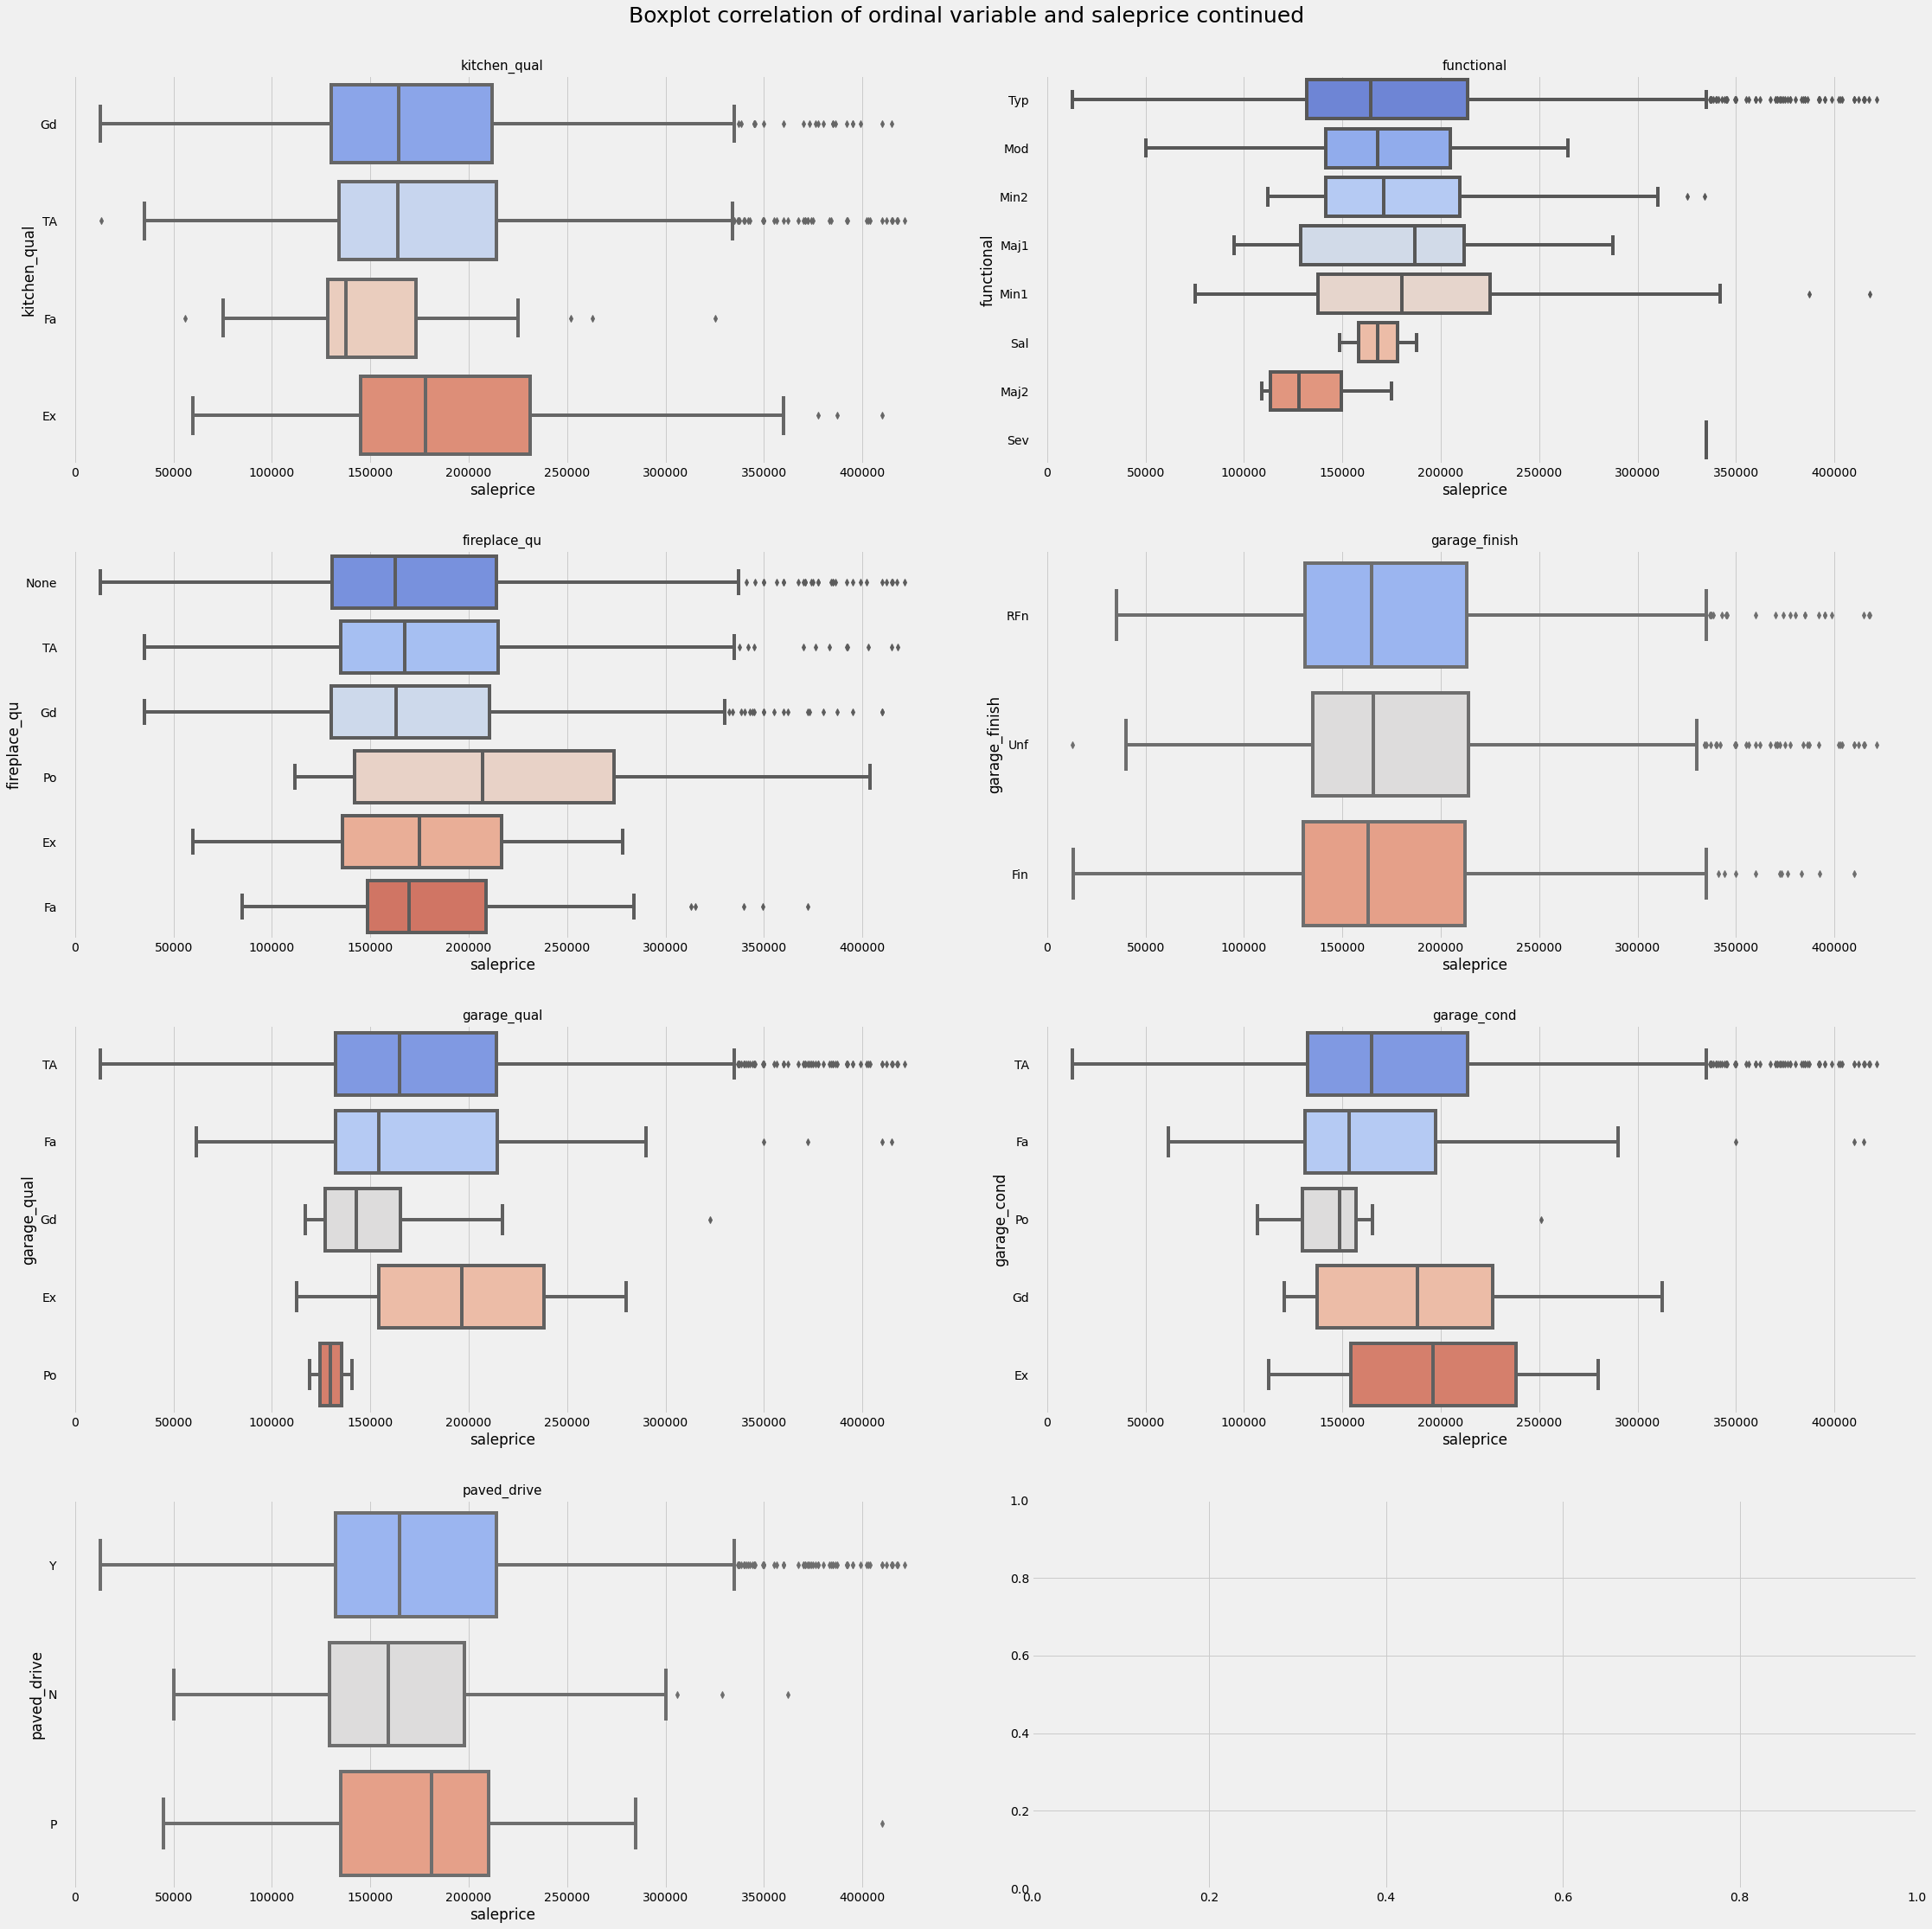

In [999]:
subplot_cat_boxplots(clean_train_df_ord, clean_train_df_ord.columns[12:-1], clean_train_df_ord.columns[12:-1], 
                     sup_title='Boxplot correlation of ordinal variable and saleprice continued')

<AxesSubplot:xlabel='saleprice', ylabel='paved_drive'>

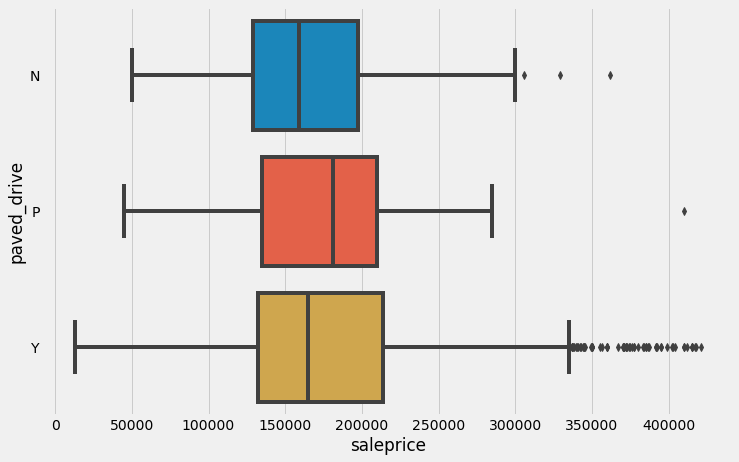

In [1000]:
# Checking using the order 
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='paved_drive', data=clean_train_df_ord, order=['N', 'P', 'Y'])

 Notes on ordinal variable correlation

* lot_shape (More irregular it becomes, the higher the price)
* Utilities: shows no correlation, only AllPub is the dominant rank
* land_slope: no correlation
* exter_qual: the median price tend to decrease as the quality increases (neg)
* exter_cond: not much correlation
* bsmt_qual: not much correlation
* bsmtfin_cond: pos correlation
* bsmt_exposure: not much correlation
* bsmtfin_type_1: No correlation
* bsmtfin_type_2: No correlation
* heating_qc: Median price increase as quality gets better
* electrical: No correlation
* kitchen_qual: pos correlation
* functional: no correlation
* fireplace_qu: No correlation
* garage_finish: No correlation
* garage_qual: Some pos correlation
* garage_cond: strong pos correlation
* paved_drive: No correlation

In [1001]:
# Dropped the poorly correlated features
ord_dropped_features = ['utilities', 'land_slope', 'exter_cond', 'bsmt_qual', 
                        'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'electrical', 'functional', 'fireplace_qu', 'garage_finish', 'paved_drive', 'saleprice']
clean_train_df_ord.drop(ord_dropped_features, axis=1,inplace=True)

In [1002]:
clean_train_df_ord.head()

lot_shape exter_qual bsmt_cond heating_qc kitchen_qual garage_qual  \
0       IR1         Gd        TA         Ex           Gd          TA   
1       IR1         Gd        TA         Ex           Gd          TA   
2       Reg         TA        TA         TA           Gd          TA   
3       Reg         TA        TA         Gd           TA          TA   
4       IR1         TA        Gd         TA           TA          TA   

  garage_cond  
0          TA  
1          TA  
2          TA  
3          TA  
4          TA

In [1003]:
# Perform ordinal encoding for the clean_clean_train_df_ord to check for correlations

# Create the categories in order
lotshape = ['Reg','IR1','IR2','IR3']
exterqual = ['Fa', 'TA', 'Gd', 'Ex']
bsmtcond = ['None','Po','Fa', 'TA', 'Gd', 'Ex']
heatingqc = ['Po','Fa', 'TA', 'Gd', 'Ex']
kitchenqual = ['Fa', 'TA', 'Gd', 'Ex']
garagequal = ['Po','Fa', 'TA', 'Gd', 'Ex']
garagecond = ['Po','Fa', 'TA', 'Gd', 'Ex']



ordinal_encoder = OrdinalEncoder(categories=[
    lotshape,
    exterqual,
    bsmtcond,
    heatingqc,
    kitchenqual,
    garagequal,
    garagecond]) # Fill the categories
# ordinal_encoder.categories_
clean_train_df_ord_encoded = ordinal_encoder.fit_transform(clean_train_df_ord)  # Fit and transform to the ordinal numerics
clean_train_df_ord_encoded = pd.DataFrame(clean_train_df_ord_encoded, columns=clean_train_df_ord.columns.tolist())

Check if the categories remain the same

In [1004]:
clean_train_df_ord['lot_shape'].value_counts()

Reg    1186
IR1     655
IR2      51
IR3       8
Name: lot_shape, dtype: int64

In [1005]:
clean_train_df_ord_encoded['lot_shape'].value_counts()

0.0    1186
1.0     655
2.0      51
3.0       8
Name: lot_shape, dtype: int64

In [1006]:
clean_train_df_ord_encoded.head()

lot_shape  exter_qual  bsmt_cond  heating_qc  kitchen_qual  garage_qual  \
0        1.0         2.0        3.0         4.0           2.0          2.0   
1        1.0         2.0        3.0         4.0           2.0          2.0   
2        0.0         1.0        3.0         2.0           2.0          2.0   
3        0.0         1.0        3.0         3.0           1.0          2.0   
4        1.0         1.0        4.0         2.0           1.0          2.0   

   garage_cond  
0          2.0  
1          2.0  
2          2.0  
3          2.0  
4          2.0

## Checking for multicollinearity of ordinal variables

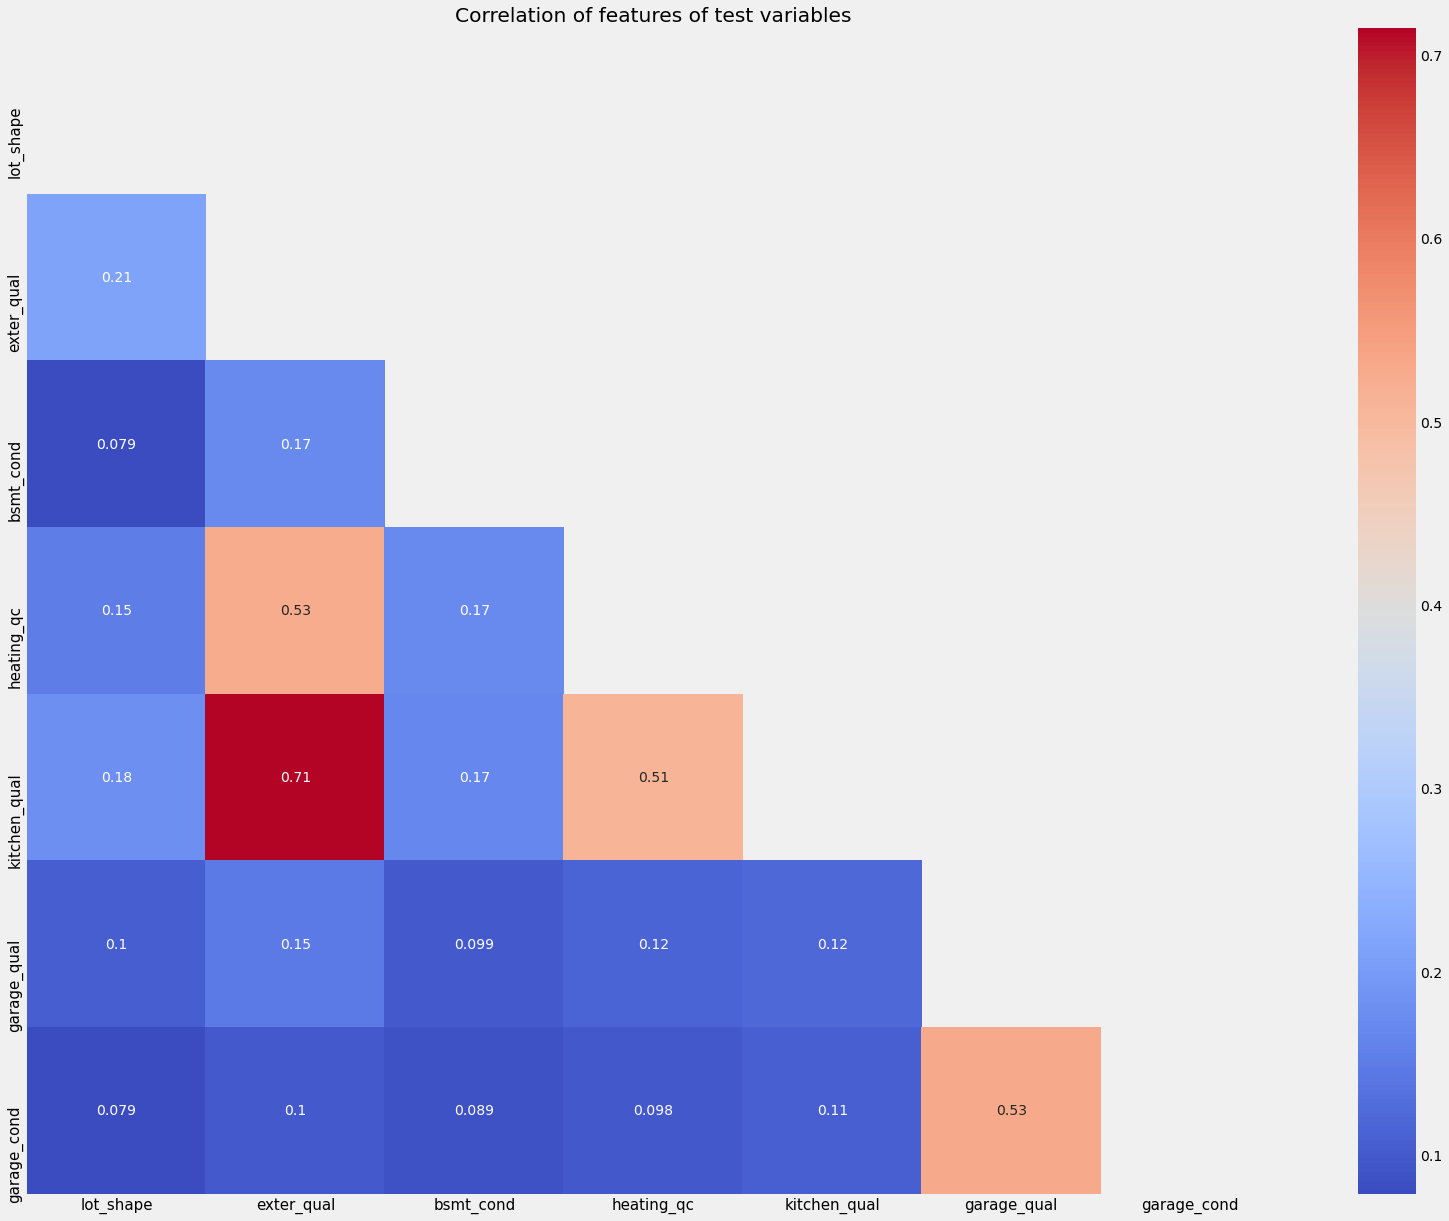

In [1007]:
corr_heatmap(clean_train_df_ord_encoded)

Dropped `kitchen_qual` as it's showing high correlation with `exter_qual`

In [1008]:
clean_train_df_ord_encoded.drop('kitchen_qual', axis=1, inplace=True)

In [1009]:
def subplot_barplots(dataframe, list_of_columns, list_of_titles, xlabel=None, yticklabels=None, palette='coolwarm', sup_title='Barplots', y=0.98):
    plt.figure(figsize=(11, 7))
    # Set titles, labels, etc here for each subplot
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2))
    if len(list_of_columns) >= 2:
        figsize = (25, 90)
    else:
        figsize = (11, 7)
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize)
    ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, y=y, fontsize=25)

    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns):
        # Plot in horizontal manner, with x-axis being the column values
        dataframe[column].value_counts(normalize=True).plot(kind='barh', ax=ax[i])
        # Set titles, labels, etc here for each subplot

        ax[i].set_title(list_of_titles[i], fontsize=20)
        # ax[i].set_xticks(fontsize=200)
        ax[i].set_xlabel('Proportion of the variable')
        #ax[i].set_xticks(ticks=[tick for tick in range(len(list_of_columns))])

        plt.tight_layout(pad=3.0)

## Train_df_nom correlation

In [1010]:
# Obtain the columns for nominal dataframe
nom_columns = add_underscore_char(train_df_nom.columns).values()

In [1011]:
# Obtaining nominal dataframe
clean_train_df_nom = clean_train_df[nom_columns].copy()
clean_train_df_nom

ms_subclass ms_zoning street land_contour lot_config  \
0                2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1                2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2     1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3                2story_1946_&_newer        RL   Pave          Lvl     Inside   
4       11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   
...                              ...       ...    ...          ...        ...   
1895  1story_1946_&_newer_all_styles        RL   Pave          HLS     Inside   
1896             1story_1945_&_older        RL   Pave          Lvl     Inside   
1897    11/2_story_finished_all_ages        RL   Pave          Bnk     Inside   
1898  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Corner   
1899             2story_1946_&_newer        RL   Pave          Lvl     Inside   

     neighborhood condition_1 condition_2 bldg_type house_style roof_style  \
0          Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1         SawyerW        Norm        Norm      1Fam      2Story      Gable   
2           NAmes        Norm        Norm      1Fam      1Story      Gable   
3          Timber        Norm        Norm      1Fam      2Story      Gable   
4         SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   
...           ...         ...         ...       ...         ...        ...   
1895       Timber        Norm        Norm      1Fam      1Story      Gable   
1896      Edwards        Norm        Norm      1Fam      1Story      Gable   
1897      Crawfor        Norm        Norm      1Fam      1.5Fin      Gable   
1898        NAmes        Norm        Norm      1Fam      1Story      Gable   
1899      Gilbert        Norm        Norm      1Fam      2Story      Gable   

     roof_matl exterior_1st exterior_2nd mas_vnr_type foundation heating  \
0      CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1      CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2      CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3      CompShg      VinylSd      VinylSd         None      PConc    GasA   
4      CompShg      Wd Sdng      Plywood         None      PConc    GasA   
...        ...          ...          ...          ...        ...     ...   
1895   CompShg      VinylSd      VinylSd         None      PConc    GasA   
1896   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
1897   CompShg      BrkFace        Stone         None     BrkTil    GasA   
1898   CompShg      Plywood      Plywood         None     CBlock    GasA   
1899   CompShg      VinylSd      VinylSd         None      PConc    GasA   

     central_air garage_type sale_type  
0              Y      Attchd       WD   
1              Y      Attchd       WD   
2              Y      Detchd       WD   
3              Y     BuiltIn       WD   
4              Y      Detchd       WD   
...          ...         ...       ...  
1895           Y      Attchd       WD   
1896           Y      Detchd       WD   
1897           Y      Detchd       WD   
1898           Y      Attchd       WD   
1899           Y      Attchd       WD   

[1900 rows x 20 columns]

In [1012]:
# Add back saleprice to check correlation
clean_train_df_nom['saleprice'] = clean_train_df['saleprice']

In [1013]:
# Mas_vnr_type has 19 null values, will need to replace them with None
clean_train_df_nom.isnull().sum().sort_values(ascending=False)

mas_vnr_type    19
saleprice        0
house_style      0
ms_zoning        0
street           0
land_contour     0
lot_config       0
neighborhood     0
condition_1      0
condition_2      0
bldg_type        0
roof_style       0
sale_type        0
roof_matl        0
exterior_1st     0
exterior_2nd     0
foundation       0
heating          0
central_air      0
garage_type      0
ms_subclass      0
dtype: int64

In [1014]:
# Fill the NaN values with 'None'
clean_train_df_nom.fillna('None',inplace=True)

In [1015]:
# There are no more null values
clean_train_df_nom.isnull().sum().sum()

0

<AxesSubplot:xlabel='saleprice', ylabel='neighborhood'>

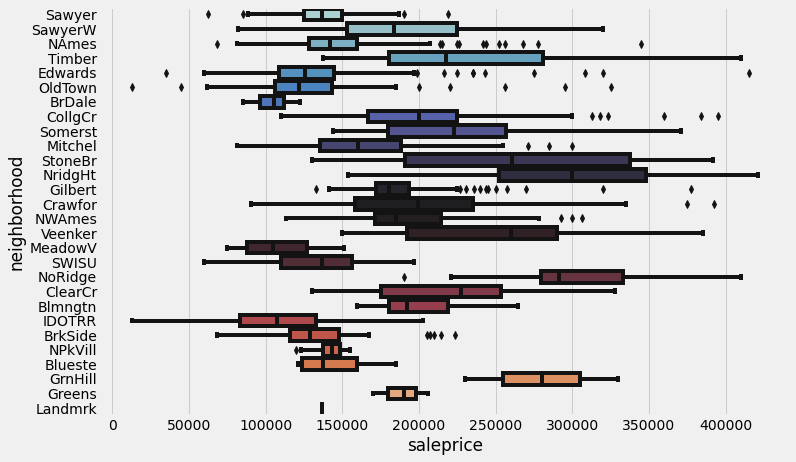

In [1016]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='neighborhood',data=clean_train_df_nom, palette='icefire')
# plt.savefig('../images/Neighborhood')

In [1017]:
clean_train_df_nom['neighborhood'].value_counts(normalize=True).sort_values(ascending=False) * 100

NAmes      15.894737
CollgCr     9.315789
OldTown     7.526316
Somerst     6.789474
Gilbert     6.105263
Edwards     5.789474
NridgHt     5.631579
Sawyer      5.631579
NWAmes      4.578947
SawyerW     4.263158
Mitchel     4.157895
Crawfor     3.736842
BrkSide     3.473684
IDOTRR      2.631579
Timber      2.421053
NoRidge     2.368421
StoneBr     1.473684
SWISU       1.421053
ClearCr     1.368421
Blmngtn     1.157895
BrDale      0.947368
Veenker     0.894737
NPkVill     0.894737
MeadowV     0.894737
Blueste     0.315789
Greens      0.157895
GrnHill     0.105263
Landmrk     0.052632
Name: neighborhood, dtype: float64

As location plays an important role in pricing in houses, I've intend to keep the neighborhoods feature.There are some neighborhoods that make up a small proportion of the entire neighborhoods. This would create additional unwanted features during one-hot encoding. I'll group them up together as `others` to reduce the features. Any values less than 0.057 would be considered low priced neighborhoods.

In [1018]:
replace_with_other = clean_train_df_nom['neighborhood'].value_counts(normalize=True)[
    clean_train_df_nom['neighborhood'].value_counts(normalize=True) <= 0.057].index.tolist()
replace_with_other

['NridgHt',
 'Sawyer',
 'NWAmes',
 'SawyerW',
 'Mitchel',
 'Crawfor',
 'BrkSide',
 'IDOTRR',
 'Timber',
 'NoRidge',
 'StoneBr',
 'SWISU',
 'ClearCr',
 'Blmngtn',
 'BrDale',
 'Veenker',
 'NPkVill',
 'MeadowV',
 'Blueste',
 'Greens',
 'GrnHill',
 'Landmrk']

In [1019]:
# Group the lower priced neighborhood with 'others'
clean_train_df_nom['neighborhood'] = clean_train_df_nom['neighborhood'].map(lambda x:x.replace(x,'Others') if x in replace_with_other else x)

In [1020]:
clean_train_df_nom['neighborhood'].value_counts(normalize=True) * 100

Others     48.578947
NAmes      15.894737
CollgCr     9.315789
OldTown     7.526316
Somerst     6.789474
Gilbert     6.105263
Edwards     5.789474
Name: neighborhood, dtype: float64

Text(0.5, 1.0, 'Neighborhoods and their price range')

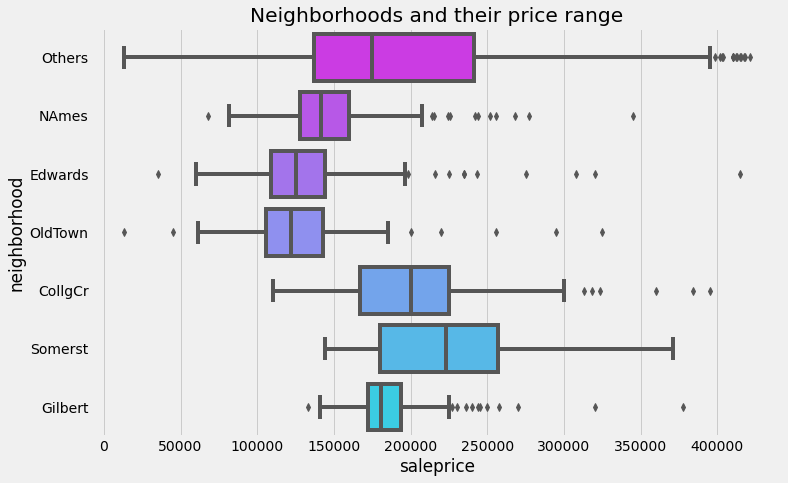

In [1021]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='neighborhood',data=clean_train_df_nom, palette='cool_r')
plt.title('Neighborhoods and their price range')

I've decided to keep `CollgCr`, `Somerst`, `Gilbert` and `Others` as their median price is much higher compared to other neighborhoods.

<Figure size 792x504 with 0 Axes>

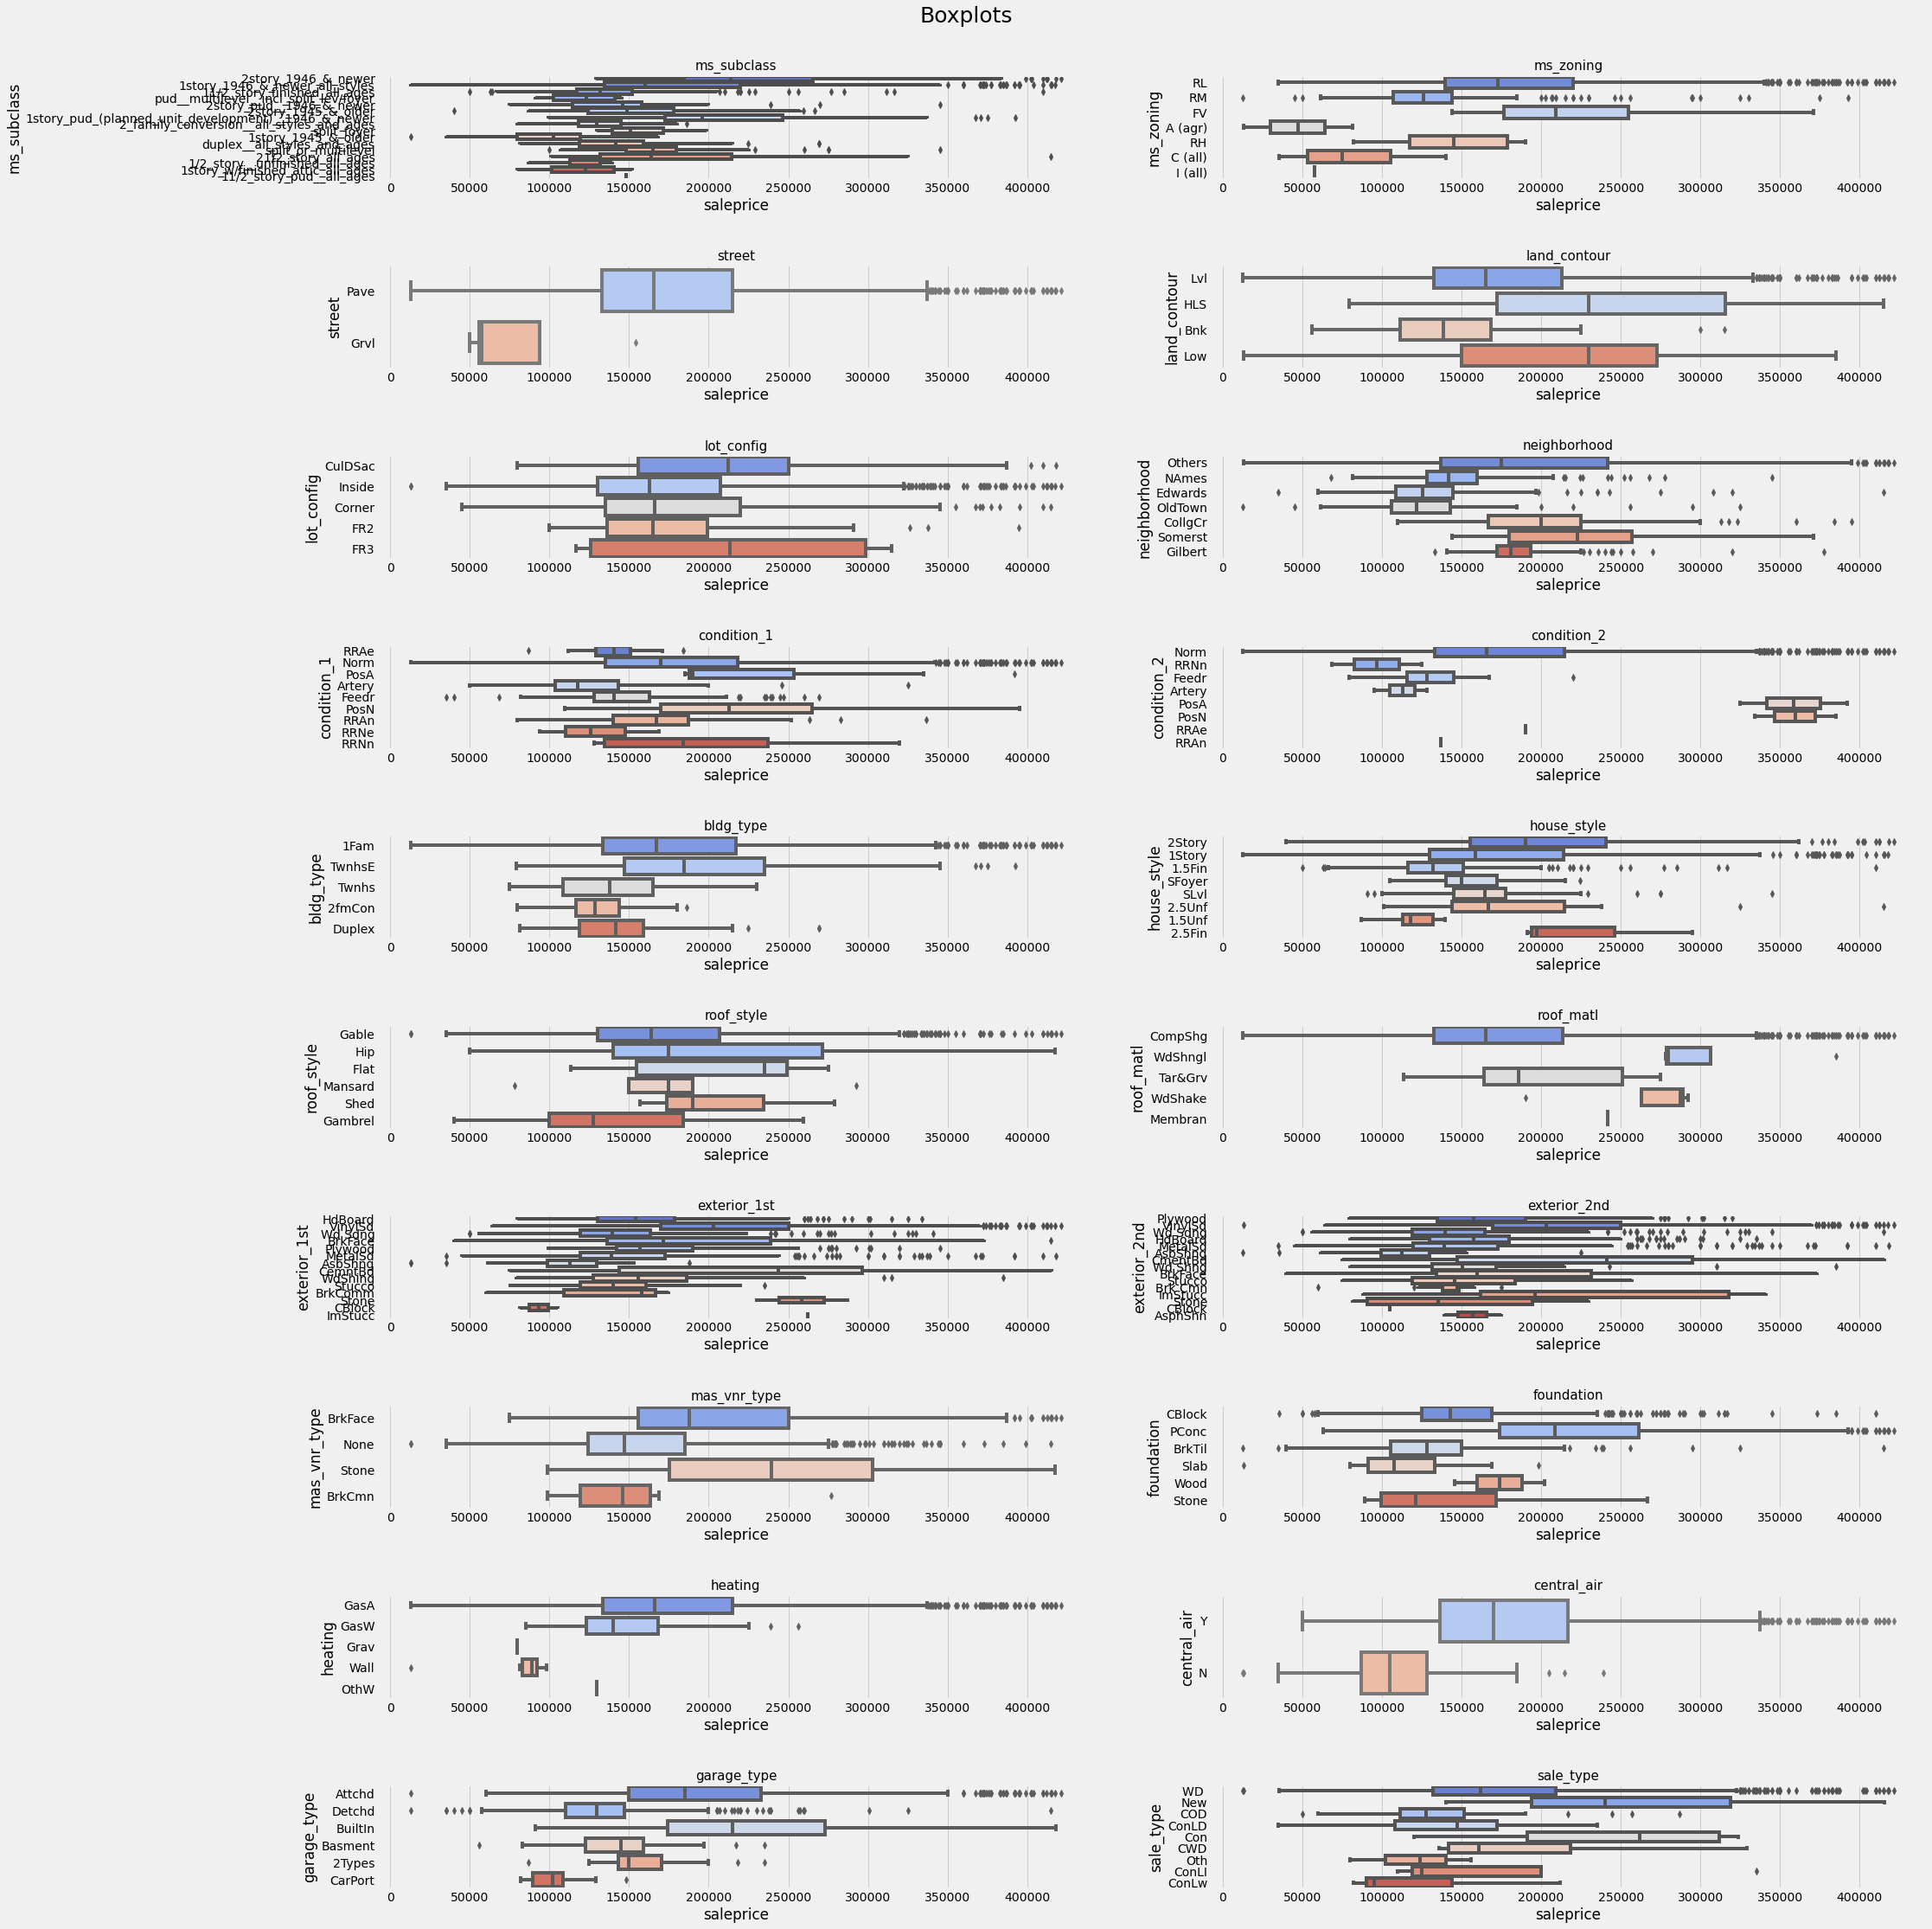

In [1022]:
subplot_cat_boxplots(clean_train_df_nom, clean_train_df_nom.columns[:-1], clean_train_df_nom.columns[:-1])

In [1023]:
proportion_dwelling = pd.DataFrame(data=(clean_train_df_nom['ms_subclass'].value_counts(normalize=True)*100).values, 
             index=clean_train_df_nom['ms_subclass'].value_counts().index, columns=['Proportion of dwelling'])

In [1024]:
proportion_dwelling

Proportion of dwelling
1story_1946_&_newer_all_styles                                   38.210526
2story_1946_&_newer                                              20.000000
11/2_story_finished_all_ages                                      9.631579
1story_pud_(planned_unit_development)__1946_&_n...                6.947368
split_or_multilevel                                               4.526316
2story_pud__1946_&_newer                                          4.368421
2story_1945_&_older                                               4.368421
1story_1945_&_older                                               4.210526
duplex__all_styles_and_ages                                       2.842105
2_family_conversion__all_styles_and_ages                          1.578947
split_foyer                                                       1.473684
21/2_story_all_ages                                               0.684211
1/2_story__unfinished_all_ages                                    0.473684
pud__multilevel__incl_split_lev/foyer                             0.421053
1story_w/finished_attic_all_ages                                  0.210526
11/2_story_pud__all_ages                                          0.052632

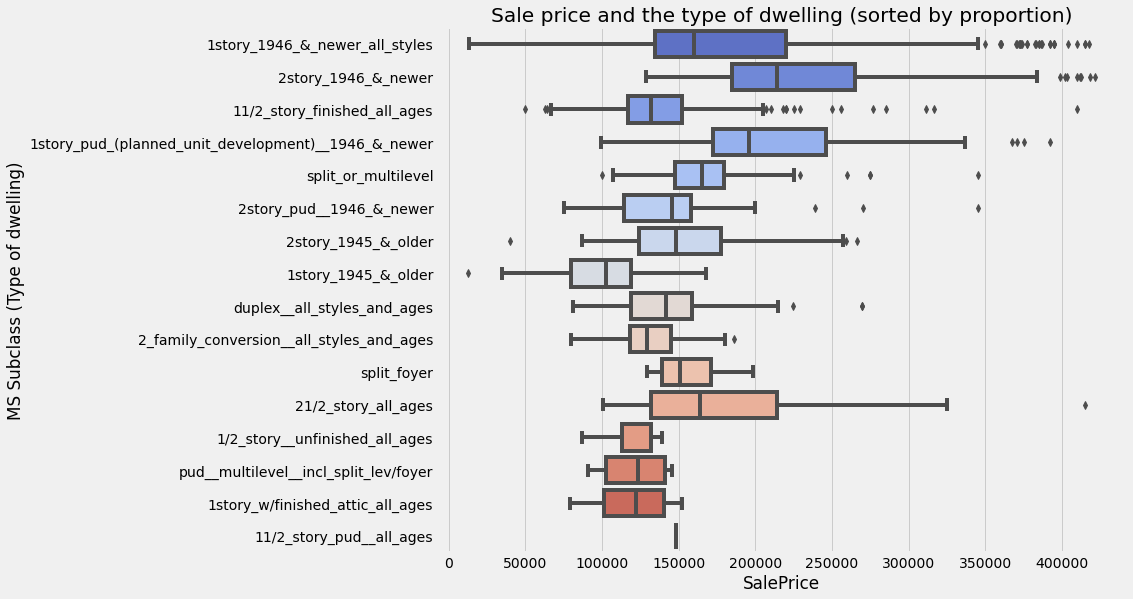

In [1025]:
# ms_subclass
plt.figure(figsize=(11,9))
sns.boxplot(x='saleprice',y='ms_subclass',data=clean_train_df_nom, palette='coolwarm', order=proportion_dwelling.index)

plt.title('Sale price and the type of dwelling (sorted by proportion)')
plt.xlabel('SalePrice')
plt.ylabel('MS Subclass (Type of dwelling)');

Generally, 1story and 2story 1946 housing have higher median pricing compared to 11/2 and 1945 housing story. I'll group the lower proportion of housing, any housing as less than 5, as `Others` to clean up the features

In [1026]:
dwelling_less_than_5 = clean_train_df_nom['ms_subclass'].value_counts(normalize=True)[clean_train_df_nom['ms_subclass'].value_counts(normalize=True) < 0.05].index

In [1027]:
clean_train_df_nom['ms_subclass'] = clean_train_df_nom['ms_subclass'].map(lambda x:x.replace(x,'Others') if x in dwelling_less_than_5 else x)

In [1028]:
dwelling_cleaned_prop = (clean_train_df_nom['ms_subclass'].value_counts(normalize=True) *100).index

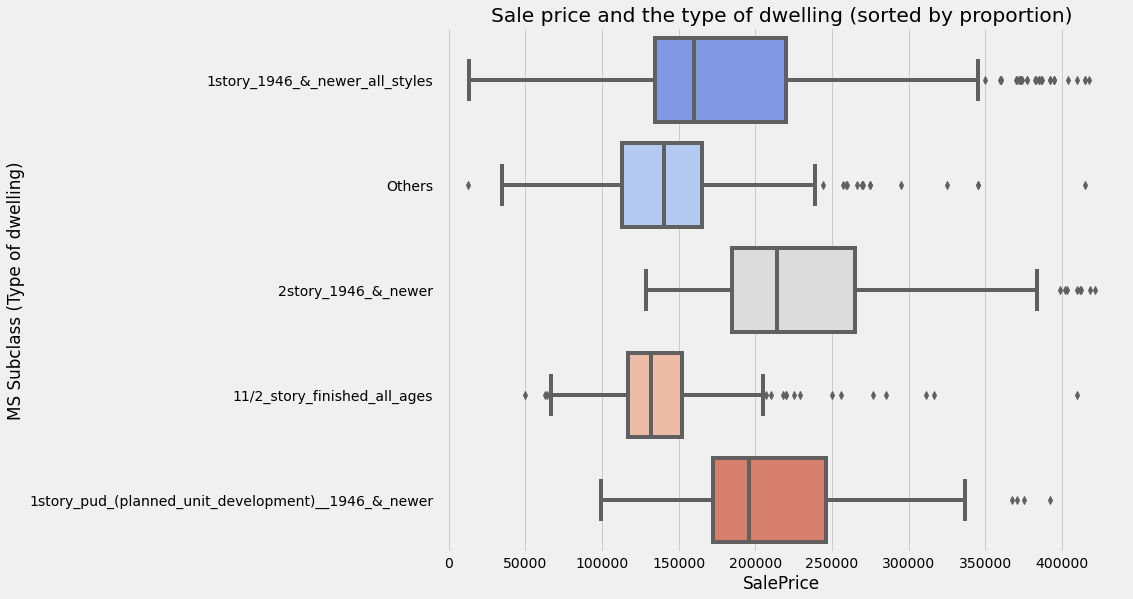

In [1029]:
# ms_subclass
plt.figure(figsize=(11,9))
sns.boxplot(x='saleprice',y='ms_subclass',data=clean_train_df_nom, palette='coolwarm', order=dwelling_cleaned_prop)

plt.title('Sale price and the type of dwelling (sorted by proportion)')
plt.xlabel('SalePrice')
plt.ylabel('MS Subclass (Type of dwelling)');

I've decided to keep `ms_subclass` as it's showing that 1946 housing is generally has a median price higher compared to 1945 housing.

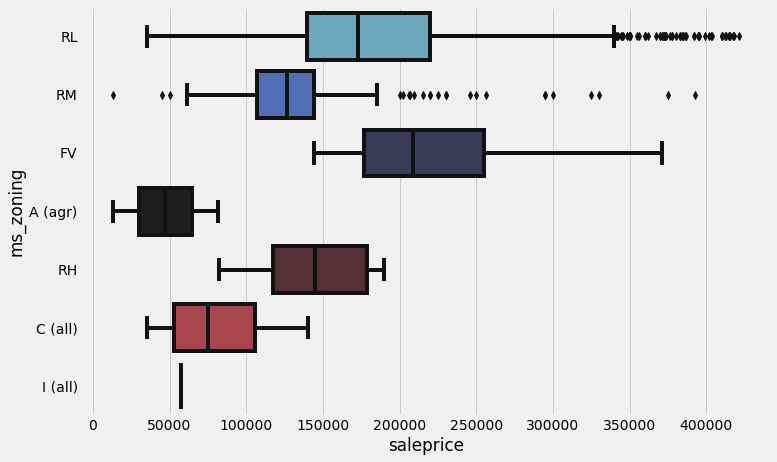

In [1030]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='ms_zoning',data=clean_train_df_nom, palette='icefire');

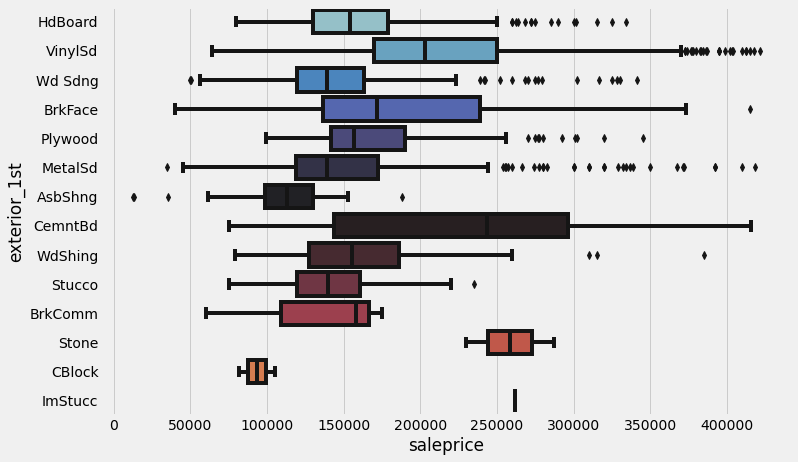

In [1031]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='exterior_1st',data=clean_train_df_nom, palette='icefire');

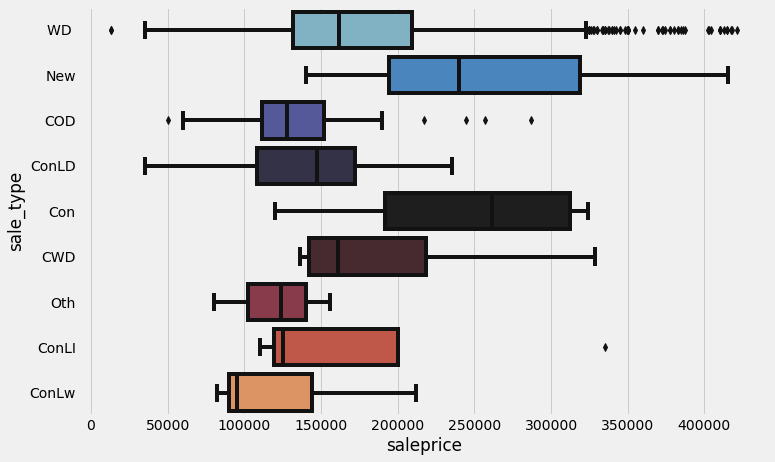

In [1032]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='sale_type',data=clean_train_df_nom, palette='icefire');

The following features I would keep/drop for nominal variables:

`ms_subclass`: Keep `ms_subclass` as it's showing that 1946 housing is generally has a median price higher compared to 1945 housing.

`ms_zoning`: `A`, `FV`, `RH`, `C` would be the features to keep for ms_zoning as they have few outliers in them, and they also seem more consistent compared to other features.

`street`: I would keep all the features of `Street` as they're only 2 features in them.

`land_contour`: I would keep `HLS`, `BNK` and `Low` as they've little outliers

`lot_config`: As `lot_frontage` is kept in the numeric dataframe and `lot_shape` in encoded dataframe, I'll drop `lot_config` as it may introduce biasness in the model given the Multicollinearity. **(Drop)**

`neighborhood`: I've decided to keep `CollgCr`, `Somerst`, `Gilbert` and `Others` as their median price is much higher compared to other neighborhoods.

`condition_1` and `condition_2`: As they seem spread apart, I'll drop them **(Drop)**

`bldg_type`: Drop only `1Fam` as it contains a lot of outliers.

`house_style`: Drop as the variance between it high **(Drop)**

`roof_style`: Drop only `Gable` as it contains a lot of outliers.

`roof_matl`: Drop as the variance between it high **(Drop)**

`exterior_1st` and `exterior_2nd`: Drop both as the variance between it high. **(Drop)**

`mas_vnr_type`: Drop `None` as it has a lots of outliers

`foundation`: Drop as most median prices are low **(Drop)**

`heating`: Drop as `GasA` is the dominant feature and the spread is too high **(Drop)**

`central_air`: Keep both as there only 2 features

`garage_type`: Drop as `garage_qual` and `garage_area` are in the other 2 dataframes and would cause Multicollinearity between the features. **(Drop)**

`sale_type`: Would only drop `WD` as it contains the most outliers.

In [1033]:
# Drop lot_config, condition_1 and condition_2, house_style, roof_matl, exterior_1st and exterior_2nd, foundation, heating, garage_type, saleprice
clean_train_df_nom.drop(['lot_config', 'condition_1', 'condition_2', 
                         'house_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'foundation', 'heating', 'saleprice'], axis=1, inplace=True)

In [1034]:
clean_train_df_nom_dummies = pd.get_dummies(clean_train_df_nom)

In [1035]:
# Search for dummies
clean_train_df_nom_dummies.columns[clean_train_df_nom_dummies.columns.str.contains('sale_type')]

Index(['sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_WD '],
      dtype='object')

In [1036]:
# Drop the dummy columns
drop_dummies = [
    'ms_zoning_I (all)',
    'ms_zoning_RL',
    'ms_zoning_RM',
    'land_contour_Lvl',
    'neighborhood_Edwards',
    'neighborhood_NAmes',
    'neighborhood_OldTown',
    'neighborhood_Somerst',
    'bldg_type_1Fam',
    'roof_style_Gable',
    'mas_vnr_type_None',
    'sale_type_WD '
]
clean_train_df_nom_dummies.drop(drop_dummies, axis=1, inplace=True)

In [1037]:
clean_train_df_nom_dummies.shape

(1900, 45)

In [1038]:
num_cols = ['lot_frontage',
            'year_remod/add',
            'mas_vnr_area',
            'bsmtfin_sf_1',
            'total_bsmt_sf',
            '1st_flr_sf',
            'gr_liv_area',
            'bsmt_full_bath',
            'full_bath',
            'totrms_abvgrd',
            'fireplaces',
            'garage_area',
            'wood_deck_sf',
            'open_porch_sf',
           'house_age']
clean_train_df_num = clean_train_df[num_cols].copy()
clean_train_df_num.shape

(1900, 15)

In [1039]:
clean_train_df_ord_encoded.shape

(1900, 6)

# Merge Dataframes

Join the train_df_num, train_df_cat_nom, train_df_cat_ord dataframes and assigned this to final_train_df.

In [1040]:
# Check for nul values
clean_train_df_nom_dummies.isnull().sum().sum()

0

In [1041]:
# Merge the dataframes
final_train_df = pd.concat([clean_train_df_num, clean_train_df_nom_dummies, clean_train_df_ord_encoded], axis=1)
final_train_df

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0            69.06            2005         289.0         533.0          725.0   
1            43.00            1997         132.0         637.0          913.0   
2            68.00            2007           0.0         731.0         1057.0   
3            73.00            2007           0.0           0.0          384.0   
4            82.00            1993           0.0           0.0          676.0   
...            ...             ...           ...           ...            ...   
1895         79.00            2007           0.0        1011.0         1884.0   
1896         69.06            1950           0.0         262.0          861.0   
1897         57.00            1950           0.0           0.0          896.0   
1898         80.00            1956           0.0         155.0         1200.0   
1899         60.00            1999           0.0           0.0          994.0   

      1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0          725.0       1479.0               0          2              6   
1          913.0       2122.0               1          2              8   
2         1057.0       1057.0               1          1              5   
3          744.0       1444.0               0          2              7   
4          831.0       1445.0               0          2              6   
...          ...          ...             ...        ...            ...   
1895      1728.0       1728.0               1          2              7   
1896       861.0        861.0               0          1              4   
1897      1172.0       1913.0               0          1              9   
1898      1200.0       1200.0               1          1              6   
1899      1028.0       1804.0               0          2              7   

      fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0              0        475.0           0.0           44.0         34   
1              1        559.0           0.0           74.0         13   
2              0        246.0           0.0           52.0         57   
3              0        400.0         100.0            0.0          4   
4              0        484.0           0.0           59.0        110   
...          ...          ...           ...            ...        ...   
1895           1        520.0           0.0          276.0          1   
1896           0        539.0         158.0            0.0         69   
1897           1        342.0           0.0            0.0         81   
1898           2        294.0           0.0          189.0         53   
1899           1        442.0         140.0           60.0         11   

      ms_subclass_11/2_story_finished_all_ages  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            1   
...                                        ...   
1895                                         0   
1896                                         0   
1897                                         1   
1898                                         0   
1899                                         0   

      ms_subclass_1story_1946_&_newer_all_styles  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
...                                          ...   
1895                                           1   
1896                                           0   
1897                                           0   
1898                                           1   
1899                                           0   

      ms_subclass_1story_pud_

In [1042]:
# Checking for null values
final_train_df.isnull().sum().sum()

0

In [1043]:
# Checking if there are any SalePrice in the column
final_train_df.columns.str.contains('saleprice').sum()

0

In [1044]:
# No duplicated columns
final_train_df.columns.duplicated().sum()

0

In [1045]:
final_train_df.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0         69.06            2005         289.0         533.0          725.0   
1         43.00            1997         132.0         637.0          913.0   
2         68.00            2007           0.0         731.0         1057.0   
3         73.00            2007           0.0           0.0          384.0   
4         82.00            1993           0.0           0.0          676.0   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0       725.0       1479.0               0          2              6   
1       913.0       2122.0               1          2              8   
2      1057.0       1057.0               1          1              5   
3       744.0       1444.0               0          2              7   
4       831.0       1445.0               0          2              6   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0           0        475.0           0.0           44.0         34   
1           1        559.0           0.0           74.0         13   
2           0        246.0           0.0           52.0         57   
3           0        400.0         100.0            0.0          4   
4           0        484.0           0.0           59.0        110   

   ms_subclass_11/2_story_finished_all_ages  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   ms_subclass_2story_1946_&_newer  ms_subclass_Others  ms_zoning_A (agr)  \
0                                1                   0                  0   
1                                1                   0                  0   
2                                0                   0                  0   
3                                1                   0                  0   
4                                0                   0                  0   

   ms_zoning_C (all)  ms_zoning_FV  ms_zoning_RH  street_Grvl  street_Pave  \
0                  0             0             0            0            1   
1                  0             0             0            0            1   
2                  0             0             0            0            1   
3                  0             0             0            0            1   
4                  0             0             0            0            1   

   land_contour_Bnk  land_contour_HLS  land_contour_Low  neighborhood_CollgCr  \
0                 0                 0                 0                     0   
1                 0                 0                 0                     0   
2                 0                 0                 0                     0   
3                 0                 0                 0                     0   
4                 0                 0                 0                     0   

   neighborhood_Gilbert  neighborhood_Others  bldg_type_2fmCon  \
0                     0                    1                 0   
1                     0                    1                 0   
2                     0                    0                 0  

In [1046]:
# Save the final cleaned data frame to csv format
final_train_df.to_csv('../datasets/final_train_df.csv', index=False)

# Preprocessing  

In [1049]:
# Standardize the values for final_train_df

scaler = StandardScaler()
final_train_df_scaled = scaler.fit_transform(final_train_df)
final_train_df_scaled= pd.DataFrame(final_train_df_scaled, columns=final_train_df.columns.tolist())
final_train_df_scaled.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0      0.001802        0.988464      1.182322      0.221705      -0.815709   
1     -1.278750        0.603058      0.217990      0.466349      -0.347349   
2     -0.050285        1.084815     -0.592785      0.687469       0.011396   
3      0.195408        1.084815     -0.592785     -1.032095      -1.665235   
4      0.637656        0.410356     -0.592785     -1.032095      -0.937782   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0   -1.216694    -0.028346       -0.832282   0.784675      -0.272616   
1   -0.688058     1.380314        1.115176   0.784675       1.106797   
2   -0.283145    -0.952848        1.115176  -1.067353      -0.962322   
3   -1.163268    -0.105023       -0.832282   0.784675       0.417091   
4   -0.918633    -0.102832       -0.832282   0.784675      -0.272616   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0   -0.957710    -0.106762     -0.742619      -0.045782  -0.029868   
1    0.621846     0.358536     -0.742619       0.420965  -0.750385   
2   -0.957710    -1.375252     -0.742619       0.078684   0.759269   
3   -0.957710    -0.522206      0.037598      -0.730344  -1.059178   
4   -0.957710    -0.056909     -0.742619       0.187591   2.577716   

   ms_subclass_11/2_story_finished_all_ages  \
0                                 -0.326468   
1                                 -0.326468   
2                                 -0.326468   
3                                 -0.326468   
4                                  3.063089   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                   -0.786383   
1                                   -0.786383   
2                                    1.271645   
3                                   -0.786383   
4                                   -0.786383   

   ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                          -0.273241                 
1                                          -0.273241                 
2                                          -0.273241                 
3                                          -0.273241                 
4                                          -0.273241                 

   ms_subclass_2story_1946_&_newer  ms_subclass_Others  ms_zoning_A (agr)  \
0                              2.0           -0.580592          -0.032461   
1                              2.0           -0.580592          -0.032461   
2                             -0.5           -0.580592          -0.032461   
3                              2.0           -0.580592          -0.032461   
4                             -0.5           -0.580592          -0.032461   

   ms_zoning_C (all)  ms_zoning_FV  ms_zoning_RH  street_Grvl  street_Pave  \
0           -0.07631     -0.236944      -0.07631    -0.051367     0.051367   
1           -0.07631     -0.236944      -0.07631    -0.051367     0.051367   
2           -0.07631     -0.236944      -0.07631    -0.051367     0.051367   
3           -0.07631     -0.236944      -0.07631    -0.051367     0.051367   
4           -0.07631     -0.236944      -0.07631    -0.051367     0.051367   

   land_contour_Bnk  land_contour_HLS  land_contour_Low  neighborhood_CollgCr  \
0          -0.19558         -0.198462         -0.144764             -0.320512   
1          -0.19558         -0.198462         -0.144764             -0.320512   
2          -0.19558         -0.198462         -0.144764             -0.320512   
3          -0.19558         -0.198462         -0.144764             -0.320512   
4          -0.19558         -0.198462         -0.144764             -0.320512   

   neighborhood_Gilbert  neighborhood_Others  bldg_type_2fmCon  \
0             -0.254995             1.028837          -0.12666   
1             -0.254995             1.028837          -0.12666   
2             -0.254995            -0.971972          -0.12666  

In [1050]:
# Save the final cleaned data frame to csv format
final_train_df_scaled.to_csv('../datasets/final_train_df_scaled.csv', index=False)

# Model Benchmarks

In [1051]:
final_train_df_scaled = pd.read_csv('../datasets/final_train_df_scaled.csv')
final_train_df_scaled

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0         0.001802        0.988464      1.182322      0.221705      -0.815709   
1        -1.278750        0.603058      0.217990      0.466349      -0.347349   
2        -0.050285        1.084815     -0.592785      0.687469       0.011396   
3         0.195408        1.084815     -0.592785     -1.032095      -1.665235   
4         0.637656        0.410356     -0.592785     -1.032095      -0.937782   
...            ...             ...           ...           ...            ...   
1895      0.490240        1.084815     -0.592785      1.346125       2.071683   
1896      0.001802       -1.661200     -0.592785     -0.415781      -0.476895   
1897     -0.590809       -1.661200     -0.592785     -1.032095      -0.389700   
1898      0.539378       -1.372146     -0.592785     -0.667481       0.367649   
1899     -0.443394        0.699410     -0.592785     -1.032095      -0.145555   

      1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0      -1.216694    -0.028346       -0.832282   0.784675      -0.272616   
1      -0.688058     1.380314        1.115176   0.784675       1.106797   
2      -0.283145    -0.952848        1.115176  -1.067353      -0.962322   
3      -1.163268    -0.105023       -0.832282   0.784675       0.417091   
4      -0.918633    -0.102832       -0.832282   0.784675      -0.272616   
...          ...          ...             ...        ...            ...   
1895    1.603638     0.517153        1.115176   0.784675       0.417091   
1896   -0.834276    -1.382237       -0.832282  -1.067353      -1.652028   
1897    0.040223     0.922444       -0.832282  -1.067353       1.796503   
1898    0.118957    -0.639569        1.115176  -1.067353      -0.272616   
1899   -0.364690     0.683651       -0.832282   0.784675       0.417091   

      fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0      -0.957710    -0.106762     -0.742619      -0.045782  -0.029868   
1       0.621846     0.358536     -0.742619       0.420965  -0.750385   
2      -0.957710    -1.375252     -0.742619       0.078684   0.759269   
3      -0.957710    -0.522206      0.037598      -0.730344  -1.059178   
4      -0.957710    -0.056909     -0.742619       0.187591   2.577716   
...          ...          ...           ...            ...        ...   
1895    0.621846     0.142505     -0.742619       3.563726  -1.162109   
1896   -0.957710     0.247751      0.490124      -0.730344   1.170993   
1897    0.621846    -0.843483     -0.742619      -0.730344   1.582717   
1898    2.201402    -1.109368     -0.742619       2.210160   0.622028   
1899    0.621846    -0.289557      0.349685       0.203149  -0.819005   

      ms_subclass_11/2_story_finished_all_ages  \
0                                    -0.326468   
1                                    -0.326468   
2                                    -0.326468   
3                                    -0.326468   
4                                     3.063089   
...                                        ...   
1895                                 -0.326468   
1896                                 -0.326468   
1897                                  3.063089   
1898                                 -0.326468   
1899                                 -0.326468   

      ms_subclass_1story_1946_&_newer_all_styles  \
0                                      -0.786383   
1                                      -0.786383   
2                                       1.271645   
3                                      -0.786383   
4                                      -0.786383   
...                                          ...   
1895                                    1.271645   
1896                                   -0.786383   
1897                                   -0.786383   
1898                                    1.271645   
1899                                   -0.786383   

      ms_subclass_1story_pud_

## Linear Regression model

In [207]:
def r2_adj(y_true, y_preds, p):
    """
    Function to calculate the r2 adjusted scores.
    y_true = actual observations
    y_preds = predicted prices by the model
    p = number of indepedent regressors
    """
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [208]:
import sklearn.metrics as metrics

def model_metrics(y_true, y_pred, p):
    """
    Metrics to calculate the mean squared error, root mean squared error, R^2 score, and adjusted R^2 score
    """
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [209]:
def cross_val_display_scores(scores):
    """
    Function to display the scores, the mean of the scores and the standard deviation of the scores
    """
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [210]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = final_train_df_scaled
y = np.exp(clean_train_df['saleprice']) # Revert back to original saleprice

In [211]:
# Split the training set into train and test sets to train on train sets before evaluating on the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [212]:
# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [213]:
# Coefficients of the model, these numbers represents how much sale price increases by one unit of the respective feature 
lr.coef_

array([ 3.63999925e+03,  7.08165350e+03,  6.75404689e+03,  7.96418049e+03,
        1.00697312e+04,  1.69841888e+03,  2.58299208e+04,  1.21199361e+03,
       -1.67029397e+03, -2.05827154e+03,  3.67982473e+03,  7.40210933e+03,
        2.48064465e+03,  8.64642289e+02, -1.60695052e+15, -2.64663573e+15,
       -1.38490476e+15, -2.17873999e+15, -2.36513867e+15, -1.04390374e+03,
       -2.39072142e+03,  3.06530620e+03, -4.09736178e+02, -3.69483391e+13,
       -3.69483391e+13,  4.96736041e+02,  3.73121584e+03,  5.20027318e+02,
        5.59414213e+02,  9.43355745e+02,  4.14992463e+03, -1.86241515e+03,
       -3.32779458e+03, -2.34287090e+03, -2.87002086e+03,  8.10779675e+02,
        7.63080808e+02,  1.92661366e+03, -2.05829510e+03,  8.62955467e+02,
       -2.70484883e+03, -3.09397235e+03,  6.86936346e+02, -4.36612678e+14,
       -4.36612678e+14,  1.40371076e+15,  6.82896124e+15,  1.66977210e+15,
        3.45821686e+15,  1.07033260e+15,  6.33803002e+15, -2.46507324e+03,
        1.45256526e+03,  

In [214]:
# The line of best fit cutting the y-axis. Represents the sale price when there are no features.
lr.intercept_

180824.43421600878

In [215]:
# Predicted sale price values of X_test
y_pred = lr.predict(X_test)

In [216]:
# Calculate the metrics of the model
model_metrics(y_test, y_pred, X.shape[1])

Mean squared error      =  762809064.2478575
Root mean squared error =  27618.998248449516
R^2                     =  0.8564589994953776
Adjusted R^2            =  0.8336468600508777


In [217]:
# Baseline model score
baseline_score = np.mean(y)
baseline_score

180722.01684210525

The goal of both the mean squared error and root mean squared error is to get it as close as possible to 0. The mean squared error calculates the average squared distance between the predicted and acutal values while root mean squared error is the square root of mean squared error and it scales to the original units of y. Both punishes outliers heavily. The standard deviation represents how far apart the scores between each other.

The R^2 score shows how well the data points fit a curve or line.It explains how much of the variability in the target variable is explained by the independent variable, X. A score of close to 1 means most of the data points are able to fit the line of best fit while 0 means none of the variability is around the mean. The adjusted R^2 score adjusts for the numbers of independent variables in the model.

Comparing against the `baseline_score` of 180,722.02 and `root_mean_squared_error` (RMSE) of 27,619.00, I can see that the RMSE is well below the baseline score and this shows the model is performing well as the error rate is lower. The R^2 and adjusted R^2 have a score of 0.86 and 0.83 which is also good as the around 85% of the y-variable is explained by the x-variable.

I'll do the cross validation next to see if the model is overfitting the training set.

### Cross validation across 5 different models.

In [218]:
# mse and rmse scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_lin_scores = -scores
rmse_lin_scores = np.sqrt(-scores)

In [219]:
# R2 scores
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
r2_scores = scores

In [220]:
# Mean cross validated scores of mse
cross_val_display_scores(mse_lin_scores)

Scores:  [6.24063993e+08 7.20369778e+08 6.35256390e+08 5.43655409e+08
 6.04033027e+08]
Mean:  625475719.414458
Standard deviation:  57020854.22650031


In [221]:
# Mean cross validated scores of rmse
cross_val_display_scores(rmse_lin_scores)

Scores:  [24981.27284594 26839.70525271 25204.29308248 23316.41930236
 24577.08337345]
Mean:  24983.754771388434
Standard deviation:  1134.7761618856223


In [222]:
# Mean cross validated scores of r^2
cross_val_display_scores(r2_scores)

Scores:  [0.88289632 0.82707199 0.85267291 0.85795204 0.86783968]
Mean:  0.857686588707096
Standard deviation:  0.018444927180333897


## Linear Regression score table

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|Linear Regression model|762809064.24|625475719.41|27618.99|24983.75|0.86|0.86|0.83|


The mean cross validation scores for mean squared error (MSE) is 625475719.414458.

The mean cross validation scores for Root mean squared error (RMSE) is 24983.754771388434.

The mean cross validation scores for R^2 score is 0.8576865.

There is a decrease in the MSE, a slight decrease in the RMSE and the R^2 score remains the same. This means the model is not overfitting on training set and performs well on unseen data.

The next few models will introduce regularization to prevent the model from overfitting by imposing a "penalty" on the coefficients of the model. This is also used to reduce the multicollinearity between the predictors in the model. I'll be using Ridge Regression, Lasso Regression and ElasticNet Regression (A combination of Ridge and Lasso regression).

## Ridge Regression model

In [669]:
# Create the Ridge model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=5)

In [670]:
# Predicted sale price values of X_test using ridge regression
y_pred_ridge = ridge_reg.predict(X_test)

In [671]:
# Calculate the metrics of the model
model_metrics(y_test, y_pred_ridge, X.shape[1])

Mean squared error      =  761368210.5054309
Root mean squared error =  27592.901451377507
R^2                     =  0.8567301310241733
Adjusted R^2            =  0.8347690562176597


There does not seem to much difference in metrics compared to the Linear Regression. 

### Cross validation across 5 different models for RidgeRegression

In [672]:
# mse and rmse scores
ridge_mse_scores = -cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(ridge_mse_scores)

In [673]:
# R2 scores
scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='r2')
ridge_r2_scores = scores

In [674]:
# Mean cross validated scores of mse
cross_val_display_scores(ridge_mse_scores)

Scores:  [6.20369156e+08 7.12135961e+08 6.35547322e+08 5.45728882e+08
 6.13262108e+08]
Mean:  625408686.0203776
Standard deviation:  53190637.42843268


In [675]:
# Mean cross validated scores of rmse
cross_val_display_scores(ridge_rmse_scores)

Scores:  [24907.21093131 26685.87568666 25210.06390628 23360.84078458
 24764.12946662]
Mean:  24985.624155092053
Standard deviation:  1061.7304746771415


In [676]:
# Mean cross validated scores of r^2
cross_val_display_scores(ridge_r2_scores)

Scores:  [0.88358965 0.82904856 0.85260544 0.85741028 0.86582038]
Mean:  0.8576948612860745
Standard deviation:  0.017794144666977377


## Ridge Regression and Linear Regression score table

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|Ridge Regression model|761,368,210.50|625,408,686.02|27,592.90|24,985.62|0.86|0.86|0.83|
|Linear Regression model|762,809,064.24|625,475,719.41|27,618.99|24,983.75|0.86|0.86|0.83|

The Ridge Regression model yielded slightly better scores than Linear Regression model. The `alpha` hyperparameter can be changed later in the model tunning to see if it improves the scores.

## Lasso Regression model

In [677]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=5,max_iter=10000)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=5, max_iter=10000)

In [678]:
# Predicted sale price values of X_test using ridge regression
y_pred_lasso = lasso_reg.predict(X_test)

In [679]:
# Calculate the metrics of the model
model_metrics(y_test, y_pred_lasso, X.shape[1])

Mean squared error      =  762332744.3832375
Root mean squared error =  27610.373854463425
R^2                     =  0.8565486306142673
Adjusted R^2            =  0.8345597345770384


The model seems to perform almost similar to Ridge Regression and Linear Regression model.

### Cross validation across 5 different models for Lasso Regression

In [682]:
# mse and rmse scores
lasso_reg = Lasso(alpha=5,max_iter=10000)
scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_mse_scores = -scores
lasso_rmse_scores = np.sqrt(-scores)

In [683]:
# R2 scores
lasso_r2_scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='r2')

In [684]:
# Mean cross validated scores of mse
cross_val_display_scores(lasso_mse_scores)

Scores:  [6.20591400e+08 7.14022296e+08 6.35374925e+08 5.47085742e+08
 6.10990621e+08]
Mean:  625612996.7818314
Standard deviation:  53510857.78217278


In [685]:
# Mean cross validated scores of rmse
cross_val_display_scores(lasso_rmse_scores)

Scores:  [24911.67195857 26721.19563372 25206.64446252 23389.86408684
 24718.22447065]
Mean:  24989.520122460068
Standard deviation:  1066.2461399670865


In [687]:
# Mean cross validated scores of r^2
cross_val_display_scores(lasso_r2_scores)

Scores:  [0.88354794 0.82859573 0.85264542 0.85705576 0.86631738]
Mean:  0.8576324461732323
Standard deviation:  0.017974285089863824


## Score table

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|Lasso Regression model|762,332,744.38|621,678,811.17|27,610.37|24,901.78|0.86|0.86|0.84|
|Ridge Regression model|773,503,203.45|654,898,931.00|27,811.92|25,558.96|0.85|0.85|0.83|
|Linear Regression model|762,809,064.24|625,475,719.41|27,618.99|24,983.75|0.86|0.86|0.83|

Overall, we can see that Lasso Regression fares slightly better compared to the other models, followed by the Linear Regression model. Tuning the alpha value can help to decrease the MSE and RMSE scores and improve the R^2 scores.

## ElasticNet Regression model

In [608]:
from sklearn.linear_model import ElasticNet
elasticnet_reg = ElasticNet(alpha=300, l1_ratio=0.05, max_iter=10000)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=300, l1_ratio=0.05, max_iter=10000)

In [240]:
# Predicted sale price values of X_test using ridge regression
y_pred_elasticnet = elasticnet_reg.predict(X_test)

In [241]:
# Calculate the metrics of the model
model_metrics(y_test, y_pred_elasticnet, X.shape[1])

Mean squared error      =  5148412951.440801
Root mean squared error =  71752.44212875824
R^2                     =  0.031201409766357435
Adjusted R^2            =  -0.12276413635879346


The model seems to perform very badly compared to Ridge Regression and Linear Regression models.

### Cross validation across 5 different models for elasticnet Regression

In [242]:
# mse and rmse scores
scores = cross_val_score(elasticnet_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
elasticnet_mse_scores = -scores
elasticnet_rmse_scores = np.sqrt(-scores)

In [243]:
# R2 scores
scores = cross_val_score(elasticnet_reg, X_train, y_train, cv=5, scoring='r2')
elasticnet_r2_scores = scores

In [244]:
# Mean cross validated scores of mse
cross_val_display_scores(elasticnet_mse_scores)

Scores:  [5.16200876e+09 4.01449977e+09 4.15239618e+09 3.73195888e+09
 4.44357267e+09]
Mean:  4300887253.051069
Standard deviation:  487777870.2488215


In [245]:
# Mean cross validated scores of rmse
cross_val_display_scores(elasticnet_rmse_scores)

Scores:  [71847.12075134 63360.0802847  64439.08893305 61089.76087032
 66660.12800467]
Mean:  65479.23576881706
Standard deviation:  3654.714240913617


In [246]:
# Mean cross validated scores of r^2
cross_val_display_scores(elasticnet_r2_scores)

Scores:  [0.03136502 0.03630126 0.03698655 0.02490232 0.02776176]
Mean:  0.03146338159489792
Standard deviation:  0.0047046738455773915


## Score Table

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|ElasticNet Regression model|5,148,412,951.44|4,300,887,253.05|71,752.44|65,479.23|0.03|0.03|-0.12|
|Lasso Regression model|751,611,776.85|621,678,811.17|27,415.53|24,901.78|0.86|0.86|0.84|
|Ridge Regression model|773,503,203.45|654,898,931.00|27,811.92|25,558.96|0.85|0.85|0.83|
|Linear Regression model|762,809,064.24|625,475,719.41|27,618.99|24,983.75|0.86|0.86|0.83|

ElasticNet performed the worst with the scores being much higher compared to the other models. Fine tunning the hyperparameters would be useful later on to see if it performs better.

# Model Tuning

I'll testing the different hyperparameters for each model to find the optimal regularization to see if the performance improves.

## Ridge Regression Tuning

Ridge performs best searching alphas through logarithmic space

In [659]:
from sklearn.linear_model import RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas = ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

19.116440753857027


**The best alpha is 19.12** for ridge regression model.

In [649]:
optimal_ridge_predict =optimal_ridge.predict(X_test)
model_metrics(y_test, optimal_ridge_predict, X_test.shape[1])

Mean squared error      =  760197656.8732016
Root mean squared error =  27571.68215530568
R^2                     =  0.8569503990406266
Adjusted R^2            =  0.8342163548783791


The MSE and RMSE performed better when the alpha values is reduced to 19.12

## Score Table

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|ElasticNet Regression model|5,148,412,951.44|4,300,887,253.05|71,752.44|65,479.23|0.03|0.03|-0.12|
|Lasso Regression model|751,611,776.85|621,678,811.17|27,415.53|24,901.78|0.86|0.86|0.84|
|Ridge Regression model|773,503,203.45|654,898,931.00|27,811.92|25,558.96|0.85|0.85|0.83|
|Linear Regression model|762,809,064.24|625,475,719.41|27,618.99|24,983.75|0.86|0.86|0.83|

## Lasso Regression Tuning

Lasso performs best searching for alpha through linear space

In [249]:
from sklearn.linear_model import LassoCV
optimal_lasso = LassoCV(n_alphas=800,alphas=np.linspace(1,900,num=800),cv=10, max_iter=10000)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

160.77221526908636


In [250]:
lasso_reg = Lasso(alpha=160.77, max_iter=10000)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

model_metrics(y_test, y_pred_lasso, X.shape[1])

Mean squared error      =  753897622.5810276
Root mean squared error =  27457.196189360406
R^2                     =  0.8581359030781328
Adjusted R^2            =  0.8355902642030194


In [251]:
lasso_reg = Lasso(alpha=300, max_iter=10000)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

model_metrics(y_test, y_pred_lasso, X.shape[1])

Mean squared error      =  751611776.8575834
Root mean squared error =  27415.538967118326
R^2                     =  0.8585660403136753
Adjusted R^2            =  0.8360887606569245


The best alpha value for Lasso is 160.77 for Lasso regression model according to LassoCV. However, I've decided to increase the alpha to see if it improves the score. By experimenting with an **alpha of 300**, I can see it helps to improve the score slightly.

In [252]:
from sklearn.model_selection import GridSearchCV

lasso_parameters = {
    'alpha': range(100, 400)
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    lasso_parameters,
    cv=10
)

In [253]:
lasso_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': range(100, 400)})

In [254]:
lasso_gridsearch.best_params_

{'alpha': 160}

Grid Search CV also yielded the same result of the best alpha being 160.

## ElasticNet Regression Tuning

In [621]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=900, cv=10,
                            verbose=0, n_jobs=-1)
optimal_enet.fit(X_train, y_train)

print("Optimal Elastic Net alpha: ",optimal_enet.alpha_)
print("Optimal Elastic Net l1 ratio: ",optimal_enet.l1_ratio_)

Optimal Elastic Net alpha:  159.72772700506587
Optimal Elastic Net l1 ratio:  1.0


In [623]:
optimal_enet.score(X_train, y_train)

0.8759262504119536

In [624]:
optimal_enet.score(X_test, y_test)

0.8581298160245544

It seems Lasso Regression is favored over Ridge Regression with `l1_ratio` of 1 and the alpha remains the same with a value of 160.

In [614]:
model_metrics(y_test, optimal_enet.predict(X_test), X_test.shape[0])

Mean squared error      =  753929970.5487012
Root mean squared error =  27457.785244784423
R^2                     =  0.8581298160245544
Adjusted R^2            =  68.24646720436122


The score seems slightly worse compared to Lasso Regression's model. 

In [619]:
elasticnet_reg = ElasticNet(alpha=300, l1_ratio=1, max_iter=10000)
elasticnet_reg.fit(X_train, y_train)
elasticnet_pred = elasticnet_reg.predict(X_test)

model_metrics(y_test, elasticnet_pred, X_test.shape[0])

Mean squared error      =  751611776.8575834
Root mean squared error =  27415.538967118326
R^2                     =  0.8585660403136753
Adjusted R^2            =  68.03969689131789


Using an alpha of 300 made a slight improvement. It seems ElasticNet Regression favors Lasso Regression over Ridge Regression. 

# Need to continue with it later

|Type of model|MSE|mean_cross_validation_MSE|RMSE|mean_cross_validation_RMSE|R^2|mean_cross_validation_R^2|Adjusted R^2|
|---|---|---|---|---|---|---|---|
|ElasticNet Regression model|5,148,412,951.44|4,300,887,253.05|71,752.44|65,479.23|0.03|0.03|-0.12|
|Lasso Regression model|751,611,776.85|621,678,811.17|27,415.53|24,901.78|0.86|0.86|0.84|
|Ridge Regression model|773,503,203.45|654,898,931.00|27,811.92|25,558.96|0.85|0.85|0.83|
|Linear Regression model|762,809,064.24|625,475,719.41|27,618.99|24,983.75|0.86|0.86|0.83|

# Importing and transforming the test dataframe

In [1069]:
# Import test data set
# Open the training set CSV data files
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [1070]:
test_df.shape

(879, 80)

In [1071]:
# Lower case and add under scores for the columns
test_df.rename(columns=add_underscore_char(test_df.columns), inplace=True)
test_df

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
874  1662  527377110           60        RL          80.0      8000   Pave   
875  1234  535126140           60        RL          90.0     14670   Pave   
876  1373  904100040           20        RL          55.0      8250   Pave   
877  1672  527425140           20        RL          60.0      9000   Pave   
878  1939  535327160           20        RL          70.0      8400   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0    Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1     NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2     NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3     NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4     NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
..    ...       ...          ...       ...        ...        ...          ...   
874   NaN       Reg          Lvl    AllPub     Inside        Gtl       NWAmes   
875   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
876   NaN       Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
877   NaN       Reg          Lvl    AllPub        FR2        Gtl        NAmes   
878   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0          Norm        Norm    2fmCon      2Story             6             8   
1          Norm        Norm    Duplex      1Story             5             4   
2          Norm        Norm      1Fam      2Story             7             5   
3          Norm        Norm      1Fam      1Story             5             6   
4          Norm        Norm      1Fam      1Story             6             5   
..          ...         ...       ...         ...           ...           ...   
874        PosN        Norm      1Fam      2Story             6             6   
875        Norm        Norm      1Fam      2Story             6             7   
876       Feedr        Norm      1Fam      1Story             5             5   
877        Norm        Norm      1Fam      1Story             4             6   
878        Norm        Norm      1Fam      1Story             5             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
0          1910            1950      Gable   CompShg      AsbShng   
1          1977            1977      Gable   CompShg      Plywood   
2          2006            2006      Gable   CompShg      VinylSd   
3          1923            2006      Gable   CompShg      Wd Sdng   
4          1963            1963      Gable   CompShg      Plywood   
..          ...             ...        ...       ...          ...   
874        1974            1974      Gable   CompShg      HdBoard   
875        1966            1999      Gable   CompShg      VinylSd   
876        1968            1968        Hip   CompShg      HdBoard   
877        1971            1971      Gable   CompShg      HdBoard   
878        1955            1955      Gable   CompShg      MetalSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
0        AsbShng         None           0.0         TA         Fa      Stone   
1        Plywood         None           0.0         TA         TA     CBlock   
2        VinylSd         None           0.0         Gd 

In [1072]:
# Getting the required columns for each dataframe
test_df_num_col = ['lot_frontage',
                   'year_remod/add',
                   'mas_vnr_area',
                   'bsmtfin_sf_1',
                   'total_bsmt_sf',
                   '1st_flr_sf',
                   'gr_liv_area',
                   'bsmt_full_bath',
                   'full_bath',
                   'totrms_abvgrd',
                   'fireplaces',
                   'garage_area',
                   'wood_deck_sf',
                   'open_porch_sf',
                  'year_built',
                  'yr_sold']

test_df_ord_col = ['lot_shape',
                   'exter_qual',
                   'bsmt_cond',
                   'heating_qc',
                   'garage_qual',
                   'garage_cond']

test_df_nom_col = ['ms_subclass',
                   'ms_zoning',
                   'street',
                   'land_contour',
                   'neighborhood',
                   'bldg_type',
                   'roof_style',
                   'mas_vnr_type',
                   'central_air',
                   'garage_type',
                   'sale_type']

In [1073]:
# Getting the numeric, ordinal and nominal dataframes for test_df
test_df_num = test_df[test_df_num_col].copy()
test_df_ord = test_df[test_df_ord_col].copy()
test_df_nom = test_df[test_df_nom_col].copy()

In [1074]:
# Shape of each test dataframes
print("test_df_num shape: ",test_df_num.shape)
print("test_df_ord shape: ",test_df_ord.shape)
print("test_df_nom shape: ",test_df_nom.shape)

test_df_num shape:  (879, 16)
test_df_ord shape:  (879, 6)
test_df_nom shape:  (879, 11)


In [1075]:
test_df_num.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0          69.0            1950           0.0             0           1020   
1           NaN            1977           0.0             0           1967   
2          58.0            2006           0.0           554            654   
3          60.0            2006           0.0             0            968   
4           NaN            1963         247.0           609           1394   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0         908         1928               0          2              9   
1        1967         1967               0          2             10   
2         664         1496               1          2              7   
3         968          968               0          1              5   
4        1394         1394               1          1              6   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  year_built  yr_sold  
0           0          440             0             60        1910     2006  
1           0          580           170              0        1977     2006  
2           1          426           100             24        2006     2006  
3           0          480             0              0        1923     2007  
4           2          514             0             76        1963     2009

In [1080]:
# Add back the house_age
test_df_num['house_age'] = test_df_num['yr_sold'] - test_df_num['year_built']
test_df_num.drop(['yr_sold','year_built'], axis=1, inplace=True)
test_df_num['house_age']

0      96
1      29
2       0
3      84
4      46
       ..
874    33
875    42
876    40
877    36
878    52
Name: house_age, Length: 879, dtype: int64

In [1081]:
# Fill in the missing Numeric variables
mean_values = dict(round(test_df_num[['lot_frontage','mas_vnr_area']].mean(),2)) 
mean_values

test_df_num = test_df_num.fillna(mean_values) # Fill the nulls values of the test_df_num with the mean values
test_df_num.isnull().sum().sort_values(ascending=False)

house_age         0
open_porch_sf     0
wood_deck_sf      0
garage_area       0
fireplaces        0
totrms_abvgrd     0
full_bath         0
bsmt_full_bath    0
gr_liv_area       0
1st_flr_sf        0
total_bsmt_sf     0
bsmtfin_sf_1      0
mas_vnr_area      0
year_remod/add    0
lot_frontage      0
dtype: int64

In [1082]:
# Ordinal Variables
# Replace the NaN values with None string for ordinal encoding
test_df_ord.fillna('None', inplace=True)

In [1083]:
# Nominal Variables
# Fill the NaN values with 'None'
test_df_nom.fillna('None',inplace=True)

In [1084]:
# Shape of each test dataframes
print("test_df_num shape: ",test_df_num.shape)
print("test_df_ord shape: ",test_df_ord.shape)
print("test_df_nom shape: ",test_df_nom.shape)

test_df_num shape:  (879, 15)
test_df_ord shape:  (879, 6)
test_df_nom shape:  (879, 11)


In [1085]:
# Checking for null values
print("test_df_num null: ",test_df_num.isnull().sum().sum())
print("test_df_ord null: ",test_df_ord.isnull().sum().sum())
print("test_df_nom null: ",test_df_nom.isnull().sum().sum())

test_df_num null:  0
test_df_ord null:  0
test_df_nom null:  0


In [1086]:
# Need to map the values MS SubClass to their categories
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map({
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

# Converting the values to lower case and added underscores to replace the space later for one hot encoding
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map(
    lambda x: x.lower().replace(' ', '_').replace('-', ''))

In [1087]:
test_df_nom['ms_subclass'].value_counts()

1story_1946_&_newer_all_styles                         309
2story_1946_&_newer                                    181
11/2_story_finished_all_ages                            89
1story_pud_(planned_unit_development)__1946_&_newer     60
2story_pud__1946_&_newer                                41
2story_1945_&_older                                     38
1story_1945_&_older                                     38
duplex__all_styles_and_ages                             34
split_or_multilevel                                     32
split_foyer                                             20
2_family_conversion__all_styles_and_ages                15
1/2_story__unfinished_all_ages                           7
21/2_story_all_ages                                      7
pud__multilevel__incl_split_lev/foyer                    6
1story_w/finished_attic_all_ages                         2
Name: ms_subclass, dtype: int64

# Preprocessing of the dataframes

## test_df_ord

In [1088]:
# Perform ordinal encoding for the test_df_ord to check for correlations

# Create the categories in order
lotshape = ['Reg','IR1','IR2','IR3']
exterqual = ['Fa', 'TA', 'Gd', 'Ex']
bsmtcond = ['None','Fa', 'TA', 'Gd', 'Ex'] # No PO
heatingqc = ['Fa', 'TA', 'Gd', 'Ex'] # No PO
garagequal = ['None','Po','Fa', 'TA', 'Gd', 'Ex'] # Added None
garagecond = ['None','Po','Fa', 'TA', 'Gd', 'Ex'] # Added None



ordinal_encoder = OrdinalEncoder(categories=[
    lotshape,
    exterqual,
    bsmtcond,
    heatingqc,
    garagequal,
    garagecond]) # Fill the categories
# ordinal_encoder.categories_
test_df_ord_encoded = ordinal_encoder.fit_transform(test_df_ord)  # Fit and transform to the ordinal numerics
test_df_ord_encoded = pd.DataFrame(test_df_ord_encoded, columns=test_df_ord.columns.tolist(), index=test_df_num.index)

## test_df_nom

In [1089]:
test_df_nom.head()

ms_subclass ms_zoning street land_contour  \
0  2_family_conversion__all_styles_and_ages        RM   Pave          Lvl   
1               duplex__all_styles_and_ages        RL   Pave          Lvl   
2                       2story_1946_&_newer        RL   Pave          Lvl   
3                       1story_1945_&_older        RM   Pave          Lvl   
4            1story_1946_&_newer_all_styles        RL   Pave          Lvl   

  neighborhood bldg_type roof_style mas_vnr_type central_air garage_type  \
0      OldTown    2fmCon      Gable         None           N      Detchd   
1       Sawyer    Duplex      Gable         None           Y      Attchd   
2      Gilbert      1Fam      Gable         None           Y      Attchd   
3      OldTown      1Fam      Gable         None           Y      Detchd   
4        NAmes      1Fam      Gable      BrkFace           Y      Attchd   

  sale_type  
0       WD   
1       WD   
2       New  
3       WD   
4       WD

In [1091]:
# Group up lesser known neighborhoods into "others" with a proportion less than 0.057
replace_with_other = test_df_nom['neighborhood'].value_counts(normalize=True)[
    test_df_nom['neighborhood'].value_counts(normalize=True) <= 0.057].index.tolist()
replace_with_other

['Gilbert',
 'NridgHt',
 'NWAmes',
 'Sawyer',
 'SawyerW',
 'BrkSide',
 'Crawfor',
 'Mitchel',
 'IDOTRR',
 'Timber',
 'NoRidge',
 'ClearCr',
 'SWISU',
 'StoneBr',
 'MeadowV',
 'BrDale',
 'Veenker',
 'Blmngtn',
 'NPkVill',
 'Greens',
 'Blueste']

In [1092]:
# Group the lower priced neighborhood with 'others'
test_df_nom['neighborhood'] = test_df_nom['neighborhood'].map(lambda x:x.replace(x,'Others') if x in replace_with_other else x)

In [1093]:
test_df_nom['neighborhood'].value_counts(normalize=True)

Others     0.546075
NAmes      0.151308
CollgCr    0.098976
OldTown    0.086462
Somerst    0.059158
Edwards    0.058020
Name: neighborhood, dtype: float64

In [1094]:
# ms_subclass: Dwelling less than 5
dwelling_less_than_5 = test_df_nom['ms_subclass'].value_counts(normalize=True)[test_df_nom['ms_subclass'].value_counts(normalize=True) < 0.05].index

In [1095]:
# ms_subclass: Dwelling less than 5, replace with 'Others'
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map(lambda x:x.replace(x,'Others') if x in dwelling_less_than_5 else x)

In [1096]:
test_df_nom['ms_subclass'].value_counts(normalize=True)

1story_1946_&_newer_all_styles                         0.351536
Others                                                 0.273038
2story_1946_&_newer                                    0.205916
11/2_story_finished_all_ages                           0.101251
1story_pud_(planned_unit_development)__1946_&_newer    0.068259
Name: ms_subclass, dtype: float64

In [1097]:
test_df_nom_dummies = pd.get_dummies(test_df_nom, columns=test_df_nom.columns)
test_df_nom_dummies

ms_subclass_11/2_story_finished_all_ages  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
874                                         0   
875                                         0   
876                                         0   
877                                         0   
878                                         0   

     ms_subclass_1story_1946_&_newer_all_styles  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   
..                                          ...   
874                                           0   
875                                           0   
876                                           1   
877                                           1   
878                                           1   

     ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                                    0                 
1                                                    0                 
2                                                    0                 
3                                                    0                 
4                                                    0                 
..                                                 ...                 
874                                                  0                 
875                                                  0                 
876                                                  0                 
877                                                  0                 
878                                                  0                 

     ms_subclass_2story_1946_&_newer  ms_subclass_Others  ms_zoning_C (all)  \
0                                  0                   1                  0   
1                                  0                   1                  0   
2                                  1                   0                  0   
3                                  0                   1                  0   
4                                  0                   0                  0   
..                               ...                 ...                ...   
874                                1                   0                  0   
875                                1                   0                  0   
876                                0                   0                  0   
877                                0                   0                  0   
878                                0                   0                  0   

     ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  \
0               0                  0             0             0   
1               0                  0             0             1   
2               0                  0             0             1   
3               0                  0             0             0   
4               0                  0             0             1   
..            ...                ...           ...           ...   
874             0                  0             0             1   
875             0                  0             0             1   
876             0                  0             0             1   
877             0                  0             0             1   
878             0                  0             0             1   

     ms_zoning_RM  street_Grvl  street_Pave  land_contour_Bnk  \
0               1            0            1                 0   
1               0            0            

In [1098]:
# Getting only the common columns present in clean_train_df_nom_dummies and test_df_nom_dummies
dummies_cols = sorted([item for item in test_df_nom_dummies if item in clean_train_df_nom_dummies])
dummies_cols

['bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'central_air_N',
 'central_air_Y',
 'garage_type_2Types',
 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'land_contour_Bnk',
 'land_contour_HLS',
 'land_contour_Low',
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_Stone',
 'ms_subclass_11/2_story_finished_all_ages',
 'ms_subclass_1story_1946_&_newer_all_styles',
 'ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer',
 'ms_subclass_2story_1946_&_newer',
 'ms_subclass_Others',
 'ms_zoning_C (all)',
 'ms_zoning_FV',
 'ms_zoning_RH',
 'neighborhood_CollgCr',
 'neighborhood_Others',
 'roof_style_Flat',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Mansard',
 'roof_style_Shed',
 'sale_type_COD',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'street_Grvl',
 'street_P

In [1099]:
test_df_nom_dummies = test_df_nom_dummies[dummies_cols]
test_df_nom_dummies.columns

Index(['bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs',
       'bldg_type_TwnhsE', 'central_air_N', 'central_air_Y',
       'garage_type_2Types', 'garage_type_Attchd', 'garage_type_Basment',
       'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd',
       'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Low',
       'mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_Stone',
       'ms_subclass_11/2_story_finished_all_ages',
       'ms_subclass_1story_1946_&_newer_all_styles',
       'ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer',
       'ms_subclass_2story_1946_&_newer', 'ms_subclass_Others',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_RH',
       'neighborhood_CollgCr', 'neighborhood_Others', 'roof_style_Flat',
       'roof_style_Gambrel', 'roof_style_Hip', 'roof_style_Mansard',
       'roof_style_Shed', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConL

## Combining the test dataframes together

In [1100]:
# Shape of each test data frame
print('test_df_num: ', test_df_num.shape)
print('test_df_ord_encoded: ', test_df_ord_encoded.shape)
print('test_df_nom_dummies: ', test_df_nom_dummies.shape)

test_df_num:  (879, 15)
test_df_ord_encoded:  (879, 6)
test_df_nom_dummies:  (879, 43)


In [1101]:
# Checking for null values
print("test_df_num nulls: ",test_df_num.isnull().sum().sum())
print("test_df_ord nulls: ",test_df_ord_encoded.isnull().sum().sum())
print("test_df_nom nulls: ",test_df_nom_dummies.isnull().sum().sum())

test_df_num nulls:  0
test_df_ord nulls:  0
test_df_nom nulls:  0


In [1102]:
final_test_df = pd.concat([test_df_num, test_df_nom_dummies, test_df_ord_encoded], axis=1)
final_test_df.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0         69.00            1950           0.0             0           1020   
1         69.63            1977           0.0             0           1967   
2         58.00            2006           0.0           554            654   
3         60.00            2006           0.0             0            968   
4         69.63            1963         247.0           609           1394   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0         908         1928               0          2              9   
1        1967         1967               0          2             10   
2         664         1496               1          2              7   
3         968          968               0          1              5   
4        1394         1394               1          1              6   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0           0          440             0             60         96   
1           0          580           170              0         29   
2           1          426           100             24          0   
3           0          480             0              0         84   
4           2          514             0             76         46   

   bldg_type_2fmCon  bldg_type_Duplex  bldg_type_Twnhs  bldg_type_TwnhsE  \
0                 1                 0                0                 0   
1                 0                 1                0                 0   
2                 0                 0                0                 0   
3                 0                 0                0                 0   
4                 0                 0                0                 0   

   central_air_N  central_air_Y  garage_type_2Types  garage_type_Attchd  \
0              1              0                   0                   0   
1              0              1                   0                   1   
2              0              1                   0                   1   
3              0              1                   0                   0   
4              0              1                   0                   1   

   garage_type_Basment  garage_type_BuiltIn  garage_type_CarPort  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   garage_type_Detchd  land_contour_Bnk  land_contour_HLS  land_contour_Low  \
0                   1                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   1                 0                 0                 0   
4                   0                 0                 0                 0   

   mas_vnr_type_BrkCmn  mas_vnr_type_BrkFace  mas_vnr_type_Stone  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     1                   0   

   ms_subclass_11/2_story_finished_all_ages  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                           0   
1                                           0   
2                                           0   


In [1103]:
# Checking for null values
final_test_df.isnull().sum().sum()

0

In [1104]:
# No duplicated columns
final_test_df.columns.duplicated().sum()

0

In [1105]:
final_test_df.shape

(879, 64)

In [1106]:
final_train_df.shape

(1900, 66)

In [1109]:
# 'neighborhood_Gilbert' and 'ms_zoning_A (agr)' is not found in final_test_df, will drop as these 2 columns to be consistent with the test set
list(set(final_train_df.columns).difference(final_test_df.columns))

['neighborhood_Gilbert', 'ms_zoning_A (agr)']

In [1110]:
# Drop ['neighborhood_Gilbert']
final_train_df.drop(['neighborhood_Gilbert','ms_zoning_A (agr)'], axis=1, inplace=True)

In [1111]:
# Scaling the final_train_df_scaled with Standard Scaler
scaler = StandardScaler()
final_train_df_scaled = scaler.fit_transform(final_train_df)
final_train_df_scaled= pd.DataFrame(final_train_df_scaled, columns=final_train_df.columns.tolist())
final_train_df_scaled.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0      0.001802        0.988464      1.182322      0.221705      -0.815709   
1     -1.278750        0.603058      0.217990      0.466349      -0.347349   
2     -0.050285        1.084815     -0.592785      0.687469       0.011396   
3      0.195408        1.084815     -0.592785     -1.032095      -1.665235   
4      0.637656        0.410356     -0.592785     -1.032095      -0.937782   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0   -1.216694    -0.028346       -0.832282   0.784675      -0.272616   
1   -0.688058     1.380314        1.115176   0.784675       1.106797   
2   -0.283145    -0.952848        1.115176  -1.067353      -0.962322   
3   -1.163268    -0.105023       -0.832282   0.784675       0.417091   
4   -0.918633    -0.102832       -0.832282   0.784675      -0.272616   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0   -0.957710    -0.106762     -0.742619      -0.045782  -0.029868   
1    0.621846     0.358536     -0.742619       0.420965  -0.750385   
2   -0.957710    -1.375252     -0.742619       0.078684   0.759269   
3   -0.957710    -0.522206      0.037598      -0.730344  -1.059178   
4   -0.957710    -0.056909     -0.742619       0.187591   2.577716   

   ms_subclass_11/2_story_finished_all_ages  \
0                                 -0.326468   
1                                 -0.326468   
2                                 -0.326468   
3                                 -0.326468   
4                                  3.063089   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                   -0.786383   
1                                   -0.786383   
2                                    1.271645   
3                                   -0.786383   
4                                   -0.786383   

   ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                          -0.273241                 
1                                          -0.273241                 
2                                          -0.273241                 
3                                          -0.273241                 
4                                          -0.273241                 

   ms_subclass_2story_1946_&_newer  ms_subclass_Others  ms_zoning_C (all)  \
0                              2.0           -0.580592           -0.07631   
1                              2.0           -0.580592           -0.07631   
2                             -0.5           -0.580592           -0.07631   
3                              2.0           -0.580592           -0.07631   
4                             -0.5           -0.580592           -0.07631   

   ms_zoning_FV  ms_zoning_RH  street_Grvl  street_Pave  land_contour_Bnk  \
0     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
1     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
2     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
3     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
4     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   

   land_contour_HLS  land_contour_Low  neighborhood_CollgCr  \
0         -0.198462         -0.144764             -0.320512   
1         -0.198462         -0.144764             -0.320512   
2         -0.198462         -0.144764             -0.320512   
3         -0.198462         -0.144764             -0.320512   
4         -0.198462         -0.144764             -0.320512   

   neighborhood_Others  bldg_type_2fmCon  bldg_type_Duplex  bldg_type_Twnhs  \
0             1.028837          -0.12666         -0.171033        -0.183664   
1             1.028837          -0.12666         -0.171033        -0.183664   
2            -0.971972          -0.12666         -0.171033        -0.183664   
3             1.028837          -0.12666         -0.171033  

In [1112]:
# Set the final_test_df columns to be in the same order with final_train_df
final_test_df = final_test_df[final_train_df.columns]
final_test_df

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0           69.00            1950           0.0             0           1020   
1           69.63            1977           0.0             0           1967   
2           58.00            2006           0.0           554            654   
3           60.00            2006           0.0             0            968   
4           69.63            1963         247.0           609           1394   
..            ...             ...           ...           ...            ...   
874         80.00            1974           0.0           931           1084   
875         90.00            1999         410.0           575           1104   
876         55.00            1968           0.0           250            952   
877         60.00            1971           0.0           616            864   
878         70.00            1955           0.0           793            923   

     1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0           908         1928               0          2              9   
1          1967         1967               0          2             10   
2           664         1496               1          2              7   
3           968          968               0          1              5   
4          1394         1394               1          1              6   
..          ...          ...             ...        ...            ...   
874        1084         1877               1          2              8   
875        1104         1988               0          2              9   
876        1211         1211               0          1              5   
877         864          864               0          1              5   
878         925          925               1          1              5   

     fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0             0          440             0             60         96   
1             0          580           170              0         29   
2             1          426           100             24          0   
3             0          480             0              0         84   
4             2          514             0             76         46   
..          ...          ...           ...            ...        ...   
874           1          488             0             96         33   
875           1          480             0            230         42   
876           1          322             0             63         40   
877           0          528             0              0         36   
878           2          390            81              0         52   

     ms_subclass_11/2_story_finished_all_ages  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
874                                         0   
875                                         0   
876                                         0   
877                                         0   
878                                         0   

     ms_subclass_1story_1946_&_newer_all_styles  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   
..                                          ...   
874                                           0   
875                                           0   
876                                           1   
877                                           1   
878                                           1   

     ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0               

In [1113]:
# Scaling the final_test_df with Standard Scaler
final_test_df_scaled = scaler.transform(final_test_df)
final_test_df_scaled = pd.DataFrame(final_test_df_scaled, columns=final_test_df.columns.tolist())
final_test_df_scaled.head()

lot_frontage  year_remod/add  mas_vnr_area  bsmtfin_sf_1  total_bsmt_sf  \
0     -0.001146       -1.661200     -0.592785     -1.032095      -0.080782   
1      0.029811       -0.360456     -0.592785     -1.032095       2.278460   
2     -0.541671        1.036640     -0.592785      0.271104      -0.992590   
3     -0.443394        1.036640     -0.592785     -1.032095      -0.210328   
4      0.029811       -1.034916      0.924348      0.400483       0.850957   

   1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  totrms_abvgrd  \
0   -0.702117     0.955306       -0.832282   0.784675       1.796503   
1    2.275681     1.040746       -0.832282   0.784675       2.486210   
2   -1.388220     0.008897        1.115176   0.784675       0.417091   
3   -0.533403    -1.147825       -0.832282  -1.067353      -0.962322   
4    0.664464    -0.214561        1.115176  -1.067353      -0.272616   

   fireplaces  garage_area  wood_deck_sf  open_porch_sf  house_age  \
0   -0.957710    -0.300636     -0.742619       0.203149   2.097372   
1   -0.957710     0.474860      0.583750      -0.730344  -0.201420   
2    0.621846    -0.378186      0.037598      -0.356947  -1.196419   
3   -0.957710    -0.079066     -0.742619      -0.730344   1.685648   
4    2.201402     0.109269     -0.742619       0.452081   0.381856   

   ms_subclass_11/2_story_finished_all_ages  \
0                                 -0.326468   
1                                 -0.326468   
2                                 -0.326468   
3                                 -0.326468   
4                                 -0.326468   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                   -0.786383   
1                                   -0.786383   
2                                   -0.786383   
3                                   -0.786383   
4                                    1.271645   

   ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                          -0.273241                 
1                                          -0.273241                 
2                                          -0.273241                 
3                                          -0.273241                 
4                                          -0.273241                 

   ms_subclass_2story_1946_&_newer  ms_subclass_Others  ms_zoning_C (all)  \
0                             -0.5            1.722381           -0.07631   
1                             -0.5            1.722381           -0.07631   
2                              2.0           -0.580592           -0.07631   
3                             -0.5            1.722381           -0.07631   
4                             -0.5           -0.580592           -0.07631   

   ms_zoning_FV  ms_zoning_RH  street_Grvl  street_Pave  land_contour_Bnk  \
0     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
1     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
2     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
3     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   
4     -0.236944      -0.07631    -0.051367     0.051367          -0.19558   

   land_contour_HLS  land_contour_Low  neighborhood_CollgCr  \
0         -0.198462         -0.144764             -0.320512   
1         -0.198462         -0.144764             -0.320512   
2         -0.198462         -0.144764             -0.320512   
3         -0.198462         -0.144764             -0.320512   
4         -0.198462         -0.144764             -0.320512   

   neighborhood_Others  bldg_type_2fmCon  bldg_type_Duplex  bldg_type_Twnhs  \
0            -0.971972          7.895146         -0.171033        -0.183664   
1             1.028837         -0.126660          5.846810        -0.183664   
2             1.028837         -0.126660         -0.171033        -0.183664   
3            -0.971972         -0.126660         -0.171033  

In [1114]:
# Save the final_train_df_scaled final_test_df_scaled to CSV format
final_train_df_scaled.to_csv('../datasets/final_train_df_scaled.csv', index=False)
final_test_df_scaled.to_csv('../datasets/final_test_df_scaled.csv', index=False)

# Find the predicted sale price using Lasso Regression

As Lasso Regression makes the better predictions compared to the rest of the models. I'll be using it make the predictions. 

In [1115]:
# Creating the Lasso model
X = final_train_df_scaled
y = clean_train_df['saleprice']

lasso_reg = Lasso(alpha=300)
lasso_reg.fit(X,y)

Lasso(alpha=300)

In [1116]:
# Making the sales prediction on the final_test_df_scaled
sales_pred = lasso_reg.predict(final_test_df_scaled)

In [1117]:
# Getting the ids for test_df
test_ids = test_df['id']
test_ids

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
874    1662
875    1234
876    1373
877    1672
878    1939
Name: id, Length: 879, dtype: int64

In [1118]:
# Putting it into a dataframe
saleprice_pred_df = pd.DataFrame({'SalePrice': sales_pred}, index=test_ids)
saleprice_pred_df

SalePrice
id                 
2658  120138.571851
2718  186537.352171
2414  220962.330703
1989  135504.588682
625   182633.686692
...             ...
1662  203701.156452
1234  238554.384496
1373  147961.715446
1672  117646.871316
1939  133631.781848

[879 rows x 1 columns]

In [1119]:
# Save to CSV format for submission
saleprice_pred_df.to_csv('../datasets/example_sales_pred.csv')

## Conclusions and Recommendations

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.